# Мастерская "НКО "Больничка"

**Краткое описание:** для анализа предоставлены данные о пожертвованиях в адрес АНО «Благотворительная больница» из двух источников, а также данные Яндекс Метрики о проведенных рекламных кампаниях.

**Структура данных о донорах:**  
- таблица `clients`:
    - `id`       
    - `Первый платеж`
    - `Подписки вкл`   
    - `Подписки выкл`     
    - `Типы оплаты`       
    - `Платежей за год`     
    - `Сумма за год`       
    - `Средний платеж в год`      
    - `Всего платежей`        
    - `Сумма всего`       
    - `Средний платеж`      
    - `Сумма за месяц`        
    - `Страны`      
    - `Регионы`     
    - `Последний платеж`
    - `код`
   
- таблица `donors`:
    - `ID` 
    - `Тип донора`
    - `Дата первого пожертвования` 
    - `Сумма первого пожертвования`
    - `Кампания первого пожертвования`
    - `Метки донора`
    - `Кампании`
    - `Платёжные операторы`
    - `Дата последнего пожертвования`
    - `Сумма последнего пожертвования`
    - `Кампания последнего пожертвования`
    - `Общая сумма пожертвований` 
    - `Валюта`
    - `Код`

**Задача:** провести анализ данных, выявить закономерности.

# Загрузка данных

In [1]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# импорт бибилиотек
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

print('Библиотеки загружены')

Библиотеки загружены


In [3]:
# загрузка данных

# таблица adgrants
try:
    adgrants = pd.read_csv('2022-07-19_2023-07-19_adgrants-charityhospital (1).csv', sep=';', skiprows=4)
    print('Файл adgrants успешно загружен (Google Colab)')
except:
    try:
        adgrants = pd.read_csv('https://drive.google.com/uc?export=download&id=', sep=';', skiprows=4)
        print('Файл adgrants успешно загружен (Google Drive)')
    except:
        print('Ошибка загрузки: путь к файлу не найден')

# таблица clients
try:
    clients = pd.read_excel('clients.xlsx')
    print('Файл clients успешно загружен (Google Colab)')
except:
    try:
        clients = pd.read_excel('https://drive.google.com/uc?export=download&id=')
        print('Файл clients успешно загружен (Google Drive)')
    except:
        print('Ошибка загрузки: путь к файлу не найден')

# таблица donors
try:
    donors = pd.read_excel('donors (1).xlsx')
    print('Файл donors успешно загружен (Google Colab)')
except:
    try:
        donors = pd.read_excel('https://drive.google.com/uc?export=download&id=')
        print('Файл donors успешно загружен (Google Drive)')
    except:
        print('Ошибка загрузки: путь к файлу не найден')

Файл adgrants успешно загружен (Google Drive)
Файл clients успешно загружен (Google Drive)
Файл donors успешно загружен (Google Drive)


In [4]:
# первичное ознакомление с данными: загрузка первых строк таблиц
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
adgrants.head()

Дата               Кампания  № Кампании      Метка  \
0  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
1  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
2  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
3  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
4  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   

        Условие показа           Пол Уровень платежеспособности       Возраст  \
0  благотворительность  не определен                  Остальные  не определен   
1  благотворительность  не определен                  Остальные     младше 18   
2  благотворительность  не определен                  Остальные         18-24   
3  благотворительность  не определен                  Остальные         25-34   
4  благотворительность  не определен                  Остальные         35-44   

   Показы Взвешенные показы  Клики CTR (%) wCTR (%) Расход (руб.)  \
0       7              7,00      0    0,00     0,00          0,00   
1       4              4,00      0    0,00     0,00          0,00   
2       2              2,00      0    0,00     0,00          0,00   
3       1              1,00      0    0,00     0,00          0,00   
4       1              1,00      0    0,00     0,00          0,00   

  Ср. цена клика (руб.) Ср. ставка за клик (руб.) Ср. позиция показов  \
0                     -                         -                   -   
1                     -                         -                   -   
2                     -                         -                   -   
3                     -                         -                   -   
4                     -                         -                   -   

  Ср. объём трафика Ср. позиция кликов Отказы (%)  \
0            100,00                  -          -   
1            100,00                  -          -   
2            100,00                  -          -   
3            100,00                  -          -   
4            100,00                  -          -   

  Ср. цена тыс. показов (руб.) Глубина (стр.) Конверсия (%) Цена цели (руб.)  \
0                         0,00              -             -                -   
1                         0,00              -             -                -   
2                         0,00              -             -                -   
3                         0,00              -             -                -   
4                         0,00              -             -                -   

  Конверсии Рентабельность Доля рекламных расходов Доход (руб.)  \
0         -              -                       -         0,00   
1         -              -                       -         0,00   
2         -              -                       -         0,00   
3         -              -                       -         0,00   
4         -              -                       -         0,00   

  Прибыль (руб.) Сумма ВC Цена ВC (руб.) Доля ВC (%) Проигрывание 25% ролика  \
0           0,00        -              -           -                       -   
1           0,00        -              -           -                       -   
2           0,00        -              -           -                       -   
3           0,00        -              -           -                       -   
4           0,00        -              -           -                       -   

  Проигрывание 50% ролика Проигрывание 75% ролика Проигрывание 100% ролика  \
0                       -                       -                        -   
1                       -                       -                        -   
2                       -                       -                        -   
3                       -                       -                        -   
4                       -                       -                        -   

  Доля проигрываний 25% ролика (%) Доля проигрываний 50% ролика (%)  \
0                                -                               

In [5]:
clients.head()

id       Первый платеж  Подписки вкл  Подписки выкл Типы оплаты  \
0   707634 2021-12-28 16:54:52             0              0       карта   
1   789437 2022-03-12 00:16:40             0              0       карта   
2  1078426 2022-11-23 12:55:04             0              0         NaN   
3  1078667 2022-11-23 16:28:46             0              0         NaN   
4   708416 2021-12-29 17:04:26             0              0       карта   

   Платежей за год  Сумма за год Средний платеж в год  Всего платежей  \
0                0             0                    0               0   
1                0             0                    0               0   
2                0             0                    0               0   
3                1           500                  500               1   
4                1          1000                 1000               1   

   Сумма всего Средний платеж  Сумма за месяц  Страны             Регионы  \
0            0              0               0     NaN                 NaN   
1            0              0               0     NaN                 NaN   
2            0              0               0     NaN                 NaN   
3          500            500               0  Россия  Ленинградская обл.   
4         1000           1000               0  Россия              Кунене   

     Последний платеж   код  
0 2021-12-28 16:54:52  1118  
1 2022-03-12 00:16:40  1119  
2 2022-11-23 12:55:04  1120  
3 2022-11-23 16:28:46  1121  
4 2021-12-29 17:04:26  1122

In [6]:
donors.head()

ID  Тип донора Дата первого пожертвования  Сумма первого пожертвования  \
0  833     разовый          21.06.2023, 18:43                       3000.0   
1  832  постоянный          20.06.2023, 16:36                        500.0   
2  831  постоянный          20.06.2023, 10:39                        500.0   
3  830     разовый          20.06.2023, 09:09                       1000.0   
4  829  постоянный          19.06.2023, 23:03                        100.0   

                      Кампания первого пожертвования  Метки донора  \
0  На уставную деятельность и содержание организации           NaN   
1  На уставную деятельность и содержание организации           NaN   
2  На уставную деятельность и содержание организации           NaN   
3  На уставную деятельность и содержание организации           NaN   
4  На уставную деятельность и содержание организации           NaN   

                                            Кампании Платёжные операторы  \
0  На уставную деятельность и содержание организации             MIXPLAT   
1  На уставную деятельность и содержание организации             MIXPLAT   
2  На уставную деятельность и содержание организации             MIXPLAT   
3  На уставную деятельность и содержание организации             MIXPLAT   
4  На уставную деятельность и содержание организации             MIXPLAT   

  Дата последнего пожертвования  Сумма последнего пожертвования  \
0             21.06.2023, 18:43                          3000.0   
1             20.06.2023, 16:40                           500.0   
2             20.06.2023, 10:39                           500.0   
3             20.06.2023, 09:09                          1000.0   
4             19.06.2023, 23:03                           100.0   

                   Кампания последнего пожертвования  \
0  На уставную деятельность и содержание организации   
1  На уставную деятельность и содержание организации   
2  На уставную деятельность и содержание организации   
3  На уставную деятельность и содержание организации   
4  На уставную деятельность и содержание организации   

   Общая сумма пожертвований Валюта   Код  
0                       3000      ₽  2285  
1                        500      ₽  2286  
2                        500      ₽  1479  
3                       1000      ₽  2288  
4                        100      ₽  2289

В таблице adgrants содержатся данные Яндекс Метрики о рекламных кампаниях.

Таблицы clients и donors - выгрузка данных о донорах из двух разных источников (известно, что доноры могут пересекаться). Так как источники данных о донорах разные, набор столбцов также представлен разный. При проведении предобработки особое внимание будем уделять общим для двух таблиц столбцам, чтобы выполнить по ним объединение.

# Таблица clients. Изучение и предобработка данных

## Общее ознакомление с таблицей clients

In [7]:
 # загрузка первых строк таблицы
clients.head()

id       Первый платеж  Подписки вкл  Подписки выкл Типы оплаты  \
0   707634 2021-12-28 16:54:52             0              0       карта   
1   789437 2022-03-12 00:16:40             0              0       карта   
2  1078426 2022-11-23 12:55:04             0              0         NaN   
3  1078667 2022-11-23 16:28:46             0              0         NaN   
4   708416 2021-12-29 17:04:26             0              0       карта   

   Платежей за год  Сумма за год Средний платеж в год  Всего платежей  \
0                0             0                    0               0   
1                0             0                    0               0   
2                0             0                    0               0   
3                1           500                  500               1   
4                1          1000                 1000               1   

   Сумма всего Средний платеж  Сумма за месяц  Страны             Регионы  \
0            0              0               0     NaN                 NaN   
1            0              0               0     NaN                 NaN   
2            0              0               0     NaN                 NaN   
3          500            500               0  Россия  Ленинградская обл.   
4         1000           1000               0  Россия              Кунене   

     Последний платеж   код  
0 2021-12-28 16:54:52  1118  
1 2022-03-12 00:16:40  1119  
2 2022-11-23 12:55:04  1120  
3 2022-11-23 16:28:46  1121  
4 2021-12-29 17:04:26  1122

In [8]:
# загрузка информации о таблице
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1166 non-null   int64         
 1   Первый платеж         1166 non-null   datetime64[ns]
 2   Подписки вкл          1166 non-null   int64         
 3   Подписки выкл         1166 non-null   int64         
 4   Типы оплаты           998 non-null    object        
 5   Платежей за год       1166 non-null   int64         
 6   Сумма за год          1166 non-null   int64         
 7   Средний платеж в год  1166 non-null   object        
 8   Всего платежей        1166 non-null   int64         
 9   Сумма всего           1166 non-null   int64         
 10  Средний платеж        1166 non-null   object        
 11  Сумма за месяц        1166 non-null   int64         
 12  Страны                922 non-null    object        
 13  Регионы           

In [9]:
# считаем явные дубликаты
print(f"В таблице clients найдено {clients.duplicated().sum()} дубликатов.")

В таблице clients найдено 0 дубликатов.


In [10]:
# считаем количество пропусков в столбцах
clients.isna().sum()

id                        0
Первый платеж             0
Подписки вкл              0
Подписки выкл             0
Типы оплаты             168
Платежей за год           0
Сумма за год              0
Средний платеж в год      0
Всего платежей            0
Сумма всего               0
Средний платеж            0
Сумма за месяц            0
Страны                  244
Регионы                 270
Последний платеж          0
код                       0
dtype: int64

In [11]:
# считаем долю пропусков в столбцах от общего количества в процентах
((clients.isna().sum() / len(clients)) * 100).round(2)

id                       0.00
Первый платеж            0.00
Подписки вкл             0.00
Подписки выкл            0.00
Типы оплаты             14.41
Платежей за год          0.00
Сумма за год             0.00
Средний платеж в год     0.00
Всего платежей           0.00
Сумма всего              0.00
Средний платеж           0.00
Сумма за месяц           0.00
Страны                  20.93
Регионы                 23.16
Последний платеж         0.00
код                      0.00
dtype: float64

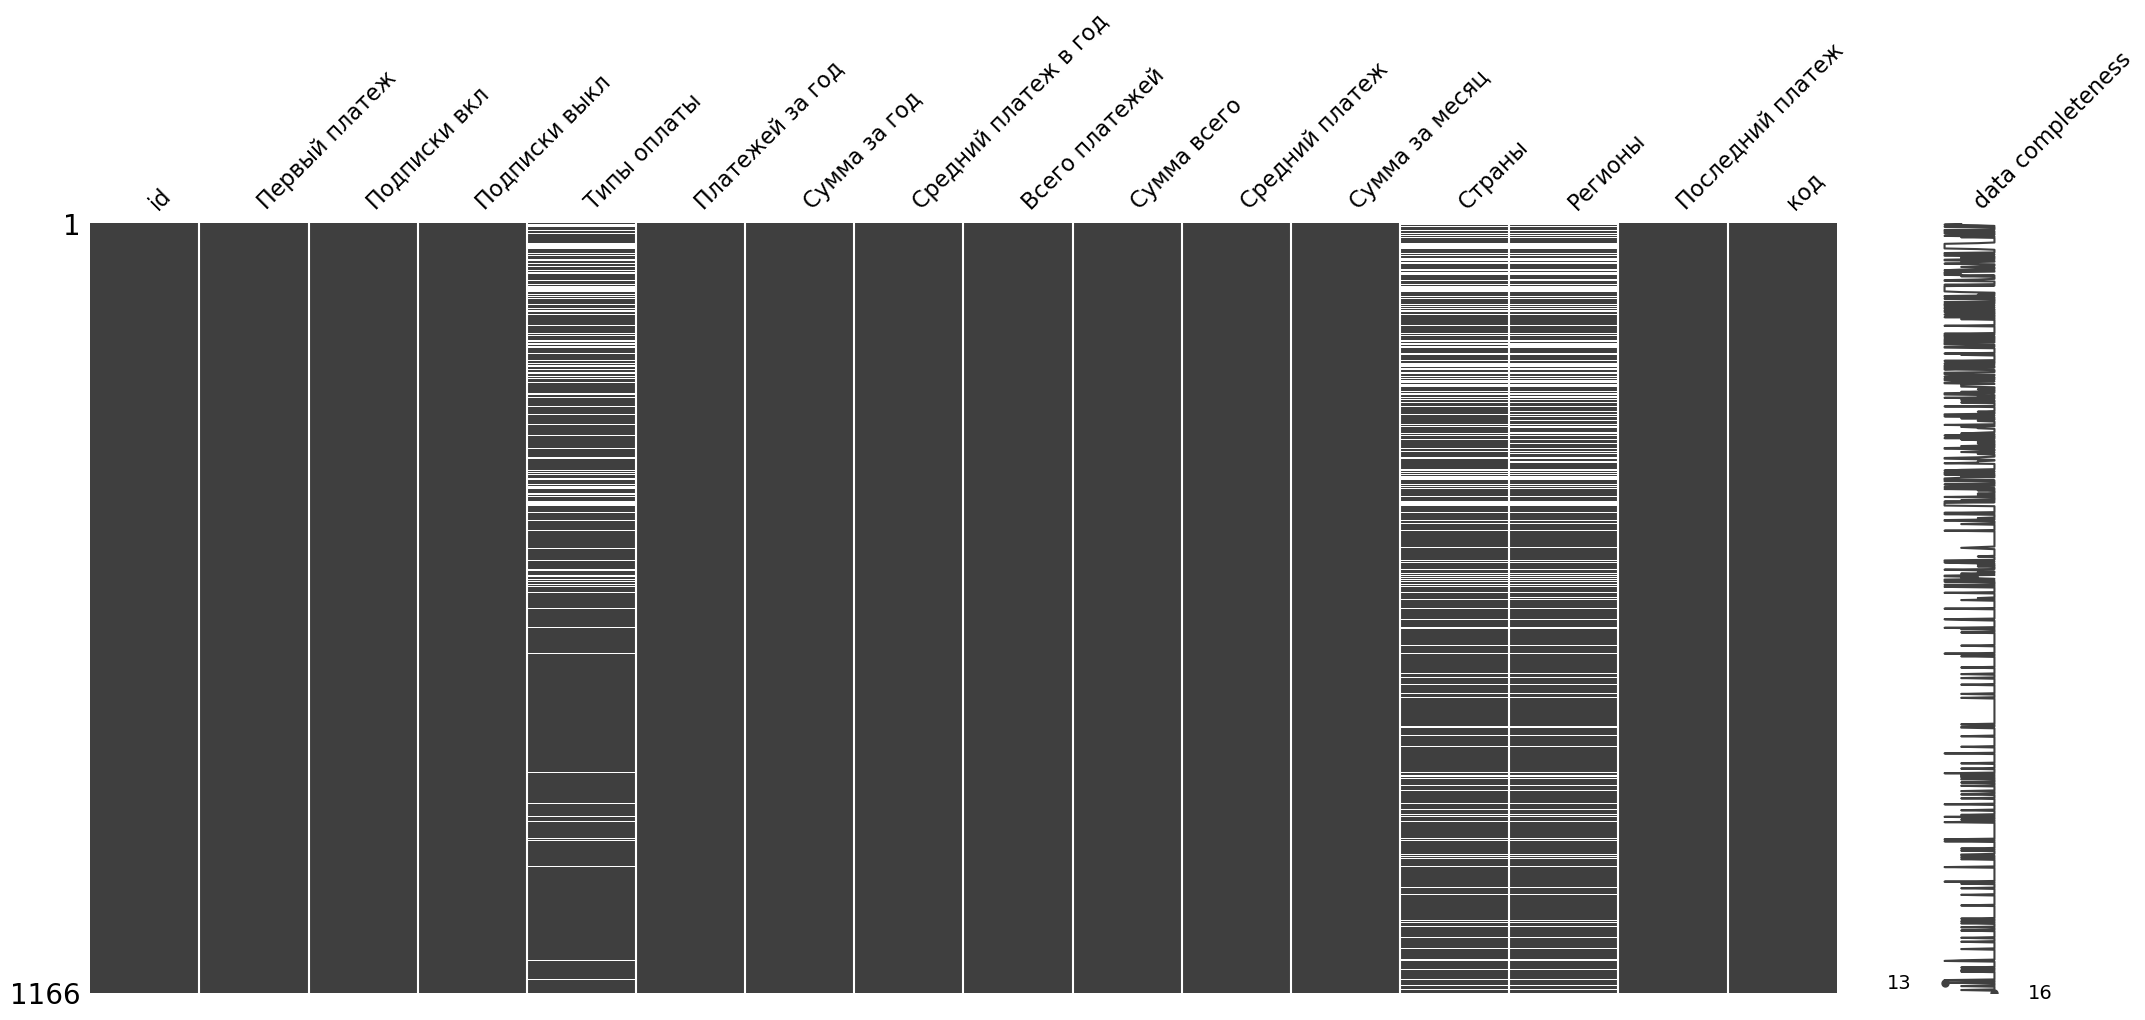

In [12]:
# визуализация распределения пропусков
msno.matrix(clients, labels=True)
None

### План работ по предобработке данных
Таблица `clients` содержит 1166 строк и 16 столбцов с данными о донорах НКО. Явных дубликатов в таблице нет. Есть пропуски в 3 столбцах:
- `Типы оплаты`: пропущено 14,41% данных. Пропуски распределены неравномерно.
- `Страны`: пропущено 20,93% данных
- `Регионы`: пропущено 23,16%
- во многих случаях наблюдается следующая закономерность: если в строке пропущены данные в столбце `Страны`, столбец `Регионы` также содержит пропуски

План работы:
- переименование столбцов для удобства дальнейшей работы (перевод на английский язык, чтобы не переключать раскладку, приведение к snake_case)
- преобразование типов данных:
  - приведение данных в столбцах `Первый платеж` и `Последний платеж` к дате
  - приведение данных в столбцах `Средний платеж в год` и `Средний платеж` к типу `float`
- изучение данных в каждом столбце, принятие решения о необходимости сохранения данных для дальнейшего анализа

## Переименование столбцов

In [13]:
columns = {'id':'id',
           'Первый платеж': 'first_payment',
           'Подписки вкл': 'subscription_on',
           'Подписки выкл': 'subscription_off',
           'Типы оплаты': 'payment_type',
           'Платежей за год': 'payments_year',
           'Сумма за год': 'total_year',
           'Средний платеж в год': 'mean_payment_year',
           'Всего платежей': 'total_payments',
           'Сумма всего': 'total_amount',
           'Средний платеж': 'mean_payment',
           'Сумма за месяц': 'total_month',
           'Страны': 'countries',
           'Регионы': 'regions',
           'Последний платеж': 'last_payment',
           'код': 'code'}

clients = clients.rename(columns=columns)
print('Столбцы переименованы')


Столбцы переименованы


## Преобразование типов данных

In [14]:
clients['first_payment'] = pd.to_datetime(clients['first_payment']).dt.date
clients['last_payment'] = pd.to_datetime(clients['last_payment']).dt.date
clients['mean_payment'] = pd.to_numeric(clients['mean_payment'], errors='coerce').astype('float').round(2)
clients['mean_payment_year'] = pd.to_numeric(clients['mean_payment_year'], errors='coerce').astype('float').round(2)
print('Типы данных преобразованы')

Типы данных преобразованы


## Столбцы `id` и `code`

In [15]:
print(f"Уникальных значений в столбце id: {clients['id'].nunique()}")
print(f"Уникальных значений в столбце code: {clients['code'].nunique()}")

Уникальных значений в столбце id: 1166
Уникальных значений в столбце code: 1166


Нам известно, что личные данные доноров зашифрованы в стобце `code`. Столбец `id` в изначальном варианте, вероятно, содержал идентификатор донора в данной выгрузке, а столбец `code` - какие-то личные данные. В обезличенном виде столбцы функционально дублируют друг друга, данные в каждом столбце уникальны (что еще раз указывает на отсутствие дубликатов в таблице). В дальнейшем при подсчете количества доноров используем столбец `code`.

## Столбцы `first_payment` и `last_payment`

Проверим корректность данных. Дата первого платежа должна быть меньше либо равна дате последнего платежа.

In [16]:
(clients['first_payment'] <= clients['last_payment']).value_counts()

True    1166
dtype: int64

Данные корректны.

Изучим временной интервал представленных в таблице данных.

In [17]:
# выделяем минимальную и максимальную даты
print(f'Минимальная дата первого платежа в таблице: {str(clients["first_payment"].min())}.')
print(f'Максимальная дата первого платежа в таблице: {str(clients["first_payment"].max())}.\n')
print(f'Минимальная дата последнего платежа в таблице: {str(clients["last_payment"].min())}.')
print(f'Максимальная дата последнего платежа в таблице: {str(clients["last_payment"].max())}.\n')

Минимальная дата первого платежа в таблице: 2021-11-17.
Максимальная дата первого платежа в таблице: 2023-06-01.

Минимальная дата последнего платежа в таблице: 2021-11-17.
Максимальная дата последнего платежа в таблице: 2023-06-02.



В таблице содержатся данные о платежах, совершенных в период с 17.11.2021 по 02.06.2023. Судя по данным с сайта Больнички, деятельность организация ведет с 2018 года, но как НКО была зарегистрирована в апреле 2021. Есть предположение, что сбор пожертвований в адрес НКО как юридического лица либо был запущен в ноябре 2021 года, либо сбор данных начался только с этого момента.

Проверим распределение и полноту данных. Для этого в отдельных столбцах выделим год и месяц первого платежа, а также год и месяц последнего платежа. После этого сгруппируем данные по годам и месяцам и посчитаем количество вновь пришедших и ушедших доноров.

In [18]:
# создаем новые столбцы
clients['first_month'] = pd.to_datetime(clients['first_payment']).dt.month
clients['first_year'] = pd.to_datetime(clients['first_payment']).dt.year
clients['last_month'] = pd.to_datetime(clients['last_payment']).dt.month
clients['last_year'] = pd.to_datetime(clients['last_payment']).dt.year
print('Столбцы созданы')

Столбцы созданы


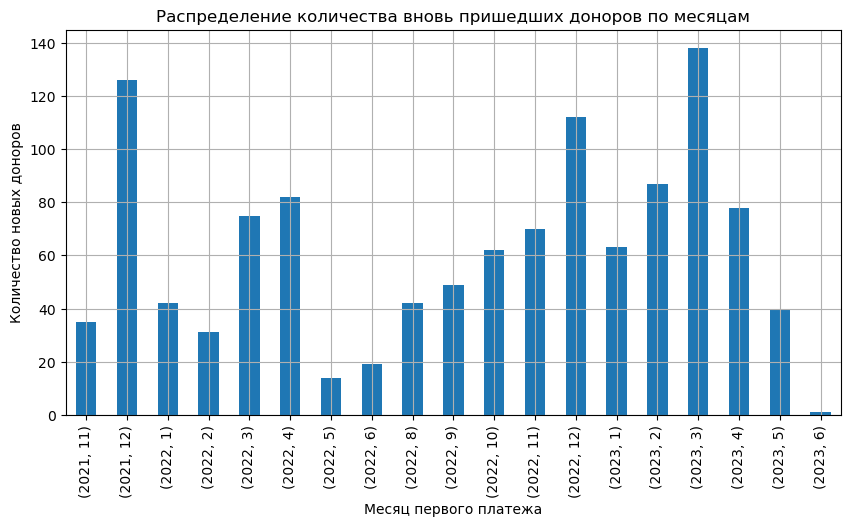

In [19]:
# считаем количество вновь пришедших доноров по месяцам
clients.groupby(by=['first_year', 'first_month']).agg({'code': 'count'}).plot.bar(grid=True, figsize=(10,5), legend=None)
plt.title('Распределение количества вновь пришедших доноров по месяцам')
plt.xlabel('Месяц первого платежа')
plt.ylabel('Количество новых доноров')
plt.show()

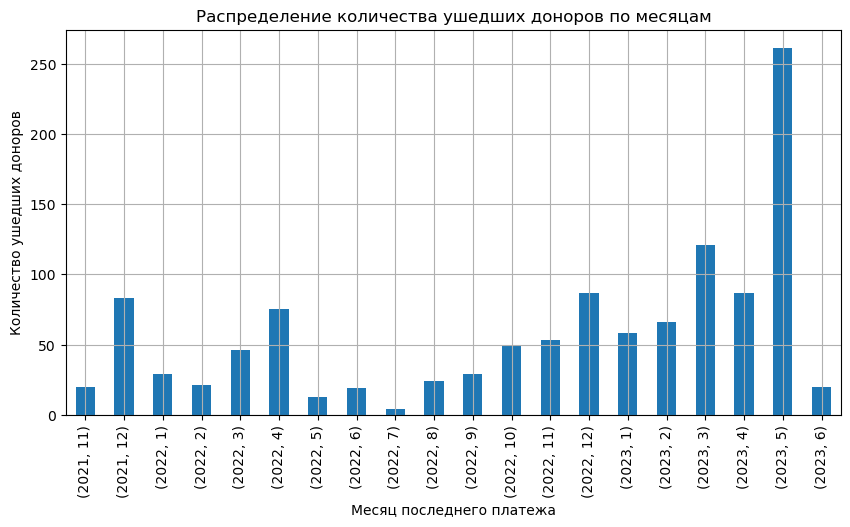

In [20]:
# считаем количество ушедших доноров по месяцам
clients.groupby(by=['last_year', 'last_month']).agg({'code': 'count'}).plot.bar(grid=True, figsize=(10,5), legend=None)
plt.title('Распределение количества ушедших доноров по месяцам')
plt.xlabel('Месяц последнего платежа')
plt.ylabel('Количество ушедших доноров')
plt.show()

В таблице представлены данные за период с 17.11.2021 по 02.06.2023. Период охватывает три календарных года:
- 2021: полтора месяца
- 2022: год целиком
- 2023: пять месяцев и самое начало шестого

Полные данные имеются только за 2022 год, поэтому сравнение по годам будет некорректным. Пересекающихся периодов у всех 3 годов нет (за 2021 год есть данные на конец года, а за 2023 - на начало), поэтому изучить одинаковые периоды в каждом году мы тоже не можем. По данной таблице будем рассматривать данные за весь период в совокупности.

Данные распределены по месяцам неравномерно. Данные в таблице `clients` за ноябрь 2011 года и июнь 2023 года неполные. Отстутствуют данные о вновь пришедших донорах за июль 2022 года.  Это может отражать как реальную картину по данному источнику, так и являться следствием ошибки заполнения или выгрузки данных. Удалять данные за эти месяцы не будем, так как они могут дополниться после объединения с таблицей `donors`.

## Столбцы `total_payments` и `total_amount`

Рассмотрим эти столбцы раньше других, так как в первую очередь в этом проекте нас интересуют данные о пожертвованиях. Поскольку НКО зарегистрировано и действует в России, предполагаем, что все суммы в таблице указаны в рублях.

В первых строчках таблицы выше мы видели, что у части доноров и общее количество платежей, и общая сумма равны нулю. Посчитаем, много ли таких данных в таблице.

In [21]:
print(f"Доноров с нулевыми количеством и суммой платежей: {len(clients.query('total_payments == 0 and total_amount == 0'))}.")
print(f"Их доля от общего количества доноров в таблице составляет {round(100*len(clients.query('total_payments == 0 and total_amount == 0')) / len(clients),2)}%.")

Доноров с нулевыми количеством и суммой платежей: 211.
Их доля от общего количества доноров в таблице составляет 18.1%.


Таких доноров слишком много, чтобы их можно было списать на случайную ошибку. Вероятные причины:
- донор начал совершать платеж, но передумал
- проблемы со стороны платежной системы (донор пытался оплатить пожертвование, но платеж не прошел)
- отказ платежной системы (у донора не оказалось достаточного количества средств на карте)
- ошибка заполнения данных
- ошибка выгрузки данных

Эту аномалию необходимо проанализировать отдельно, что мы и сделаем в разделе Исследовательский анализ после объединения таблиц.

### Распределение данных в столбце `total_payments`

Изучим распределение данных в столбце.

In [22]:
clients['total_payments'].describe()

count    1166.000000
mean        2.226415
std         3.142704
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        24.000000
Name: total_payments, dtype: float64

Медианное количество платежей равно 1, т.е. как минимум половина доноров из таблицы - разовые. Больше 3 платежей совершили только 25% доноров. Есть и рекордсмен - донор с 24 платежами.

Рассмотрим диаграму размаха.

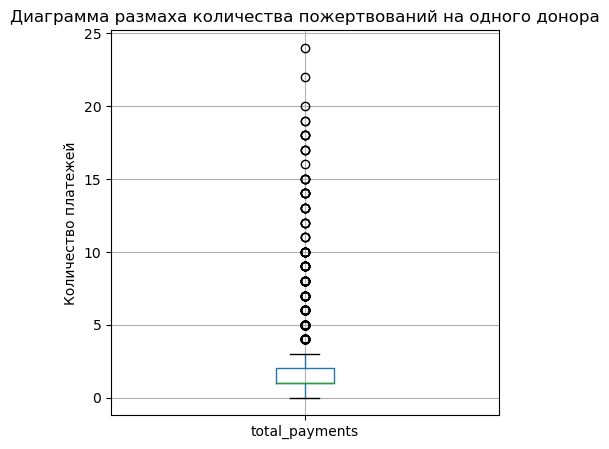

In [23]:
clients.boxplot(column=['total_payments'], figsize=(5,5))

plt.title('Диаграмма размаха количества пожертвований на одного донора')
plt.ylabel('Количество платежей')
plt.show()

Данные выше верхнего уса описывают платежи постоянных доноров. Отметки на графике накладываются друг на друга - это отражает периодичность платежей: доноры, подписавшиеся на регулярные платежи в конкретном месяце, успели сделать одинаковое количество платежей на конец периода. Отметим, что в пределах 4-10 платежей количество наслоений больше всего - вероятно, большинство повторных пользователей совершали именно такое количество платежей.

Всего предоставленные данные описывают 20 месяцев (включая неполные ноябрь 2021 и июнь 2023). В таблице есть несколько доноров, совершивших 20 платежей и более. Рассмотрим их внимательно.

In [24]:
clients[clients['total_payments'] >= 20]

id first_payment  subscription_on  subscription_off    payment_type  \
336   786419    2022-03-06                2                 0           карта   
907   668633    2021-11-25                1                 0           карта   
1040  668645    2021-11-25                1                 3  карта,терм,СБП   

      payments_year  total_year  mean_payment_year  total_payments  \
336              19        2700             142.10              22   
907              14       14000            1000.00              20   
1040             23        1112              48.34              24   

      total_amount  mean_payment  total_month                     countries  \
336           3000        136.36            0                   Россия\nСША   
907          20000       1000.00            0                   Россия\nСША   
1040          1122         46.75            0  Германия\nНидерланды\nРоссия   

                                                                        regions  \
336                                     Cuando Cubango\nМосковская обл.\nМосква   
907                                        Ла-Масана\nБамиан\nБие\nБашкортостан   
1040  Кунене\nГессен\nСеверная Голландия\nКалининградская обл.\nСанкт-Петербург   

     last_payment  code  first_month  first_year  last_month  last_year  
336    2023-05-16  1454            3        2022           5       2023  
907    2023-05-02  2025           11        2021           5       2023  
1040   2023-05-18  2158           11        2021           5       2023

Даты последнего платежа у всех трех рекордсменов выпадают на май 2023 - т.е., до конца рассматриваемого периода они, вероятно, подписку не отменяли. Средние платежи и общая сумма у двух доноров небольшая, суммы не везде круглые; возможные версии:
- доноры регулярно переводили какие-то небольшие остатки средств или округляли суммы за покупки в пользу благотворительной организации
- платежи поступали неравномерно (не строго раз в месяц) и разными суммами
- на сайте Больнички предусмотрена возможность подписки на некруглые суммы - вероятно, доноры воспользовались этой возможностью
- доноры совершали платежи в иностранной валюте, а таблица содержит сумму в рублях после конвертации

Также отметим, что двое из трех указанных доноров совершали первые платежи с ноября 2021 года, т.е. практически с самого начала рассматриваемого периода. Если это настоящие люди (а не, например, агрегированные данные о платежах до 17.11.2021 от нескольких доноров), то они молодцы :)

### Распределение данных в столбце `total_amount`

In [25]:
clients['total_amount'].describe()

count     1166.000000
mean      1712.890223
std       5021.313980
min          0.000000
25%        150.000000
50%        500.000000
75%       1387.500000
max      90000.000000
Name: total_amount, dtype: float64

По этому параметру будет логичнее рассматривать по отдельности общие суммы от разовых и постоянных доноров, так как общие суммы у этих двух категорий могут сильно отличаться. Сделаем это чуть позже, а пока разберемся с выбросами.

Рассмотрим диаграму размаха.

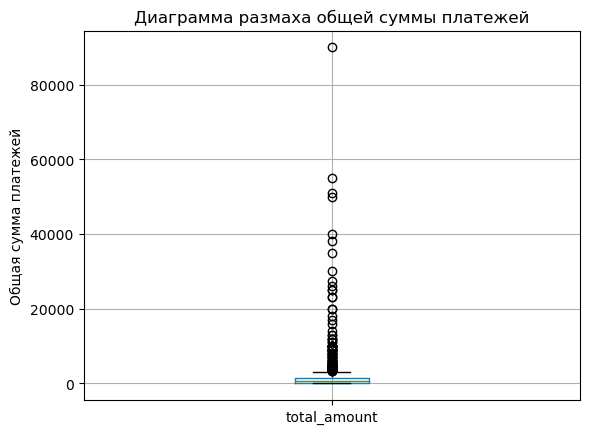

In [26]:
clients.boxplot(column=['total_amount'])

plt.title('Диаграмма размаха общей суммы платежей')
plt.ylabel('Общая сумма платежей')
plt.show()

Выбросов за верхней границей межквартильного размаха очень много - скорее всего, большинство из них - это сумма платежей от постоянных доноров.

Рассмотрим пользователя с максимальным значением.

In [27]:
clients[clients['total_amount'] == clients['total_amount'].max()]

id first_payment  subscription_on  subscription_off payment_type  \
729  943243    2022-08-22                1                 0        карта   

     payments_year  total_year  mean_payment_year  total_payments  \
729              9       90000            10000.0               9   

     total_amount  mean_payment  total_month countries             regions  \
729         90000       10000.0            0    Россия  Краснодарский край   

    last_payment  code  first_month  first_year  last_month  last_year  
729   2023-05-22  1847            8        2022           5       2023

Пользователь, впервые совершивший платеж 22.08.2022, в общей сложности сделал 9 платежей на сумму 90000 рублей (в среднем один платеж составляет 10000). Он тоже молодец.

### Итого по обоим столбцам



In [28]:
print(f"Всего доноры совершили {clients.query('total_amount > 0')['total_payments'].sum()} успешных платежей на общую сумму {clients['total_amount'].sum()} рублей.")

Всего доноры совершили 2596 успешных платежей на общую сумму 1997230 рублей.


## Столбцы `payments_year`, `total_year`, `mean_payment_year`

Оригинальные наименования столбцов (`Платежей за год`, `Сумма за год`, `Средний платеж в год`) не дают нам понимания того, какой год имеется в виду. Это может быть как год первого платежа донора (а таких годов три), так и любой из закончившихся календарных годов (2021 или 2022 - в зависимости от способа формирования исходной таблицы). Данные в этих столбцах невозможно интерпретировать однозначно, поэтому для дальнейших расчетов будем ориентироваться на следующие за ними три столбца, содержащие данные о суммарном количестве платежей и общей сумме платежей за рассматриваемый период для каждого пользователя.

## Столбцы `subscription_on` и `subscription_off`

In [29]:
# изучаем данные в столбцах
clients['subscription_on'].value_counts()

0    936
1    227
2      3
Name: subscription_on, dtype: int64

In [30]:
clients['subscription_off'].value_counts()

0    1030
1     109
2      19
3       6
4       1
5       1
Name: subscription_off, dtype: int64

В данных столбцах, исходя из их названия, предполагается проставление метки о подключении и отключении подписки. Логично было бы предположить, что отметка о подключении подписки проставляется в момент совершения первого платежа, а отметка об отключении - в момент последнего. Однако один и тот же пользователь может, например, в первый раз оплатить разовый платеж, а через месяц подписаться на регулярные. Или один и тот же пользователь может несколько раз подписываться на регулярные платежи, отключать их и возобновлять через какое-то время. Вероятно, значения 2, 3, 4 и 5 в столбцах отображают какие-то из этих сценариев.

В таблице есть столбец `total_payments` с указанием количества совершенных платежей. Воспользуемся им и создадим столбец `is_multiple`, который заполним значениями 0 и 1 по следующему правилу:
- 1, если у донора больше 1 платежа
- 0, если первое условие не выполняется

In [31]:
clients['is_multiple'] = clients.loc[:, ['total_payments']].apply(lambda x: 1 if x['total_payments'] > 1 else 0, axis=1)

## Столбец `payment_type`

Рассмотрим уникальные типы оплаты, представленные в таблице. Рассматривать будем только тех доноров, кто совершил платеж успешно (доноров с 0 платежами проанализируем позднее).

In [32]:
# считаем количество доноров, использующих тип оплаты, и их долю от общего количества
types = clients.query('total_amount > 0').groupby('payment_type').agg({'code':'nunique'}).sort_values(by='code', ascending=False)
types['percent'] = round(100*types['code'] / len(clients.query('total_amount > 0')), 2)
types

code  percent
payment_type                     
карта                670    70.16
терм,СБП             186    19.48
карта,терм,СБП        59     6.18
sms,карта             11     1.15
sms,карта,терм,СБП     3     0.31
sms,терм,СБП           2     0.21
sms                    1     0.10

В чистом виде можем выделить следующие 4 типа оплаты:
- карта
- терминал
- СБП
- sms

Пересекающиеся значения, вероятно, объясняются сменой типа оплаты у доноров, совершивших несколько платежей. В целом можем отметить, что большинство представленных в таблице доноров производили оплату с банковских карт (70,16%) и через терминал + СБП (19,48%; вероятно, это не два разных способа, а единый).

Оплата через смс не пользуется популярностью у доноров (хотя бы раз этим способом воспользовались всего 17 человек). Вероятно, стоит рассмотреть целесообразность использования этого метода приема пожертвований (особенно если он совмещен с расходами на обслуживание).

Столбец содержит пропуски (14,41% от изначальных данных). Вероятнее всего, данный столбец не потребуется для дальнейшего анализа, поэтому оставим пропуски без заполнения.

## Столбец `mean_payment`

Проведем проверку корректности заполнения столбца путем деления общей суммы платежей на количество платежей у каждого пользователя.

In [33]:
# так как в столбце данные округлены до 2 знаков после запятой, используем при проверке функцию round
(clients['mean_payment'] == round(clients['total_amount'] / clients['total_payments'],2)).value_counts()

True     942
False    224
dtype: int64

Обнаружено 224 несовпадения. Рассмотрим эти данные.

In [34]:
clients[(clients['mean_payment'] == round(clients['total_amount'] / clients['total_payments'],2)) == False].tail(20)

id first_payment  subscription_on  subscription_off  \
935   1386322    2023-04-07                0                 0   
940   1309496    2023-03-02                0                 0   
949   1381901    2023-04-05                0                 1   
956   1404631    2023-04-14                0                 0   
962   1381268    2023-04-04                0                 0   
974   1381621    2023-04-04                0                 0   
996   1386385    2023-04-07                0                 0   
997   1387517    2023-04-07                0                 0   
999   1387908    2023-04-07                0                 0   
1006  1393931    2023-04-09                0                 0   
1027   960988    2022-09-12                1                 1   
1098  1460406    2023-05-06                0                 1   
1104  1462173    2023-05-07                0                 0   
1115  1468923    2023-05-12                0                 1   
1116  1469306    2023-05-12                0                 0   
1124   668887    2021-11-26                1                 1   
1130  1478337    2023-05-18                0                 0   
1145  1484574    2023-05-23                0                 0   
1149  1491979    2023-05-26                0                 0   
1162  1499774    2023-06-01                1                 0   

        payment_type  payments_year  total_year  mean_payment_year  \
935              NaN              0           0               0.00   
940            карта              3         110              36.66   
949            карта              0           0               0.00   
956              sms              0           0               0.00   
962         терм,СБП              0           0               0.00   
974              NaN              0           0               0.00   
996              NaN              0           0               0.00   
997         терм,СБП              3        2000             666.66   
999         терм,СБП              0           0               0.00   
1006             sms              0           0               0.00   
1027           карта             11        4300             390.90   
1098           карта              0           0               0.00   
1104  карта,терм,СБП              2          25                NaN   
1115           карта              0           0               0.00   
1116             NaN              0           0               0.00   
1124           карта             14        4400             314.28   
1130        терм,СБП              0           0               0.00   
1145             NaN              0           0               0.00   
1149             NaN              0           0               0.00   
1162  карта,терм,СБП              3         110              36.66   

      total_payments  total_amount  mean_payment  total_month  \
935                0             0          0.00            0   
940                3           110         36.66            0   
949                0             0          0.00            0   
956                0             0          0.00            0   
962                0             0          0.00            0   
974                0             0          0.00            0   
996                0             0          0.00            0   
997                3          2000        666.66            0   
999                0             0          0.00            0   
1006               0             0          0.00            0   
1027              11          4300        390.90            0   
1098               0             0          0.00            0   
1104               2            25           NaN            0   
1115               0             0          0.00            0   
1116               0             0          0.00            0   
1124              19          5900        310.52            0   
1130               0             0          0.00

Доноры с несовпадениями - это "нулевики" и доноры, у которых, вероятнее всего, при преобразовании типов данных произошла ошибка округления (так как в столбце присутствовали данные разных типов, обработка могла произойти некорректно). Обновим столбец, разделив общую сумму на количество платежей.

In [35]:
clients['mean_payment'] = round(clients['total_amount'] / clients['total_payments'], 2).fillna(0)

# еще раз проверяем корректность заполнения
(clients['mean_payment'] == round(clients['total_amount'] / clients['total_payments'],2)).value_counts()

True     955
False    211
dtype: int64

In [36]:
clients[(clients['total_amount'] != 0) & ((clients['mean_payment'] == round(clients['total_amount'] / clients['total_payments'],2)) == False)]

Empty DataFrame
Columns: [id, first_payment, subscription_on, subscription_off, payment_type, payments_year, total_year, mean_payment_year, total_payments, total_amount, mean_payment, total_month, countries, regions, last_payment, code, first_month, first_year, last_month, last_year, is_multiple]
Index: []

211 доноров с ошибкой в столбце `mean_payment` при проверке - это доноры с 0 количеством платежей.

Оценим качество средних платежей, посчитав их среднее значение.

In [37]:
round(clients['mean_payment'].mean())

828

Это значение равно 828 рублям.

## Столбец `total_month`

In [38]:
# изучаем содержание столбца
clients['total_month'].value_counts()

0    1166
Name: total_month, dtype: int64

Данных в столбце `Сумма за месяц` нет. Практического смысла для всей таблицы данный столбец не имеет: так как таблица содержит агрегированные данные по донорам, а не данные по отдельным платежам, мы не можем отнести повторные платежи к какому-то конкретному месяцу. Однако мы можем проанализировать распределение суммы за месяц для разовых пользователей (так как у них всего по 1 платежу, и дата его известна).

## Столбцы `countries` и `regions`

В таблицах `donors` и `adgrants` географических данных нет, так что в дальнейшем анализе по обобщенным данным эти столбцы нам не понадобятся. Оставляем пропуски без заполнения.

Распределение доноров из таблицы clients по локациям изучим в разделе Исследовательский анализ.

## Результаты предобработки таблицы `clients`

Рассмотрим обработанную таблицу:


In [39]:
clients.head()

id first_payment  subscription_on  subscription_off payment_type  \
0   707634    2021-12-28                0                 0        карта   
1   789437    2022-03-12                0                 0        карта   
2  1078426    2022-11-23                0                 0          NaN   
3  1078667    2022-11-23                0                 0          NaN   
4   708416    2021-12-29                0                 0        карта   

   payments_year  total_year  mean_payment_year  total_payments  total_amount  \
0              0           0                0.0               0             0   
1              0           0                0.0               0             0   
2              0           0                0.0               0             0   
3              1         500              500.0               1           500   
4              1        1000             1000.0               1          1000   

   mean_payment  total_month countries             regions last_payment  code  \
0           0.0            0       NaN                 NaN   2021-12-28  1118   
1           0.0            0       NaN                 NaN   2022-03-12  1119   
2           0.0            0       NaN                 NaN   2022-11-23  1120   
3         500.0            0    Россия  Ленинградская обл.   2022-11-23  1121   
4        1000.0            0    Россия              Кунене   2021-12-29  1122   

   first_month  first_year  last_month  last_year  is_multiple  
0           12        2021          12       2021            0  
1            3        2022           3       2022            0  
2           11        2022          11       2022            0  
3           11        2022          11       2022            0  
4           12        2021          12       2021            0

In [40]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1166 non-null   int64  
 1   first_payment      1166 non-null   object 
 2   subscription_on    1166 non-null   int64  
 3   subscription_off   1166 non-null   int64  
 4   payment_type       998 non-null    object 
 5   payments_year      1166 non-null   int64  
 6   total_year         1166 non-null   int64  
 7   mean_payment_year  1165 non-null   float64
 8   total_payments     1166 non-null   int64  
 9   total_amount       1166 non-null   int64  
 10  mean_payment       1166 non-null   float64
 11  total_month        1166 non-null   int64  
 12  countries          922 non-null    object 
 13  regions            896 non-null    object 
 14  last_payment       1166 non-null   object 
 15  code               1166 non-null   int64  
 16  first_month        1166 

Выполнено следующее:

- Переименованы столбцы
- Преобразованы типы данных в столбцах:
  - `first_payment`
  - `last_payment`
  - `mean_payment`
  - `mean_payment_year`
- Добавлен столбец `is_multiple` с меткой 1 для доноров, сделавших больше 1 платежа, и меткой 0 для остальных доноров
- Пропуски в столбцах `payment_type`, `countries`, `regions` не заполнялись, так как эти столбцы не планируется использовать в дальнейшем обобщенном анализе по обеим выгрузкам

# Таблица clients. Исследовательский анализ

В данном разделе мы проведем исследовательский анализ таблицы `clients` по столбцам `countries` и `regions`, а также постараемся выяснить причины появления большого количества пользователей с нулевыми платежами.

## Изучение географии доноров по столбцам `countries` и `regions`

In [41]:
# изучим содержание столбцов
clients.query('total_payments != 0')['countries'].unique()

array(['Россия', 'Нидерланды\nРоссия\nСША', 'Россия\nСША', 'Нидерланды',
       'Чехия', 'Белоруссия', 'США', 'Латвия', 'Грузия', nan, 'Швеция',
       'Сингапур', 'Латвия\nРоссия', 'Германия', 'США\nФинляндия',
       'Россия\nСербия\nСША', 'Финляндия', 'Венгрия',
       'Нидерланды\nРоссия', 'Франция', 'Армения', 'Канада', 'ОАЭ',
       'Литва', 'Германия\nРоссия', 'Россия\nЭстония', 'Турция',
       'Швейцария', 'Вьетнам', 'Греция\nРоссия\nСША', 'Испания',
       'Казахстан', 'Румыния', 'Великобритания',
       'Нидерланды\nРоссия\nФинляндия', 'Киргизия', 'Сербия', 'Польша',
       'Монголия', 'Россия\nВеликобритания', 'Дания\nРоссия\nСША',
       'США\nТурция', 'США\nЭстония', 'Болгария\nКазахстан', 'Эстония',
       'Кипр', 'Шри-Ланка', 'Италия', 'Австрия', 'Аргентина', 'Бельгия',
       'Япония', 'Израиль', 'Португалия', 'ндия Индия', 'Россия\nТаиланд',
       'Германия\nСША', 'Россия\nШвейцария', 'ОАЭ\nЭстония', 'Таиланд',
       'Белоруссия\nРоссия', 'Германия\nНидерланды\nРосс

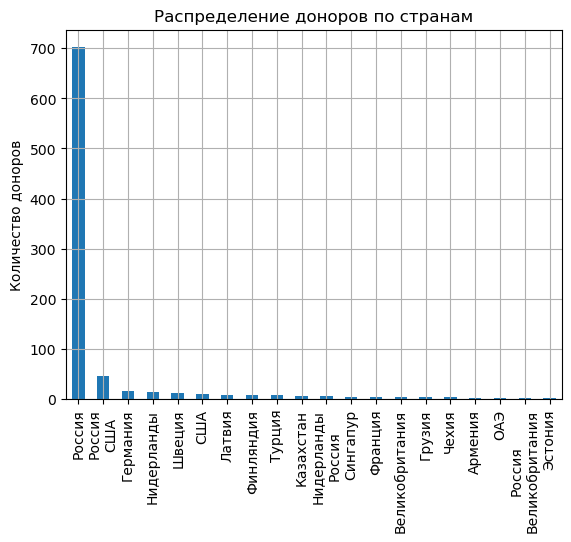

In [42]:
clients.query('total_payments != 0')['countries'].value_counts().head(20).plot.bar(grid=True)

plt.title('Распределение доноров по странам')
plt.ylabel('Количество доноров')
plt.show()

In [43]:
clients.query('total_payments != 0')['regions'].unique()

array(['Ленинградская обл.', 'Кунене', 'Бамиан', 'Москва',
       'Cuando Cubango', 'Санкт-Петербург', 'Бие',
       'Арагацотнская область', 'Святой Георгий', 'Красноярский край',
       'Северная Голландия', nan, 'Кандагар\nПриморский край',
       'Свердловская обл.', 'Минская область', 'Армавир', 'Корча',
       'Смоленская обл.', 'Рига', 'Нижняя Карталиния', 'Тбилиси',
       'Джаузджан', 'Кабул', 'Лен Стокгольм', 'Влёра',
       'Архангельская обл.', 'Кунене\nСанкт-Петербург', 'Айбак',
       'Кабинда\nРига', 'Кунене\nЛенинградская обл.', 'Дибра',
       'Cuando Cubango\nМосква', 'Кукес', 'Хост', 'Ла-Масана', 'Лори',
       'Кунене\nПсковская обл.', 'Пактия', 'Сент-Джон',
       'Кунене\nТверская обл.', 'Арарат', 'Бенго', 'Уусимаа', 'Тирана',
       'Татарстан', 'Кунене\nХакасия', 'Барбуда\nКурская обл.',
       'Сюникская область', 'Ереван', 'Святой Марии\nОмская обл.',
       'Cuando Cubango\nМосковская обл.\nМосква', 'Кунене\nМосква',
       'Урузган', 'Парван', 'Сюникская обл

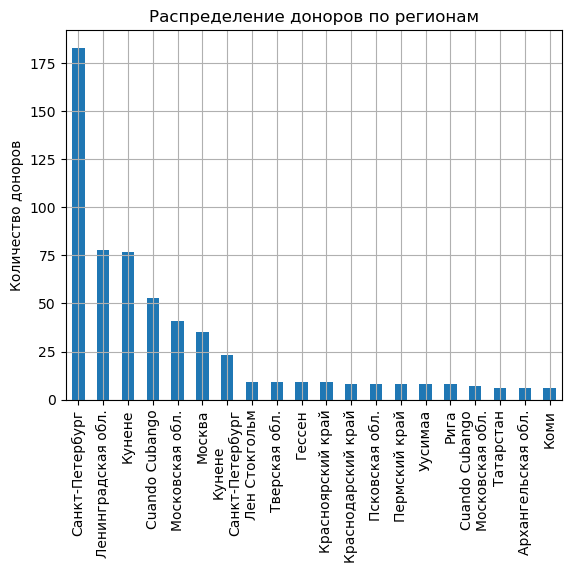

In [44]:
clients.query('total_payments != 0')['regions'].value_counts().head(20).plot.bar(grid=True)

plt.title('Распределение доноров по регионам')
plt.ylabel('Количество доноров')
plt.show()

Обращают на себя внимание два момента:
- как и в случае с типами оплаты, есть пользователи с множественными локациями (как по странам, так и по регионам)
- Россия (а внутри ее Санкт-Петербург и Ленинградская область) лидируют по количеству доноров

Чтобы более точно посчитать доноров из России, Санкт-Петербурга и Ленинградской области, составим функцию, которая выделит указанные локации из ячеек с множественными локациями.

In [45]:
def geo_count(countries, regions):
    ru = 0
    spb = 0
    for i in countries:
        if 'Россия' in str(i):
            ru +=1
    for j in regions:
        if 'Санкт-Петербург' in str(j) or 'Лениградская' in str(j):
            spb += 1
    return (ru, spb)

res = geo_count(clients.query('total_payments != 0')['countries'], clients.query('total_payments != 0')['regions'])

print('Доноров из России: ', res[0])
print(f"Их доля от общего количества доноров: {round(100*res[0] / len(clients.query('total_payments != 0')), 2)}%")
print()
print('Доноров из Санкт-Петербурга и Ленинградской области: ', res[1])
print(f"Их доля от доноров из России: {round(100*res[1] / res[0], 2)}%")
print(f"Их доля от общего количества доноров: {round(100*res[1] / len(clients.query('total_payments != 0')), 2)}%")

Доноров из России:  771
Их доля от общего количества доноров: 80.73%

Доноров из Санкт-Петербурга и Ленинградской области:  238
Их доля от доноров из России: 30.87%
Их доля от общего количества доноров: 24.92%


Изучение динамики географии доноров - само по себе очень интересное исследование (особенно учитывая общественно-политические события последних двух лет) и могло бы быть проведено качественно, если бы у нас были данные по каждому платежу. По имеющимся же данным можем отметить следующие моменты:
- подавляющее большинство доноров - из России
- из них значительная часть - из Санкт-Петербурга и Ленинградской области (не удивительно, учитывая локацию НКО)
- география достаточно обширна, у доноров с повторными платежами часто меняется (наиболее вероятные причины: релокация, переезды внутри страны, использование VPN)

Также нельзя не отметить большое количество пользователей из ангольских провинций Кунене и Квандо-Кубанго. Вероятно, там расположены очень хорошие VPN-серверы.

## Изучение доноров с нулевыми платежами

Ранее мы большое количество доноров с нулевыми платежами. Посмотрим на них повнимательнее.

Изучим те параметры, которые нам известны, и попробуем выделить причины появления нулевых доноров в таких количествах. Создадим временный столбец с признаком "нулевости": 1, если сумма платежей у донора равна 0, и 0, если нет.

In [46]:
clients['zero'] = clients.loc[:, ['total_amount']].apply(lambda row: 1 if row['total_amount'] == 0 else 0, axis=1)

In [47]:
(clients.query('zero == 1')['first_payment'] == clients.query('zero == 1')['last_payment']).value_counts()

True     189
False     22
dtype: int64

Из 211 нулевых доноров только 22 человека пытались совершить платеж более одного раза.

Выделим дни, в которые было совершено больше всего попыток нулевых платежей. Считаем будем долю нулевых доноров от всех доноров, выпервые совершивших платеж в этот день.

In [48]:
# группируем по датам, считаем количество нулевых платежей и общее количество доноров, впервые совершивших платеж в этот день
zero_days = clients.groupby('first_payment').agg({'zero': 'sum', 'code': 'nunique'}).reset_index().query('zero != 0').sort_values(by='zero', ascending=False)

# считаем долю нулевых платежей от всех впервые совершенных платежей в этот день
zero_days['percent'] = round(100*zero_days['zero']/ zero_days['code'] ,2)

# выводим дни с 100% нулевыми платежами, сортируем по датам
print('Дней, в которые было совершено 100% нулевых платежей: ', len(zero_days.query('percent == 100').sort_values(by='first_payment')))
zero_days.query('percent == 100').sort_values(by='first_payment')

Дней, в которые было совершено 100% нулевых платежей:  33


first_payment  zero  code  percent
10     2021-12-04     1     1    100.0
26     2021-12-28     1     1    100.0
30     2022-01-07     1     1    100.0
44     2022-01-26     1     1    100.0
49     2022-02-03     1     1    100.0
53     2022-02-12     1     1    100.0
55     2022-02-17     1     1    100.0
60     2022-02-24     1     1    100.0
67     2022-03-09     2     2    100.0
70     2022-03-13     1     1    100.0
72     2022-03-16     1     1    100.0
77     2022-03-21     2     2    100.0
79     2022-03-23     2     2    100.0
80     2022-03-24     2     2    100.0
87     2022-04-01     3     3    100.0
94     2022-04-12     2     2    100.0
98     2022-04-18     1     1    100.0
112    2022-05-12     1     1    100.0
125    2022-08-03     3     3    100.0
126    2022-08-06     1     1    100.0
129    2022-08-09     2     2    100.0
131    2022-08-15     1     1    100.0
190    2022-11-06     1     1    100.0
197    2022-11-16     1     1    100.0
198    2022-11-17     1     1    100.0
203    2022-11-24     1     1    100.0
205    2022-11-26     1     1    100.0
206    2022-11-28     2     2    100.0
224    2022-12-22     1     1    100.0
259    2023-02-09     1     1    100.0
266    2023-02-17     1     1    100.0
348    2023-05-23     1     1    100.0
349    2023-05-26     1     1    100.0

Таких дней достаточно много (33), но и количество доноров, которые пытались в такие дни совершить платеж, невысоко.

Посмотрим на соотношение в те дни, когда было совершено больше всего первых платежей.

In [49]:
zero_days.sort_values(by='code', ascending=False).head(10)

first_payment  zero  code  percent
21     2021-12-23    15    65    23.08
230    2022-12-30     2    28     7.14
274    2023-02-26     4    26    15.38
302    2023-03-28     2    25     8.00
303    2023-03-29     3    23    13.04
229    2022-12-29     2    21     9.52
64     2022-03-06     3    15    20.00
308    2023-04-04     2    14    14.29
22     2021-12-24     4    14    28.57
188    2022-11-04     2    13    15.38

В 10 дней с максимальным количеством вновь пришедших доноров доля нулевых платежей варьируется от 8 до 28,6%. Данные о количестве платежей за каждый день (первых + повторных) позволили бы точнее рассчитать соотношение между успешными и нулевыми платежами и попытаться определить, имела ли место техническая ошибка в тот или иной день.

Посмотрим, какими способами платежа пытались воспользоваться нулевые доноры.

In [50]:
zero_types = clients.query('zero == 1').groupby('payment_type').agg({'code': 'nunique'})
zero_types.sort_values(by='code', ascending=False)

code
payment_type      
карта           44
терм,СБП        12
sms             10

Посчитаем, сколько всего доноров оплачивали теми же способами и посчитаем долю нулевых платежей в платежах каждого типа.

In [51]:
# добавляем в таблицу zero_types данные об общем количестве доноров, использующих тип оплаты,
# их долю от общего количества по типу платежа и долю от общего количества
zero_types['total'] = clients.query('payment_type in @zero_types.index').groupby('payment_type').agg({'code':'nunique'}).sort_values(by='code', ascending=False)['code']
zero_types['rate2type'] = round(100*zero_types['code'] / zero_types['total'], 2)
zero_types['rate2total'] = round(100*zero_types['total'] / len(clients), 2)

# выводим таблицу
zero_types

code  total  rate2type  rate2total
payment_type                                    
sms             10     11      90.91        0.94
карта           44    714       6.16       61.23
терм,СБП        12    198       6.06       16.98

Больше 90% попыток платежей через sms среди доноров, которые использовали только этот метод платежа - неудачные. Однако таким методом воспользовались менее 1% от всех доноров в таблице. Метод непопулярный и неэффективый, но, похоже, не он основная причина наличия нулевых доноров.

Вероятно, дело в географии - например, платеж не проходит из-за границы. Попробуем изучить столбцы со странами и регионами у нулевых доноров.

In [52]:
print(clients.query('zero == 1')['countries'].value_counts())
print(clients.query('zero == 1')['regions'].value_counts())

Series([], Name: countries, dtype: int64)
Series([], Name: regions, dtype: int64)


Данных о местоположении у таких пользователей нет. Вероятно, они вносятся в таблицу только после успешного совершения платежа.

## Обобщенные выводы по результатам анализа таблицы `clients`

### Наблюдения и выявленные закономерности:
- таблица содержит данные о 1166 уникальных донорах, совершавших платежи в период с 17.11.2021 по 02.06.2023
- 211 доноров (18,1%) совершили платежи на сумму 0 рублей
- количество дней, в которые наблюдалось 100% нулевых платежей - 33. Максимальное количество впервые совершаемых платежей в такие дни - 3
- в дни с наибольшим притоком впервые оплативших пожертвование доноров доля нулевых платежей составляет от 8 до 28,6%
- оплата через sms - самый непопулярный вид оплаты
  - среди ненулевых доноров этим методом хотя бы раз воспользовались всего 17 человек (практически все в комбинации с другими методами)
  - доля нулевых патежей составляет 90,9% от всех доноров, воспользовавшихся этим методом в чистом виде
- большая часть доноров (81%) - из России. Из них 31% - из Санкт-Петербурга и Ленинградской области

### Выявленные проблемы:
- в таблице `clients` собраны сводные данные по донорам, а не по отдельным платежам, поэтому:
  - часть столбцов не имеет смысла (например, `Сумма за год`, `Средний платеж в год`, `Платежей за год`, `Сумма за месяц`)
  - данные в столбцах `Страны`, `Регионы`, `Типы оплаты` в случае повторных платежей добавляются через запятую или с новой строки, делая эти столбцы неудобными для восприятия и анализа
- неясен принцип заполнения столбцов `Подписки вкл`и `Подписки выкл`, что осложняет анализ действий разовых и постоянных доноров
- в таблице отсутствуют данные о новых донорах за июль 2022 года
- разные типы данных в столбце `Средний платеж` - заполнение происходит неоптимальным способом
- в таблицу попадает достаточно много клиентов, которые не смогли осуществить платеж (сумма платежа или платежей равна 0)




# Таблица donors. Изучение и предобработка данных

## Общее ознакомление с таблицей donors

In [53]:
 # загрузка первых строк таблицы
donors.head()

ID  Тип донора Дата первого пожертвования  Сумма первого пожертвования  \
0  833     разовый          21.06.2023, 18:43                       3000.0   
1  832  постоянный          20.06.2023, 16:36                        500.0   
2  831  постоянный          20.06.2023, 10:39                        500.0   
3  830     разовый          20.06.2023, 09:09                       1000.0   
4  829  постоянный          19.06.2023, 23:03                        100.0   

                      Кампания первого пожертвования  Метки донора  \
0  На уставную деятельность и содержание организации           NaN   
1  На уставную деятельность и содержание организации           NaN   
2  На уставную деятельность и содержание организации           NaN   
3  На уставную деятельность и содержание организации           NaN   
4  На уставную деятельность и содержание организации           NaN   

                                            Кампании Платёжные операторы  \
0  На уставную деятельность и содержание организации             MIXPLAT   
1  На уставную деятельность и содержание организации             MIXPLAT   
2  На уставную деятельность и содержание организации             MIXPLAT   
3  На уставную деятельность и содержание организации             MIXPLAT   
4  На уставную деятельность и содержание организации             MIXPLAT   

  Дата последнего пожертвования  Сумма последнего пожертвования  \
0             21.06.2023, 18:43                          3000.0   
1             20.06.2023, 16:40                           500.0   
2             20.06.2023, 10:39                           500.0   
3             20.06.2023, 09:09                          1000.0   
4             19.06.2023, 23:03                           100.0   

                   Кампания последнего пожертвования  \
0  На уставную деятельность и содержание организации   
1  На уставную деятельность и содержание организации   
2  На уставную деятельность и содержание организации   
3  На уставную деятельность и содержание организации   
4  На уставную деятельность и содержание организации   

   Общая сумма пожертвований Валюта   Код  
0                       3000      ₽  2285  
1                        500      ₽  2286  
2                        500      ₽  1479  
3                       1000      ₽  2288  
4                        100      ₽  2289

In [54]:
# загрузка информации о таблице
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 813 non-null    int64  
 1   Тип донора                         813 non-null    object 
 2   Дата первого пожертвования         795 non-null    object 
 3   Сумма первого пожертвования        795 non-null    float64
 4   Кампания первого пожертвования     795 non-null    object 
 5   Метки донора                       0 non-null      float64
 6   Кампании                           795 non-null    object 
 7   Платёжные операторы                795 non-null    object 
 8   Дата последнего пожертвования      795 non-null    object 
 9   Сумма последнего пожертвования     795 non-null    float64
 10  Кампания последнего пожертвования  795 non-null    object 
 11  Общая сумма пожертвований          813 non-null    int64  

In [55]:
# считаем явные дубликаты
print(f"В таблице donors найдено {donors.duplicated().sum()} дубликатов.")

В таблице donors найдено 0 дубликатов.


In [56]:
# считаем количество пропусков в столбцах
donors.isna().sum()

ID                                     0
Тип донора                             0
Дата первого пожертвования            18
Сумма первого пожертвования           18
Кампания первого пожертвования        18
Метки донора                         813
Кампании                              18
Платёжные операторы                   18
Дата последнего пожертвования         18
Сумма последнего пожертвования        18
Кампания последнего пожертвования     18
Общая сумма пожертвований              0
Валюта                                 0
Код                                    0
dtype: int64

In [57]:
# считаем долю пропусков в столбцах от общего количества в процентах
((donors.isna().sum() / len(donors)) * 100).round(2)

ID                                     0.00
Тип донора                             0.00
Дата первого пожертвования             2.21
Сумма первого пожертвования            2.21
Кампания первого пожертвования         2.21
Метки донора                         100.00
Кампании                               2.21
Платёжные операторы                    2.21
Дата последнего пожертвования          2.21
Сумма последнего пожертвования         2.21
Кампания последнего пожертвования      2.21
Общая сумма пожертвований              0.00
Валюта                                 0.00
Код                                    0.00
dtype: float64

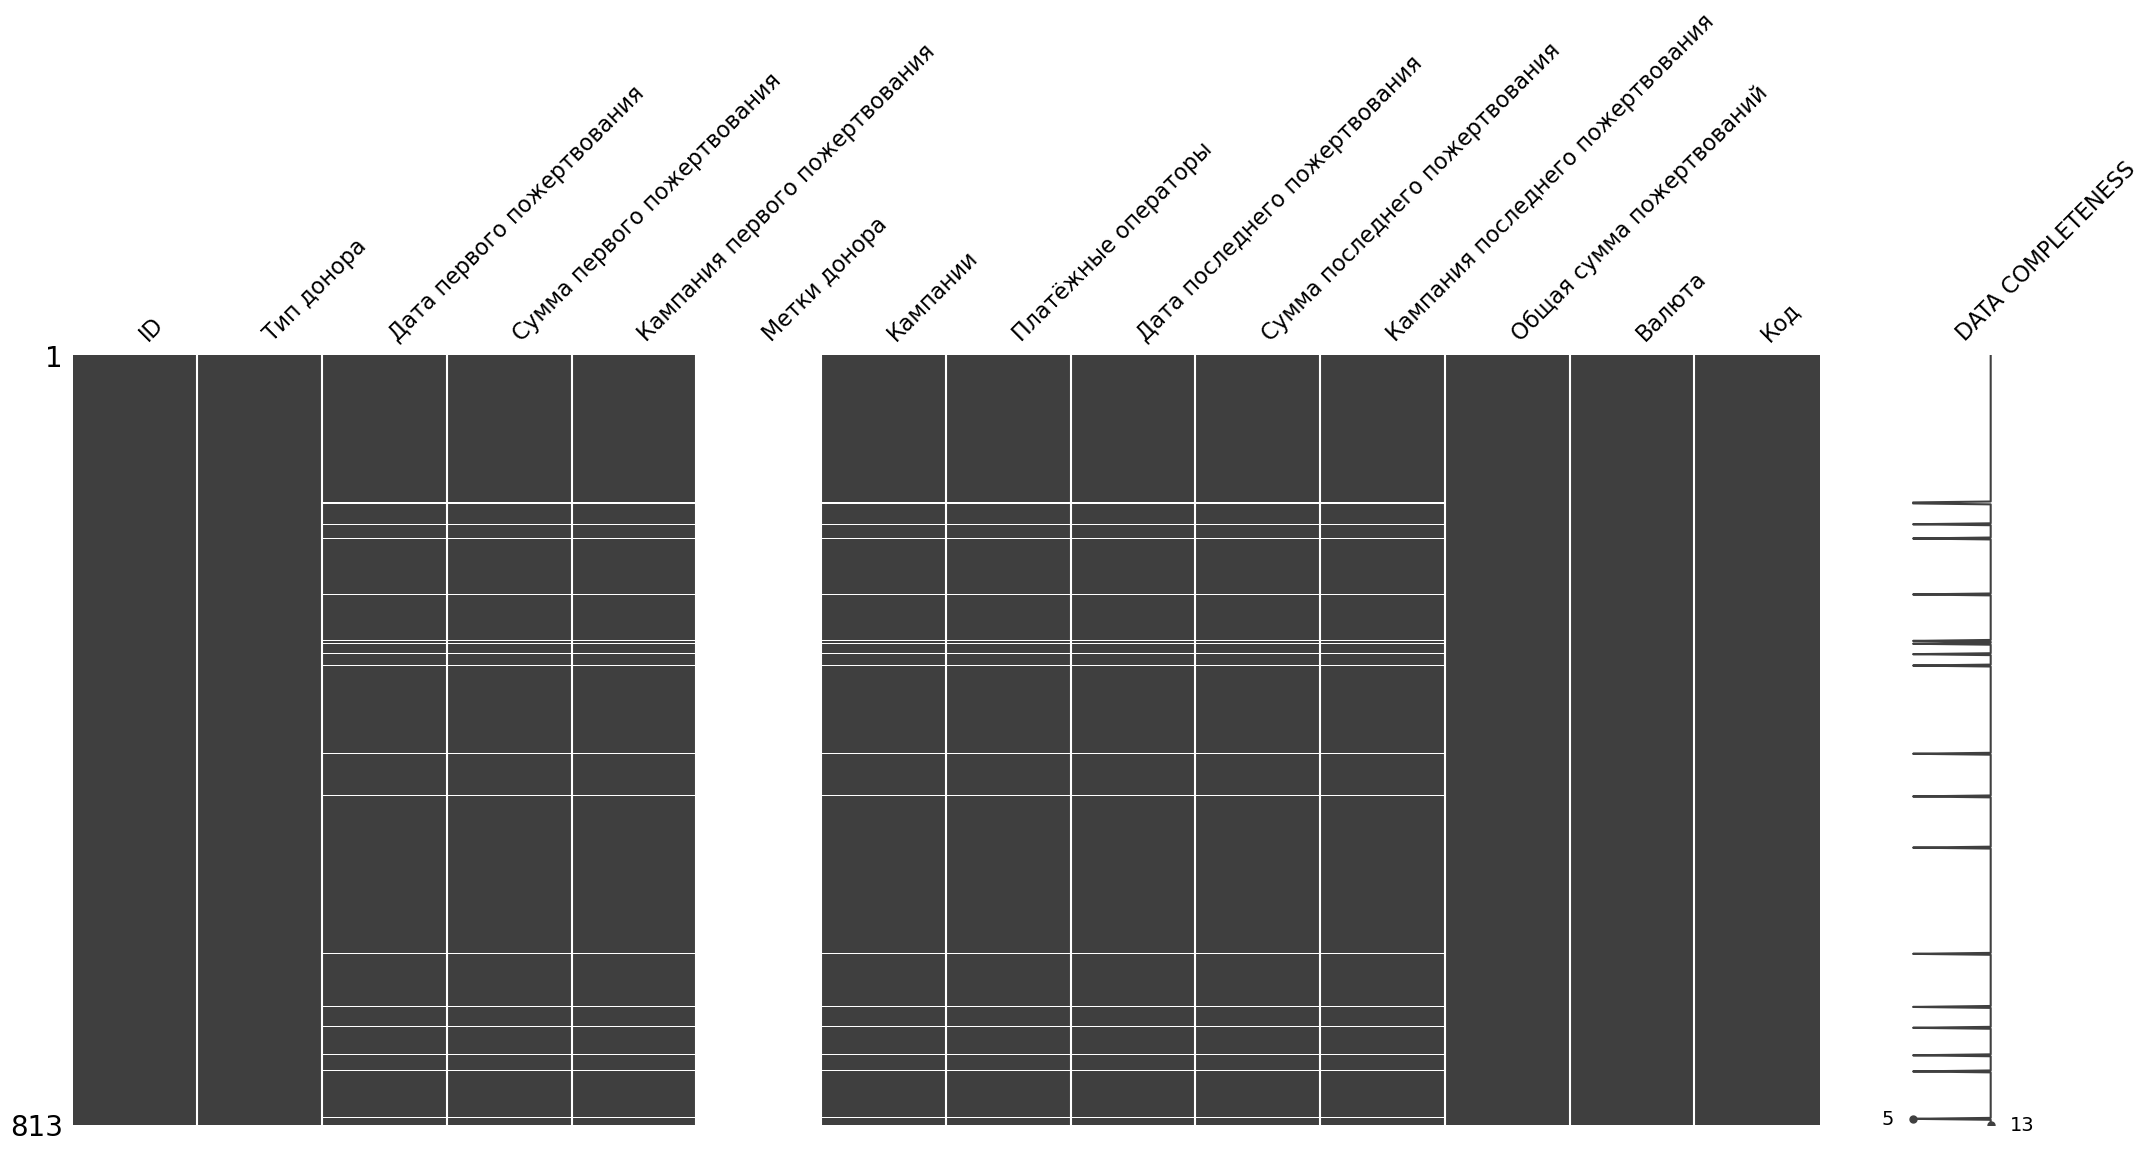

In [58]:
# визуализация распределения пропусков
msno.matrix(donors, labels=True)
None

### План работ по предобработке данных
Таблица `donors` содержит 813 строк и 14 столбцов с данными о донорах НКО. Явных дубликатов в таблице нет. Есть пропуски в ряде столбцов:
- `Метки донора`: пропущено 100% данных
- пропущено по 2,21% данных в столбцах (судя по матрице распределения пропусков, это одни и те же строки):
  - `Дата первого пожертвования`
  - `Сумма первого пожертвования`
  - `Кампания первого пожертвования`
  - `Кампании`
  - `Платёжные операторы`
  - `Дата последнего пожертвования`
  - `Сумма последнего пожертвования`
  - `Кампания последнего пожертвования `

План работы:
- переименование столбцов для удобства дальнейшей работы (перевод на английский язык, чтобы не переключать раскладку, приведение к snake_case)
- преобразование типов данных:
  - приведение данных в столбцах `Дата первого пожертвования` и `Дата последнего пожертвования` к дате (на данный момент тип данных смешанный)
- изучение данных в каждом столбце, принятие решения о необходимости сохранения данных для дальнейшего анализа

## Переименование столбцов

In [59]:
columns = {'ID':'id',
           'Тип донора': 'is_multiple',
           'Дата первого пожертвования': 'first_payment',
           'Сумма первого пожертвования': 'first_amount',
           'Кампания первого пожертвования': 'first_campaign',
           'Метки донора': 'labels',
           'Кампании': 'campaigns',
           'Платёжные операторы': 'payment_provider',
           'Дата последнего пожертвования': 'last_payment',
           'Сумма последнего пожертвования': 'last_amount',
           'Кампания последнего пожертвования': 'last_campaign',
           'Общая сумма пожертвований': 'total_amount',
           'Валюта': 'currency',
           'Код': 'code'}

donors = donors.rename(columns=columns)
print('Столбцы переименованы')

Столбцы переименованы


## Преобразование типов данных

In [60]:
# преобразуем типы данных
donors['first_payment'] = pd.to_datetime(donors['first_payment'], dayfirst=True).dt.date
donors['last_payment'] = pd.to_datetime(donors['last_payment'], dayfirst=True).dt.date
print('Типы данных преобразованы')

Типы данных преобразованы


## Столбцы `id` и `code`

In [61]:
print(f"Уникальных значений в столбце id: {donors['id'].nunique()}")
print(f"Уникальных значений в столбце code: {donors['code'].nunique()}")

Уникальных значений в столбце id: 813
Уникальных значений в столбце code: 813


Данные в столбцах уникальны. Как и в случае с таблицей `clients` в дальнейшем при подсчете количества доноров используем столбец `code`.

## Столбцы `first_payment` и `last_payment`

Проверим корректность данных. Дата первого платежа должна быть меньше либо равна дате последнего платежа.

In [62]:
(donors['first_payment'] <= donors['last_payment']).value_counts()

True     795
False     18
dtype: int64

Обнаружены несоответствия. Рассмотрим эти строки.

In [63]:
donors[(donors['first_payment'] <= donors['last_payment']) == False]

id is_multiple first_payment  first_amount first_campaign  labels  \
155  677     разовый           NaT           NaN            NaN     NaN   
156  676     разовый           NaT           NaN            NaN     NaN   
178  654     разовый           NaT           NaN            NaN     NaN   
193  639     разовый           NaT           NaN            NaN     NaN   
252  580     разовый           NaT           NaN            NaN     NaN   
301  531     разовый           NaT           NaN            NaN     NaN   
304  528     разовый           NaT           NaN            NaN     NaN   
315  517     разовый           NaT           NaN            NaN     NaN   
327  505     разовый           NaT           NaN            NaN     NaN   
420  407     разовый           NaT           NaN            NaN     NaN   
465  361     разовый           NaT           NaN            NaN     NaN   
519  305     разовый           NaT           NaN            NaN     NaN   
631  193     разовый           NaT           NaN            NaN     NaN   
687  137     разовый           NaT           NaN            NaN     NaN   
709  115     разовый           NaT           NaN            NaN     NaN   
738   86     разовый           NaT           NaN            NaN     NaN   
755   69     разовый           NaT           NaN            NaN     NaN   
805   19     разовый           NaT           NaN            NaN     NaN   

    campaigns payment_provider last_payment  last_amount last_campaign  \
155       NaN              NaN          NaT          NaN           NaN   
156       NaN              NaN          NaT          NaN           NaN   
178       NaN              NaN          NaT          NaN           NaN   
193       NaN              NaN          NaT          NaN           NaN   
252       NaN              NaN          NaT          NaN           NaN   
301       NaN              NaN          NaT          NaN           NaN   
304       NaN              NaN          NaT          NaN           NaN   
315       NaN              NaN          NaT          NaN           NaN   
327       NaN              NaN          NaT          NaN           NaN   
420       NaN              NaN          NaT          NaN           NaN   
465       NaN              NaN          NaT          NaN           NaN   
519       NaN              NaN          NaT          NaN           NaN   
631       NaN              NaN          NaT          NaN           NaN   
687       NaN              NaN          NaT          NaN           NaN   
709       NaN              NaN          NaT          NaN           NaN   
738       NaN              NaN          NaT          NaN           NaN   
755       NaN              NaN          NaT          NaN           NaN   
805       NaN              NaN          NaT          NaN           NaN   

     total_amount currency  code  
155             0        ₽  2440  
156             0        ₽  1928  
178             0        ₽  2463  
193             0        ₽  1857  
252             0        ₽  2049  
301             0        ₽  2586  
304             0        ₽  2589  
315             0        ₽  1980  
327             0        ₽  2612  
420             0        ₽  2705  
465             0        ₽  2750  
519             0        ₽  2804  
631             0        ₽  2916  
687             0        ₽  2972  
709             0        ₽  2143  
738             0        ₽  3023  
755             0        ₽  3040  
805             0        ₽  2160

Судя по всему, это те самые 18 строк (2,21% данных), которые содержат пропуски в большинстве столбцов. Сразу удалим их, чтобы пустые значения не мешали проводить расчеты в дальнейшем.

In [64]:
donors = donors[(donors['first_payment'] <= donors['last_payment']) != False]
print(f"Осталось строк: {len(donors)}")

Осталось строк: 795


Считаем количество пропусков после удаления строк.

In [65]:
donors.isna().sum()

id                    0
is_multiple           0
first_payment         0
first_amount          0
first_campaign        0
labels              795
campaigns             0
payment_provider      0
last_payment          0
last_amount           0
last_campaign         0
total_amount          0
currency              0
code                  0
dtype: int64

Пропуски остались только в столбце `labels`.

Изучим временной интервал представленных в таблице данных.

In [66]:
print(f'Минимальная дата первого платежа в таблице: {str(donors["first_payment"].min())}.')
print(f'Максимальная дата первого платежа в таблице: {str(donors["first_payment"].max())}.\n')
print(f'Минимальная дата последнего платежа в таблице: {str(donors["last_payment"].min())}.')
print(f'Максимальная дата последнего платежа в таблице: {str(donors["last_payment"].max())}.\n')

Минимальная дата первого платежа в таблице: 2022-06-15.
Максимальная дата первого платежа в таблице: 2023-06-21.

Минимальная дата последнего платежа в таблице: 2022-08-18.
Максимальная дата последнего платежа в таблице: 2023-06-24.



Самая ранняя дата в таблице - 15.06.2022. Самая поздняя - 24.06.2023.

Данные по времени частично пересекаются с данными в таблице `clients`. После объединения таблиц мы сможем пересмотреть некоторые параметры и скорректировать выводы.

Так же, как и для таблицы `clients`, проверим  распределение и полноту данных, выделив год и месяц первого и последнего платежа.

In [67]:
# создаем новые столбцы
donors['first_month'] = pd.to_datetime(donors['first_payment']).dt.month
donors['first_year'] = pd.to_datetime(donors['first_payment']).dt.year
donors['last_month'] = pd.to_datetime(donors['last_payment']).dt.month
donors['last_year'] = pd.to_datetime(donors['last_payment']).dt.year
print('Столбцы созданы')

Столбцы созданы


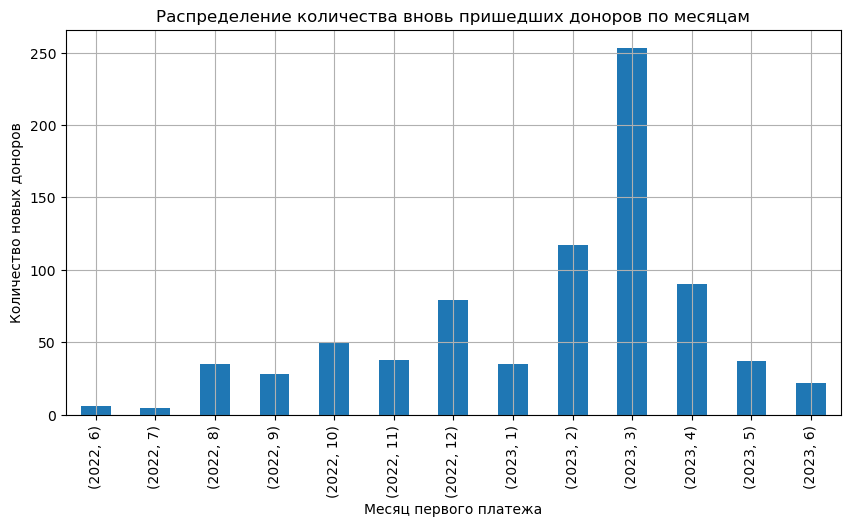

In [68]:
# считаем количество вновь пришедших доноров по месяцам
donors.groupby(by=['first_year', 'first_month']).agg({'code': 'count'}).plot.bar(grid=True, figsize=(10,5), legend=None)
plt.title('Распределение количества вновь пришедших доноров по месяцам')
plt.xlabel('Месяц первого платежа')
plt.ylabel('Количество новых доноров')
plt.show()

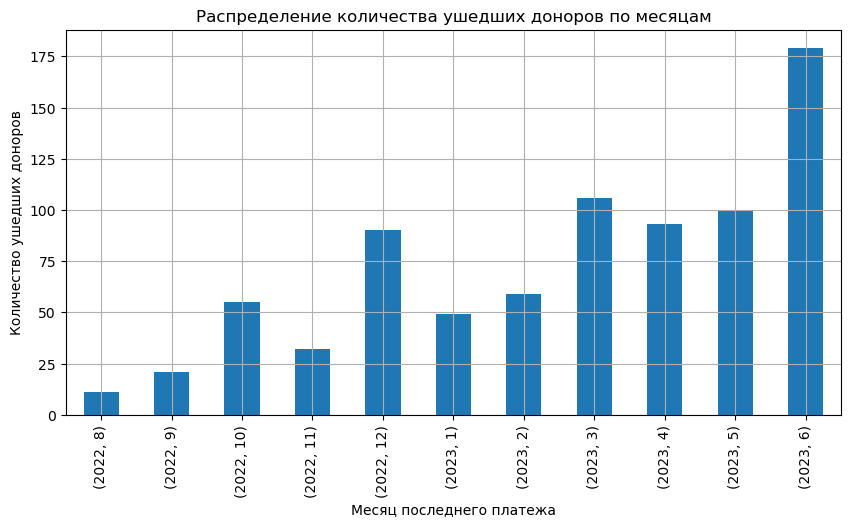

In [69]:
# считаем количество ушедших доноров по месяцам
donors.groupby(by=['last_year', 'last_month']).agg({'code': 'count'}).plot.bar(grid=True, figsize=(10,5), legend=None)
plt.title('Распределение количества ушедших доноров по месяцам')
plt.xlabel('Месяц последнего платежа')
plt.ylabel('Количество ушедших доноров')
plt.show()

Данные в таблице распределены неравномерно, но присутствуют данные за все месяцы выделенного периода.

Распределение значений в зависимости от даты первого и последнего платежа рассмотрим в разделе Исследовательский анализ.

## Столбец `total_amount`

Проверим таблицу на наличие доноров с нулевыми платежами.

In [70]:
print(f"Доноров с нулевыми количеством и суммой платежей: {len(donors.query('total_amount == 0'))}.")
print(f"Их доля от общего количества доноров в таблице составляет {round(100*len(donors.query('total_amount == 0')) / len(donors),2)}%.")

Доноров с нулевыми количеством и суммой платежей: 0.
Их доля от общего количества доноров в таблице составляет 0.0%.


В отличие от таблицы `clients` в таблице `donors` доноров с нулевыми платежами нет.

Проверим корректность данных. Должно выполняться несколько условий:
- общая сумма платежей должна быть равна сумме первого платежа или сумме последнего платежа или быть больше любой из них
- для тех доноров, у кого сумма первого не совпадает с общей суммы всех платежей (т.е., если донор совершал несколько платежей), сумма первого и последнего платежей не должна превышать общую сумму всех платежей.


In [71]:
# проверяем выполнение первого условия: общая сумма платежей должна быть равна или больше суммы первого платежа
(donors['total_amount'] >= donors['first_amount']).value_counts()

True     786
False      9
dtype: int64

In [72]:
# проверяем выполнение первого условия: общая сумма платежей должна быть равна или больше суммы последнего платежа
(donors['total_amount'] >= donors['last_amount']).value_counts()

True    795
dtype: int64

In [73]:
# проверяем выполнение второго условия: общая сумма платежей не должна быть меньше суммы первого и последнего платежей для тех строк, в которых сумма первого и последнего платежей не совпадают
((donors['first_amount'] != donors['total_amount']) & (donors['first_amount'] + donors['last_amount'] > donors['total_amount'])).value_counts()

False    772
True      23
dtype: int64

По первому условию есть несовпадения в 9 строках. По второму - в 23. Проверим, нет ли в этих данных пересечений. Пересечения ищем по индексам строк.

In [74]:
matches = 0
for i in donors[(donors['first_amount'] != donors['total_amount']) & (donors['first_amount'] + donors['last_amount'] > donors['total_amount'])].index:
  if i in donors[donors['total_amount'] < donors['first_amount']].index:
    matches += 1
matches

9

Всего найдено 9 пересечений, т.е. все аномальные строки по первому условию входят в аномальные строки по 2 условию. Рассмотрим эти данные.

In [75]:
donors[(donors['first_amount'] != donors['total_amount']) & (donors['first_amount'] + donors['last_amount'] > donors['total_amount'])]

id is_multiple first_payment  first_amount  \
6    827     разовый    2023-06-19         300.0   
31   802  постоянный    2023-05-20         300.0   
34   799     разовый    2023-04-09        3000.0   
54   778  постоянный    2023-05-02         300.0   
66   766  постоянный    2023-04-27         200.0   
84   748     разовый    2023-04-14          50.0   
107  725  постоянный    2023-04-06        2800.0   
131  701     разовый    2023-04-04          10.0   
244  588  постоянный    2023-03-15         450.0   
287  545     разовый    2023-02-27          50.0   
296  536     разовый    2023-02-26       20000.0   
309  523  постоянный    2023-02-26         500.0   
335  497     разовый    2023-02-19         300.0   
357  474  постоянный    2023-02-03         250.0   
374  456     разовый    2022-11-23         300.0   
528  296  постоянный    2022-11-22         300.0   
558  266  постоянный    2022-11-27          50.0   
561  263  постоянный    2022-08-15         300.0   
570  254     разовый    2022-11-11         300.0   
580  244  постоянный    2022-11-07         300.0   
619  205     разовый    2022-06-20         300.0   
672  152     разовый    2022-09-30         500.0   
771   53     разовый    2022-08-30         170.0   

                                        first_campaign  labels  \
6    На уставную деятельность и содержание организации     NaN   
31   На уставную деятельность и содержание организации     NaN   
34   На уставную деятельность и содержание организации     NaN   
54   На уставную деятельность и содержание организации     NaN   
66   На уставную деятельность и содержание организации     NaN   
84   На уставную деятельность и содержание организации     NaN   
107  На уставную деятельность и содержание организации     NaN   
131  На уставную деятельность и содержание организации     NaN   
244  На уставную деятельность и содержание организации     NaN   
287  На уставную деятельность и содержание организации     NaN   
296  На уставную деятельность и содержание организации     NaN   
309  На уставную деятельность и содержание организации     NaN   
335  На уставную деятельность и содержание организации     NaN   
357  На уставную деятельность и содержание организации     NaN   
374  На уставную деятельность и содержание организации     NaN   
528  На уставную деятельность и содержание организации     NaN   
558  На уставную деятельность и содержание организации     NaN   
561  На уставную деятельность и содержание организации     NaN   
570  На уставную деятельность и содержание организации     NaN   
580  На уставную деятельность и содержание организации     NaN   
619  На уставную деятельность и содержание организации     NaN   
672  На уставную деятельность и содержание организации     NaN   
771  На уставную деятельность и содержание организации     NaN   

                                             campaigns  \
6    На уставную деятельность и содержание организации   
31   На уставную деятельность и содержание организации   
34   На уставную деятельность и содержание организации   
54   На уставную деятельность и содержание организации   
66   На уставную деятельность и содержание организации   
84   На уставную деятельность и содержание организации   
107  На уставную деятельность и содержание организации   
131  На уставную деятельность и содержание организации   
244  На уставную деятельность и содержание организации   
287  На уставную деятельность и содержание организации   
296  На уставную деятельность и содержание организации   
309  На уставную деятельность и содержание организации   
335  На уставную деятельность и содержание организации   
357  На уставную деятельность и содержание организации   
374  На уставную деятельность и содержание организации   
528  На уставную деятельность и содержание организации   
558  На уставную деятельность и содержание организации   
561  На уставную деятельность и содержание организации   
570  На уставную деятельность и содержание организации   
580  На уста

Визуальный осмотр аномальных строк позволяет предположить, что в большинстве случаев вероятнее всего то, что первый платеж по какой-то причине не был добавлен к общей сумме платежей. Там же, где дата первого и последнего платежей совпадают, вероятнее всего, верен последний платеж (первый мог по какой-то причине не пройти, а оплата второго платежа сразу же после успешной оплаты первого кажется маловероятным сценарием).

Составим следующие функции: сравним между собой даты первого и последнего платежа, и если они не равны, прибавим сумму первого платежа к общей сумме. Если даты равны и сумма последнего платежа равна общей сумме, заменим сумму первого платежа на сумму последнего платежа.

In [76]:
# определение функции для пересчета общей суммы
f = lambda row: row['total_amount'] + row['first_amount'] if (row['first_amount'] != row['total_amount']) and row['first_amount'] + row['last_amount'] > row['total_amount'] and row['first_payment'] != row['last_payment'] else row['total_amount']

donors['total_amount'] = donors.loc[:, ['total_amount', 'first_amount', 'last_amount', 'first_payment', 'last_payment']].apply(f, axis=1)


In [77]:
# определение функции для пересчета суммы первого платежа
f = lambda row: row['total_amount'] if (row['first_amount'] != row['total_amount']) and row['first_amount'] + row['last_amount'] > row['total_amount'] and row['first_payment'] == row['last_payment'] else row['first_amount']

donors['first_amount'] = donors.loc[:, ['total_amount', 'first_amount', 'last_amount', 'first_payment', 'last_payment']].apply(f, axis=1)

Проверяем таблицу еще раз на соответствие.

In [78]:
# проверяем выполнение первого условия: общая сумма платежей должна быть равна или больше суммы первого платежа
(donors['total_amount'] >= donors['first_amount']).value_counts()

True    795
dtype: int64

In [79]:
# проверяем выполнение первого условия: общая сумма платежей должна быть равна или больше суммы последнего платежа
(donors['total_amount'] >= donors['last_amount']).value_counts()

True    795
dtype: int64

In [80]:
# проверяем выполнение второго условия: общая сумма платежей не должна быть меньше суммы первого и последнего платежей для тех строк, в которых сумма первого и последнего платежей не совпадают
((donors['first_amount'] != donors['total_amount']) & (donors['first_amount'] + donors['last_amount'] > donors['total_amount'])).value_counts()

False    795
dtype: int64

Аномальные значения удалены.

Изучим распределение данных в столбце.

In [81]:
donors['total_amount'].describe()

count      795.000000
mean      1734.620126
std       4571.897817
min         10.000000
25%        300.000000
50%        600.000000
75%       1230.000000
max      55000.000000
Name: total_amount, dtype: float64

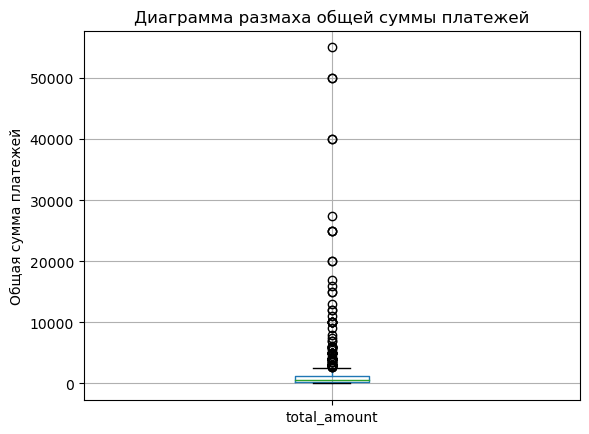

In [82]:
donors.boxplot(column=['total_amount'])

plt.title('Диаграмма размаха общей суммы платежей')
plt.ylabel('Общая сумма платежей')
plt.show()

Медианная общая сумма пожертвования от одного донора: 600 рублей. Более подробно распределение изучим в разбивке по признаку разовый/повторный.

Как и в предыдущей таблице, имеют место выбросы. Изучим выбросы (доноров с общей суммой платежей больше 50000 рублей).

In [83]:
donors[donors['total_amount'] >= 50000]

id is_multiple first_payment  first_amount  \
93   739     разовый    2023-04-11       50000.0   
151  681     разовый    2023-03-30       50000.0   
230  602     разовый    2023-03-21        5000.0   

                                        first_campaign  labels  \
93   На уставную деятельность и содержание организации     NaN   
151  На уставную деятельность и содержание организации     NaN   
230  На уставную деятельность и содержание организации     NaN   

                                             campaigns payment_provider  \
93   На уставную деятельность и содержание организации          MIXPLAT   
151  На уставную деятельность и содержание организации          MIXPLAT   
230  На уставную деятельность и содержание организации          MIXPLAT   

    last_payment  last_amount  \
93    2023-04-11      50000.0   
151   2023-03-30      50000.0   
230   2023-04-07      50000.0   

                                         last_campaign  total_amount currency  \
93   На уставную деятельность и содержание организации       50000.0        ₽   
151  На уставную деятельность и содержание организации       50000.0        ₽   
230  На уставную деятельность и содержание организации       55000.0        ₽   

     code  first_month  first_year  last_month  last_year  
93   2378            4        2023           4       2023  
151  1936            3        2023           3       2023  
230  2515            3        2023           4       2023

Все максимально высокие платежи были сделаны разовыми донорами (один из них совершил больше одного платежа, но они, судя по всему, не были оформлены как регулярная подписка).

In [84]:
print(f"Всего доноры совершили платежей на общую сумму {donors['total_amount'].sum()} рублей.")

Всего доноры совершили платежей на общую сумму 1379023.0 рублей.


## Столбец `payment_provider`

In [85]:
providers = donors.groupby('payment_provider').agg({'code': 'count'})
providers['rate2total'] = round(providers['code'] / len(donors),2)
providers.sort_values(by='code', ascending=False)

code  rate2total
payment_provider                             
MIXPLAT                       765        0.96
MIXPLAT, Сбербанк Эквайринг    16        0.02
MIXPLAT, Квитанции              8        0.01
Сбербанк Эквайринг              6        0.01

96% доноров производили платежи через платежную систему MIXPLAT.

Так как от заказчика нам известно, что в какой-то момент произошел переход от приема пожертвований на [сайте Больнички](https://charityhospital.ru/donate/) от какого-то другого оператора к оператору MIXPLAT, предполагаем, что в таблице `clients` собраны данные о пожертвованиях как до этого перехода, так и после. Таблица `donors` предоставлена платежным оператором и может содержать как данные о пожертвованиях с сайта Больнички, так и с каких-то других сайтов (например, [donation.ru](https://donation.ru/charityhospital/)), на которых используется форма MIXPLAT.

## Столбцы `campaigns`, `first_campaign` и `last_campaign`

Изучим уникальные значения в столбцах



In [86]:
campaigns = donors.groupby('campaigns').agg({'code': 'count'})
campaigns['rate2total'] = round(100*campaigns['code'] / len(donors),2)
campaigns.sort_values(by='code', ascending=False)

code  \
campaigns                                                                  
На уставную деятельность и содержание организации                    791   
#Больничкабежит                                                        3   
#Больничкабежит, На уставную деятельность и содержание организации     1   

                                                                    rate2total  
campaigns                                                                       
На уставную деятельность и содержание организации                        99.50  
#Больничкабежит                                                           0.38  
#Больничкабежит, На уставную деятельность и содержание организации        0.13

В таблице содержатся два уникальных наименования кампаний:
- На уставную деятельность и содержание организации
- #Больничкабежит

У 99,5% доноров (791) указана первая кампания, у трех доноров - вторая, а у одного - обе. Предполагаем, что кампания *На уставную деятельность и содержание организации* - это значение, проставляемое по умолчанию, а *#Больничкабежит* - это кампания по сбору средств на конкретное [мероприятие](https://vk.com/feed?q=%23%D0%91%D0%BE%D0%BB%D1%8C%D0%BD%D0%B8%D1%87%D0%BA%D0%B0%D0%B1%D0%B5%D0%B6%D0%B8%D1%82&section=search&w=wall-168345698_3477) по ссылке https://donation.ru/charityhospital/bolnichkabejit/, указанной в в записи (в настоящий момент по ссылке открывается станица общего сбора пожертвований через оператора Миксплат Процессинг).

In [87]:
donors['first_campaign'].value_counts()

На уставную деятельность и содержание организации    792
#Больничкабежит                                        3
Name: first_campaign, dtype: int64

In [88]:
donors['last_campaign'].value_counts()

На уставную деятельность и содержание организации    792
#Больничкабежит                                        3
Name: last_campaign, dtype: int64

In [89]:
donors.query('campaigns == "#Больничкабежит" or campaigns == "#Больничкабежит, На уставную деятельность и содержание организации"')

id is_multiple first_payment  first_amount  \
385  444     разовый    2023-02-21         100.0   
556  268     разовый    2022-11-29          50.0   
630  194     разовый    2022-10-24         300.0   
675  149     разовый    2022-10-03          50.0   

                                        first_campaign  labels  \
385                                    #Больничкабежит     NaN   
556                                    #Больничкабежит     NaN   
630                                    #Больничкабежит     NaN   
675  На уставную деятельность и содержание организации     NaN   

                                                              campaigns  \
385                                                     #Больничкабежит   
556                                                     #Больничкабежит   
630                                                     #Больничкабежит   
675  #Больничкабежит, На уставную деятельность и содержание организации   

    payment_provider last_payment  last_amount  \
385          MIXPLAT   2023-06-21        100.0   
556          MIXPLAT   2022-11-29         50.0   
630          MIXPLAT   2022-10-24        300.0   
675          MIXPLAT   2022-10-03         10.0   

                                         last_campaign  total_amount currency  \
385                                    #Больничкабежит         500.0        ₽   
556                                    #Больничкабежит          50.0        ₽   
630                                    #Больничкабежит         300.0        ₽   
675  На уставную деятельность и содержание организации         110.0        ₽   

     code  first_month  first_year  last_month  last_year  
385  2670            2        2023           6       2023  
556  1180           11        2022          11       2022  
630  1621           10        2022          10       2022  
675  2960           10        2022          10       2022

Кампания *#Больничкабежит* была первой и последней кампанией для трех доноров. Вероятно, адресный сбор на такую кампанию проводится не в постоянном режиме.

## Столбец `currency`

In [90]:
donors['currency'].value_counts()

₽    795
Name: currency, dtype: int64

Все суммы в таблице указаны в рублях.

## Столбец `is_multiple`

In [91]:
reg = donors.groupby('is_multiple').agg({'code': 'count'})
reg['rate2total'] = round(100*reg['code'] / len(donors),1)
reg.sort_values(by='code', ascending=False)

code  rate2total
is_multiple                  
разовый       648        81.5
постоянный    147        18.5

In [92]:
print(f"Разовых доноров с несколькими платежами: {len(donors[(donors['is_multiple'] == 'разовый') & (donors['first_amount'] < donors['total_amount'])])}")
print(f"Постоянных доноров с одним платежом: {len(donors[(donors['is_multiple'] == 'постоянный') & (donors['first_amount'] == donors['total_amount'])])}")

Разовых доноров с несколькими платежами: 223
Постоянных доноров с одним платежом: 42


Пропусков данных в столбце нет. Разовых доноров в таблице 648 (81,5% от общего количества), постоянных - 147 (18,5%). При этом 223 разовых донора совершили больше одного платежа (так как общая сумма пожертвований больше суммы первого пожертвования), а 42 постоянных совершили только один платеж (сумма первого платежа совпадает с общей суммой пожертвований). Некоторые пользователи, очевидно, делали по несколько платежей, не подписываясь при этом на регулярные платежи, а часть постоянных доноров либо отменили подписку до совершения второго платежа, либо еще не успели совершить второй платеж, так как оформили подписку ближе к концу рассматриваемого периода.

Отметка разовый/постоянный вероятнее всего проставляется при первом платеже. Преобразуем данный столбец следующим образом:
- метку 'разовый' заменим на 0
- метку 'постоянный' заменим на 1

In [93]:
donors['is_multiple'] = donors['is_multiple'].replace('разовый', 0)
donors['is_multiple'] = donors['is_multiple'].replace('постоянный', 1)

In [94]:
donors

id  is_multiple first_payment  first_amount  \
0    833            0    2023-06-21        3000.0   
1    832            1    2023-06-20         500.0   
2    831            1    2023-06-20         500.0   
3    830            0    2023-06-20        1000.0   
4    829            1    2023-06-19         100.0   
..   ...          ...           ...           ...   
808   16            1    2022-08-18          55.0   
809   15            0    2023-02-18          50.0   
810   14            1    2022-08-12          50.0   
811   13            1    2022-08-17          50.0   
812    5            0    2023-03-07          50.0   

                                        first_campaign  labels  \
0    На уставную деятельность и содержание организации     NaN   
1    На уставную деятельность и содержание организации     NaN   
2    На уставную деятельность и содержание организации     NaN   
3    На уставную деятельность и содержание организации     NaN   
4    На уставную деятельность и содержание организации     NaN   
..                                                 ...     ...   
808  На уставную деятельность и содержание организации     NaN   
809  На уставную деятельность и содержание организации     NaN   
810  На уставную деятельность и содержание организации     NaN   
811  На уставную деятельность и содержание организации     NaN   
812  На уставную деятельность и содержание организации     NaN   

                                             campaigns payment_provider  \
0    На уставную деятельность и содержание организации          MIXPLAT   
1    На уставную деятельность и содержание организации          MIXPLAT   
2    На уставную деятельность и содержание организации          MIXPLAT   
3    На уставную деятельность и содержание организации          MIXPLAT   
4    На уставную деятельность и содержание организации          MIXPLAT   
..                                                 ...              ...   
808  На уставную деятельность и содержание организации          MIXPLAT   
809  На уставную деятельность и содержание организации          MIXPLAT   
810  На уставную деятельность и содержание организации          MIXPLAT   
811  На уставную деятельность и содержание организации          MIXPLAT   
812  На уставную деятельность и содержание организации          MIXPLAT   

    last_payment  last_amount  \
0     2023-06-21       3000.0   
1     2023-06-20        500.0   
2     2023-06-20        500.0   
3     2023-06-20       1000.0   
4     2023-06-19        100.0   
..           ...          ...   
808   2022-08-18         55.0   
809   2023-06-18         50.0   
810   2022-11-23         50.0   
811   2022-12-17         50.0   
812   2023-04-06         50.0   

                                         last_campaign  total_amount currency  \
0    На уставную деятельность и содержание организации        3000.0        ₽   
1    На уставную деятельность и содержание организации         500.0        ₽   
2    На уставную деятельность и содержание организации         500.0        ₽   
3    На уставную деятельность и содержание организации        1000.0        ₽   
4    На уставную деятельность и содержание организации         100.0        ₽   
..                                                 ...           ...      ...   
808  На уставную деятельность и содержание организации          55.0        ₽   
809  На уставную деятельность и содержание организации         250.0        ₽   
810  На уставную деятельность и содержание организации         151.0        ₽   
811  На уставную деятельность и содержание организации         405.0        ₽   
812  На уставную деятельность и содержание организации         150.0        ₽   

     code  first_month  first_year  last_month  last_year  
0    2285            6        2023           6       2023  
1    2286            6        2023           6       2023  
2    1479            6        2023           6       2023  
3    2288            6        2023           6       2023  
4    

## Столбец `labels`

Так как столбец полностью пустой, его можно удалить.

In [95]:
donors = donors.drop(columns=['labels'])

## Результаты предобработки таблицы `donors`

Рассмотрим обработанную таблицу:

In [96]:
donors.head()

id  is_multiple first_payment  first_amount  \
0  833            0    2023-06-21        3000.0   
1  832            1    2023-06-20         500.0   
2  831            1    2023-06-20         500.0   
3  830            0    2023-06-20        1000.0   
4  829            1    2023-06-19         100.0   

                                      first_campaign  \
0  На уставную деятельность и содержание организации   
1  На уставную деятельность и содержание организации   
2  На уставную деятельность и содержание организации   
3  На уставную деятельность и содержание организации   
4  На уставную деятельность и содержание организации   

                                           campaigns payment_provider  \
0  На уставную деятельность и содержание организации          MIXPLAT   
1  На уставную деятельность и содержание организации          MIXPLAT   
2  На уставную деятельность и содержание организации          MIXPLAT   
3  На уставную деятельность и содержание организации          MIXPLAT   
4  На уставную деятельность и содержание организации          MIXPLAT   

  last_payment  last_amount  \
0   2023-06-21       3000.0   
1   2023-06-20        500.0   
2   2023-06-20        500.0   
3   2023-06-20       1000.0   
4   2023-06-19        100.0   

                                       last_campaign  total_amount currency  \
0  На уставную деятельность и содержание организации        3000.0        ₽   
1  На уставную деятельность и содержание организации         500.0        ₽   
2  На уставную деятельность и содержание организации         500.0        ₽   
3  На уставную деятельность и содержание организации        1000.0        ₽   
4  На уставную деятельность и содержание организации         100.0        ₽   

   code  first_month  first_year  last_month  last_year  
0  2285            6        2023           6       2023  
1  2286            6        2023           6       2023  
2  1479            6        2023           6       2023  
3  2288            6        2023           6       2023  
4  2289            6        2023           6       2023

In [97]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 812
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                795 non-null    int64  
 1   is_multiple       795 non-null    int64  
 2   first_payment     795 non-null    object 
 3   first_amount      795 non-null    float64
 4   first_campaign    795 non-null    object 
 5   campaigns         795 non-null    object 
 6   payment_provider  795 non-null    object 
 7   last_payment      795 non-null    object 
 8   last_amount       795 non-null    float64
 9   last_campaign     795 non-null    object 
 10  total_amount      795 non-null    float64
 11  currency          795 non-null    object 
 12  code              795 non-null    int64  
 13  first_month       795 non-null    int64  
 14  first_year        795 non-null    int64  
 15  last_month        795 non-null    int64  
 16  last_year         795 non-null    int64  
dt

Выполнено следующее:

- Переименованы столбцы
- Преобразованы типы данных в столбцах:
  - `first_payment`
  - `last_payment`
- Удалены 18 строк (2,21% данных) с пропусками
- Полностью удален столбец `labels` (`Метки донора`)

# Объединение таблиц `clients` и `donors`

Одинаковых столбцов в двух таблицах немного: код донора, даты первого и последнего платежей, общая сумма платежей и метка "разовый/постоянный". Объединим эты данные в одну таблицу.

In [98]:
# создаем объединенный датасет на основании столбцов, одинаковых в обеих таблицах
all = pd.concat([clients[['code', 'first_payment', 'last_payment', 'total_amount', 'is_multiple']], donors[['code', 'first_payment', 'last_payment', 'total_amount', 'is_multiple']]])
print('Объединенная таблица создана.')

# проверяем, соответствует ли количество строк сумме строк в двух таблицах
if len(all) == len(clients)+ len(donors):
    print('Количество строк в объединенной таблице равно сумме строк в двух исходных таблицах. Объединение прошло корректно.')
else:
    print('Количество строк в объединенной таблице не равно сумме строк в двух исходных таблицах. Объединение прошло некорректно.')

Объединенная таблица создана.
Количество строк в объединенной таблице равно сумме строк в двух исходных таблицах. Объединение прошло корректно.


In [99]:
# загрузка первых строк таблицы
all.head()

code first_payment last_payment  total_amount  is_multiple
0  1118    2021-12-28   2021-12-28           0.0            0
1  1119    2022-03-12   2022-03-12           0.0            0
2  1120    2022-11-23   2022-11-23           0.0            0
3  1121    2022-11-23   2022-11-23         500.0            0
4  1122    2021-12-29   2021-12-29        1000.0            0

In [100]:
# загрузка информации о таблице
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 812
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   code           1961 non-null   int64  
 1   first_payment  1961 non-null   object 
 2   last_payment   1961 non-null   object 
 3   total_amount   1961 non-null   float64
 4   is_multiple    1961 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 91.9+ KB


Объединенная таблица содержит 1961 строку и 5 столбцов, заданных при объединении. Хотя мы предполагаем, что сбор данных в таблицы ведется из разных источников, по условию нам известно, что часть данных может пересекаться. Посчитаем количество дубликатов.

In [101]:
# считаем явные дубликаты
print(f"В объединенной таблице найдено {all.duplicated().sum()} явных дубликатов. Их доля составляет {round(100*all.duplicated().sum() / len(all),2)}% от всех объединенных данных.")

В объединенной таблице найдено 341 явных дубликатов. Их доля составляет 17.39% от всех объединенных данных.


Полных дубликатов обнаружено достаточно много. Удалим их.

In [102]:
all = all.drop_duplicates()
print('Явные дубликаты удалены')

Явные дубликаты удалены


Помимо явных дубликатов в объединенной таблице могут содержаться дубликаты неявные: те доноры, данные по которым в двух системах расходятся. Посчитаем, сколько раз повторяется код каждого донора, а затем посчитаем тех доноров, записи о которых содержатся в таблице более одного раза.

In [103]:
# считаем неявные дубликаты
duplicates = []
for i in all['code'].value_counts().index:
    if all['code'].value_counts()[i] > 1:
        duplicates.append(i)
print(f"Неявных дубликатов в таблице: {len(duplicates)}")
print(f"Их доля от общего количества данных составляет {round(100* len(duplicates)/ len(all),2)}%")

Неявных дубликатов в таблице: 151
Их доля от общего количества данных составляет 9.32%


In [104]:
all.query('code in @duplicates').sort_values(by='code').head(20)

code first_payment last_payment  total_amount  is_multiple
7    1125    2021-12-31   2022-10-05         300.0            0
663  1125    2022-10-05   2022-10-05         300.0            0
702  1127    2023-03-16   2023-05-16         900.0            0
9    1127    2022-10-16   2022-11-16         600.0            1
697  1146    2023-02-18   2023-06-18        1750.0            0
28   1146    2022-09-18   2023-05-18        3150.0            1
30   1148    2022-11-19   2022-11-19        1000.0            0
567  1148    2022-11-19   2022-11-19        1000.0            1
626  1159    2022-10-26   2023-01-28         300.0            1
41   1159    2022-10-26   2023-06-01         300.0            1
625  1160    2023-02-26   2023-05-26        1200.0            0
42   1160    2022-10-26   2023-05-26        2400.0            1
558  1161    2022-11-27   2022-11-27         300.0            1
43   1161    2022-01-15   2022-11-27         300.0            0
555  1181    2022-11-29   2022-11-29         500.0            1
63   1181    2022-11-29   2023-01-02         500.0            0
65   1183    2022-11-30   2022-11-30         200.0            0
554  1183    2022-11-30   2022-11-30         200.0            1
78   1196    2022-11-01   2022-12-01         200.0            0
609  1196    2022-11-01   2022-11-01         200.0            1

Варианты пересечения в неявных дубликатах разные:
- периоды между первым и последним платежом в двух таблицах не пересекаются
- периоды наслаиваются друг на друга
- период из одной таблицы полностью входит в период из другой таблицы
  - частный случай: в одной таблице дата первого и последнего платежей совпадают (т.е., платеж загеристрирован 1), а во второй таблице эта дата является либо датой первого, либо датой последнего платежа
- метка разовый/постоянный в двух таблицах не совпадает

Неявных дубликатов слишком много, чтобы мы могли оставить их без обработки или удалить. Очистим эти данные.

## Обработка неявных дубликатов

Для обработки неявных дубликатов составим несколько функций, которые позволят пересчитать общую сумму, поступившую от каждого пользователя, обновить метку "разовый/постоянный" и устранить расхождения в датах платежей.

Метку "разовый/постоянный" обновим следующим образом:
- если суммы платежей в двух таблицах совпадают или сумма платежей из таблицы `clients` больше суммы платежей из таблицы `donors`, будем считать, что все платежи из таблицы `donors` уже учтены в таблице `clients`; метку выбираем из таблицы `clients`
- если сумма платежей из таблицы `donors` больше суммы платежей из таблицы `clients`, будем считать, что какие-то платежи не были учтены в таблице `clients`; следовательно, их количество больше указанного в таблице `clients`, поэтому метку выбираем из таблицы `donors`

Перерасчитаем сумму платежей по следующим правилам:
- если период между первым и последним платежом полностью входит в такой период из другой таблицы, будем считать, что сумма платежей из меньшего периода уже учтена в сумме из большего периода; функция вернет больший из двух платежей
- если даты не пересекаются совсем, будем считать, что это независимые друг от друга платежи; функция вернет сумму платежей
- если один период накладываются друг на друга, будем считать, что и суммы платежей тоже пересекаются; функция вернет следующий результат:
`сумма платежей за более ранний период + средний платеж в месяц за более поздний период * количество месяцев, прошедших между последним платежом в более раннем периоде и последним платежом в более позднем периоде`
- средний платеж за месяц рассчитаем следующим образом: `сумма платежей за период / (разница между началом и концом периода + 1)`

Для устранения расхождений в датах платежей за границы возьмем самую ранную дату первого платежа их двух имеющихся и самую позднюю дату последнего платежа из двух имеющихся.

In [105]:
# выделяем строки с задублированными кодами из оригинальных таблиц
dub_clients = clients.query('code in @duplicates')
dub_donors = donors.query('code in @duplicates')

# объединяем эти данные методом merge
# получаем таблицу, каждой строчке которой соответствует один донор с дублирующимися данными
dub = dub_clients[['code', 'first_payment', 'last_payment', 'total_amount', 'is_multiple']].merge(dub_donors[['code', 'first_payment', 'last_payment', 'total_amount', 'is_multiple']], on='code')

In [106]:
# загружаем первые 10 строк
dub.head(10)

code first_payment_x last_payment_x  total_amount_x  is_multiple_x  \
0  1125      2021-12-31     2022-10-05             300              0   
1  1127      2022-10-16     2022-11-16             600              1   
2  1146      2022-09-18     2023-05-18            3150              1   
3  1148      2022-11-19     2022-11-19            1000              0   
4  1159      2022-10-26     2023-06-01             300              1   
5  1160      2022-10-26     2023-05-26            2400              1   
6  1161      2022-01-15     2022-11-27             300              0   
7  1181      2022-11-29     2023-01-02             500              0   
8  1183      2022-11-30     2022-11-30             200              0   
9  1196      2022-11-01     2022-12-01             200              0   

  first_payment_y last_payment_y  total_amount_y  is_multiple_y  
0      2022-10-05     2022-10-05           300.0              0  
1      2023-03-16     2023-05-16           900.0              0  
2      2023-02-18     2023-06-18          1750.0              0  
3      2022-11-19     2022-11-19          1000.0              1  
4      2022-10-26     2023-01-28           300.0              1  
5      2023-02-26     2023-05-26          1200.0              0  
6      2022-11-27     2022-11-27           300.0              1  
7      2022-11-29     2022-11-29           500.0              1  
8      2022-11-30     2022-11-30           200.0              1  
9      2022-11-01     2022-11-01           200.0              1

In [107]:
# обновляем метку разовый/постоянный
f = lambda row: row['is_multiple_x'] if (row['total_amount_x'] >= row['total_amount_y']) else row['is_multiple_y']
dub['is_multiple'] = dub.loc[:, ['is_multiple_x', 'is_multiple_y', 'total_amount_x', 'total_amount_y']].apply(f, axis=1).astype('int')

In [108]:
# определяем вспомогательную функцию для расчета разницы между двумя датами в месяцах
def number_of_months(end, start):
    return 12*(end.year - start.year) + (end.month - start.month)

In [109]:
# определяем функцию для пересчета общей суммы платежей

def clear_total(row):
    # если один период полностью входит в другой, возвращаем наибольшую сумму:
    if (row['first_payment_x'] <= row['first_payment_y'] and row['last_payment_x'] >= row['last_payment_y']) or (row['first_payment_y'] <= row['first_payment_x'] and row['last_payment_y'] >= row['last_payment_x']):
        if row['total_amount_x'] > row['total_amount_y']:
            return row['total_amount_x']
        else:
            return row['total_amount_y']
    # если даты не пересекаются, возвращаем общую сумму платежей
    elif row['last_payment_x'] < row['first_payment_y'] or row['last_payment_y'] < row['first_payment_x']:
        return row['total_amount_x'] + row['total_amount_y']
    # если даты пересекаются, считаем средний платеж за месяц по более поздним платежам и к сумме более ранних платежей добавляем сумму за период, выходящий за правую границу более раннего ппериода
    elif row['first_payment_x'] < row['first_payment_y'] and row['last_payment_x'] > row['first_payment_y'] and row['last_payment_x'] < row['last_payment_y']:
        mean_payment = row['total_amount_y'] / (number_of_months(row['last_payment_y'], row['first_payment_y']) + 1)
        return round(row['total_amount_x'] + mean_payment * number_of_months(row['last_payment_y'], row['last_payment_x']))
    elif row['first_payment_y'] < row['first_payment_x'] and row['last_payment_y'] > row['first_payment_x'] and row['last_payment_y'] < row['last_payment_x']:
        mean_payment = row['total_amount_x'] / (number_of_months(row['last_payment_x'], row['first_payment_x']) + 1)
        return round(row['total_amount_y'] + mean_payment * number_of_months(row['last_payment_x'], row['last_payment_y']))


In [110]:
# пересчитываем общую сумму платежей
dub['total_amount'] = dub.loc[:, ['first_payment_x', 'last_payment_x', 'first_payment_y', 'last_payment_y', 'total_amount_x', 'total_amount_y']].apply(clear_total, axis=1)

In [111]:
# в качестве даты первого платежа оставляем наиболее раннюю  из двух имеющихся
f = lambda row: row['first_payment_x'] if row['first_payment_x'] <= row['first_payment_y'] else row['first_payment_y']
dub['first_payment'] = dub.loc[:, ['first_payment_x', 'first_payment_y']].apply(f, axis=1)

# в качестве даты последнего платежа оставляем наиболее позднюю из двух имеющихся
f = lambda row: row['last_payment_x'] if row['last_payment_x'] >= row['last_payment_y'] else row['last_payment_y']
dub['last_payment'] = dub.loc[:, ['last_payment_x', 'last_payment_y']].apply(f, axis=1)

In [112]:
# оставляем в таблице только нужные столбцы
dub = dub[['code', 'first_payment', 'last_payment', 'total_amount', 'is_multiple']]

In [113]:
# загружаем первые 10 строк обработанной таблицы
dub.head(10)

code first_payment last_payment  total_amount  is_multiple
0  1125    2021-12-31   2022-10-05         300.0            0
1  1127    2022-10-16   2023-05-16        1500.0            0
2  1146    2022-09-18   2023-06-18        3500.0            1
3  1148    2022-11-19   2022-11-19        1000.0            0
4  1159    2022-10-26   2023-06-01         300.0            1
5  1160    2022-10-26   2023-05-26        2400.0            1
6  1161    2022-01-15   2022-11-27         300.0            0
7  1181    2022-11-29   2023-01-02         500.0            0
8  1183    2022-11-30   2022-11-30         200.0            0
9  1196    2022-11-01   2022-12-01         200.0            0

In [114]:
# убираем дубли из объединенной таблицы
all = all.query('code not in @duplicates')

In [115]:
# присоединяем очищенные данные из таблицы dub
all = pd.concat([all, dub])
print(f"Объединенная таблица создана. Количество записей после удаления дубликатов: {len(all)}")

Объединенная таблица создана. Количество записей после удаления дубликатов: 1469


Для дальнейшего анализа динамики платежей добавим в таблицу следующие столбцы:
- столбец `first_month` с месяцем первого платежа
- столбец `first_year` с годом первого платежа
- столбец `last_month` с месяцем последнего платежа
- столбец `last_year` с годом последнего платежа

In [116]:
# добавляем столбцы
all['first_month'] = pd.to_datetime(all['first_payment']).dt.month
all['first_year'] = pd.to_datetime(all['first_payment']).dt.year
all['last_month'] = pd.to_datetime(all['last_payment']).dt.month
all['last_year'] = pd.to_datetime(all['last_payment']).dt.year

## Изучение объединенных данных


### Изучение временных границ и распределения данных во времени

In [117]:
print(f"Дата записи о самом первом платеже в таблице: {str(all['first_payment'].min())}.")
print(f"Дата записи о самом последнем платеже в таблице: {str(all['last_payment'].max())}.\n")
print(f"Объединенная таблица содержит данные о {all['code'].nunique()} уникальных донорах.")
print(f"Ненулевые платежи совершили {all.query('total_amount != 0')['code'].nunique()} доноров.")
print(f"Все вместе за весь период эти доноры принесли Больничке {all['total_amount'].sum()} рублей.")

Дата записи о самом первом платеже в таблице: 2021-11-17.
Дата записи о самом последнем платеже в таблице: 2023-06-24.

Объединенная таблица содержит данные о 1469 уникальных донорах.
Ненулевые платежи совершили 1259 доноров.
Все вместе за весь период эти доноры принесли Больничке 2751277.0 рублей.


Изучим распределение данных по месяцам.

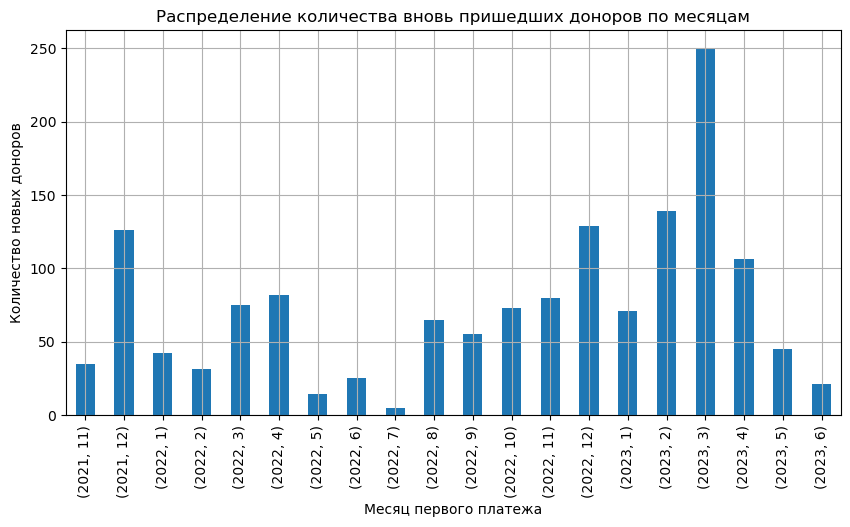

In [118]:
all.groupby(by=['first_year', 'first_month']).agg({'code': 'nunique'}).plot.bar(grid=True, figsize=(10,5), legend=None)
plt.title('Распределение количества вновь пришедших доноров по месяцам')
plt.xlabel('Месяц первого платежа')
plt.ylabel('Количество новых доноров')
plt.show()

Объединенная таблица содержит данные о донорах, совершивших платежи в период с 17.11.2021 по 24.06.2023 года. Данные в таблице распределены неравномерно. Больше всего пользователей совершили первый платеж в марте 2023 года, меньше всего - в июле 2022.

### Изучение зависимости значений от признака разовый/повторный

Многие представители НКО в различных интервью часто говорят о том, что регулярные небольшие платежи приносят организации гораздо больше пользы, чем разовые крупные - так проще планировать свою деятельность. Попробуем определить различия между разовыми и постоянными донорами.

При расчете количества доноров будем учитывать только тех доноров, сумма платежей у которых не равна 0.

In [119]:
mult = all.query('total_amount > 0').groupby(['is_multiple']).agg(donors=('code','count'), donations=('total_amount','sum'), max_donation=('total_amount','max'))
mult['donors_percent'] = round(100*mult['donors'] / len(all.query('total_amount > 0')),2)
mult['donations_percent'] = round(100*mult['donations'] / all['total_amount'].sum(),2)
mult

donors  donations  max_donation  donors_percent  \
is_multiple                                                    
0               787  1100928.0       55000.0           62.51   
1               472  1650349.0       98000.0           37.49   

             donations_percent  
is_multiple                     
0                        40.02  
1                        59.98

Таким образом, постоянных доноров в таблице меньше, чем разовых (62,5% разовых и 37,5% постоянных), но общая сумма, которую принесли постоянные доноры, превышает общую сумму пожертвований от разовых доноров (40% от разовых и 60% от постоянных).

Максимальный разовый платеж составил 55000 рублей, а максимальная сумма, которую принес один постоянный донор, составляет 98000 рублей.

Рассмотрим диаграмму размаха суммы пожертвований в разбивке по признаку разовый/повторный.

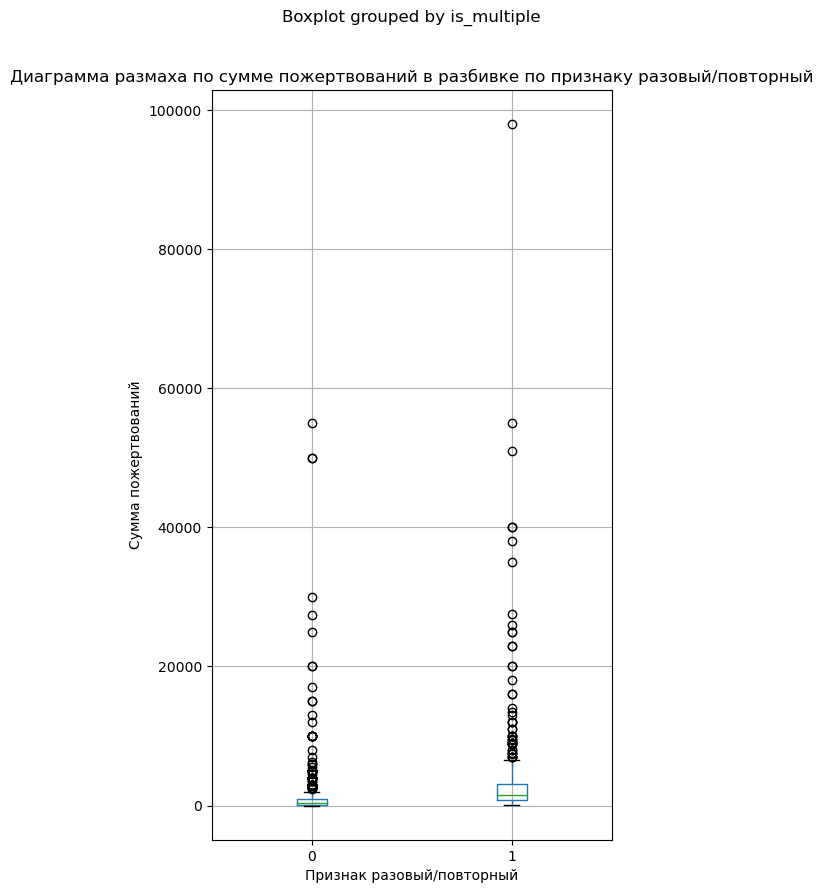

In [120]:
all.boxplot(column='total_amount', by='is_multiple', figsize=(5, 10))

plt.title('Диаграмма размаха по сумме пожертвований в разбивке по признаку разовый/повторный')
plt.xlabel('Признак разовый/повторный')
plt.ylabel('Сумма пожертвований')
plt.show()

Щедрые доноры есть в обеих категориях. Сделаем срез на отметке 20000, чтобы нагляднее увидеть разницу между медианными платежами.

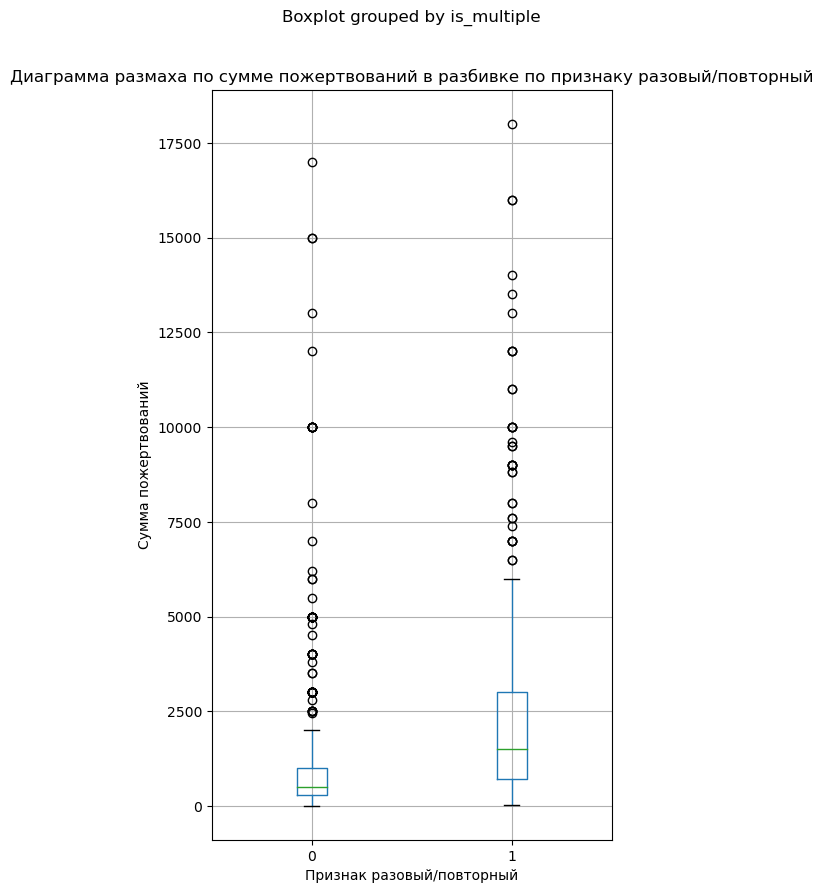

In [121]:
all.query('0 < total_amount < 20000').boxplot(column='total_amount', by='is_multiple', figsize=(5, 10))

plt.title('Диаграмма размаха по сумме пожертвований в разбивке по признаку разовый/повторный')
plt.xlabel('Признак разовый/повторный')
plt.ylabel('Сумма пожертвований')
plt.show()

Медианная сумма пожертвований, который за свой лайфтайм приносит повторный пользователь, значительно превышает медианную сумму разового пожертвования.

Очевидно, что маркетинговая стратегия должна быть направлена на привлечение регулярных пользователей. Частично эту функцию выполняет сама форма оплаты пожертвования на сайте Больнички.

### Распределение значений в зависимости от даты первого и последнего платежа

Сгруппируем данные по дате первого платежа и изучим распределение следующих показателей по датам:
- количество впервые пришедших доноров (только с ненулевыми платежами)
- общая сумма пожертвований за весь рассматриваемый период от впервые пришедших в конкретный день доноров

Сгруппируем данные по дате последнего платежа и изучим распределение следующих показателей по датам:
- количество ушедших повторных доноров (только с ненулевыми платежами)



#### Распределение количества доноров и суммы пожертвований в зависимости от даты первого платежа

In [122]:
# считаем количество доноров, впервые оплативших пожертвование в каждую дату, выбираем 5 дат с максимальным количеством новых доноров
all.query('total_amount > 0').pivot_table(index='first_payment', values='code', aggfunc='count').sort_values(by='code', ascending=False).head()

code
first_payment      
2021-12-23       50
2023-02-26       31
2022-12-30       30
2023-03-28       26
2023-03-29       24

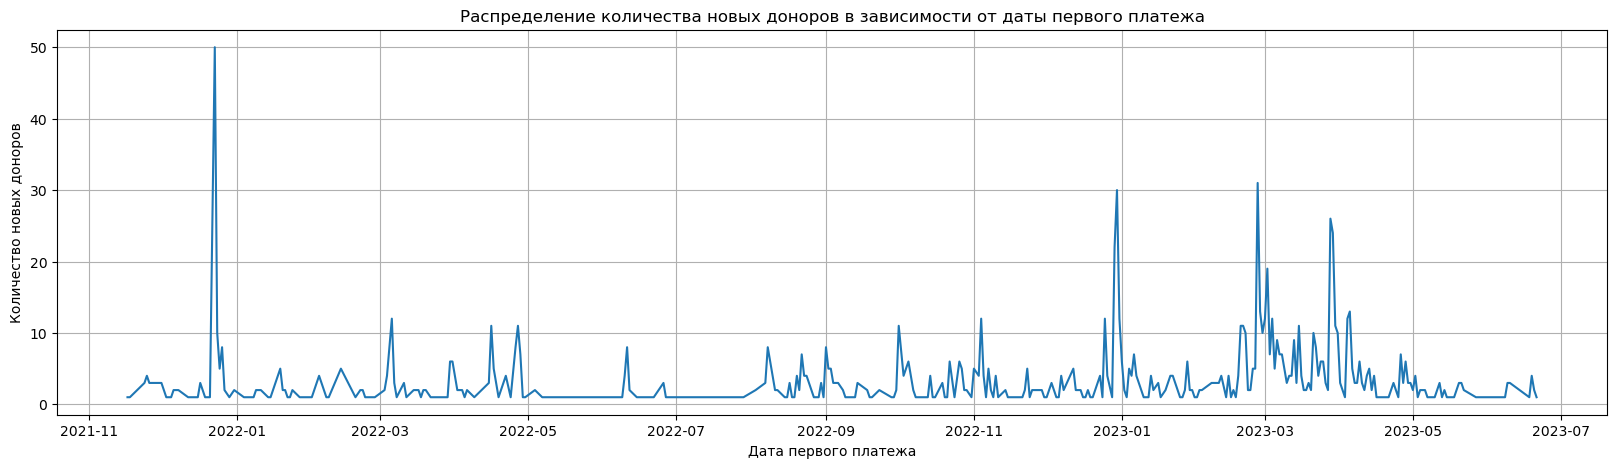

In [123]:
# строим график распределения количества новых доноров в зависимости от даты первого платежа
all.query('total_amount > 0').pivot_table(index='first_payment', values='code', aggfunc='count').plot(grid = True, figsize=(20, 5), legend=None)
plt.title('Распределение количества новых доноров в зависимости от даты первого платежа')
plt.xlabel('Дата первого платежа')
plt.ylabel('Количество новых доноров')
plt.show()

Максимальное количество новых доноров, впервые совершивших платеж (50), было зафиксировано 23.12.2021 года. Также выделяются 26.02.2023 (31 новый донор), 30.12.2022 (30), 28.03.2023 (26) и 29.03.2023 (24).

Далее рассмотрим общую сумму пожертвований, которую за весь рассматриваемый период оплатили доноры, впервые сделавшие платеж в каждый конкретный день. Важно понимать, что в таблице и на графике будет отображаться не поступившая сумма на конкретную дату, а накопленная сумма от всех пользователей, впервые совершивших платеж в этот день (т.е., как пожертвования, совершенные разовыми донорами в этот день, так и все пожертвования от повторных доноров за все их последующие платежи).

In [124]:
# считаем общую сумму пожертвований, которую оплатили доноры, впервые пришедшие в каждую конкретную дату, выбираем 5 дат с максимальной суммой
all.pivot_table(index='first_payment', values='total_amount', aggfunc='sum').sort_values(by='total_amount', ascending=False).head()

total_amount
first_payment              
2023-03-21         159400.0
2023-02-26         150274.0
2022-08-22         114350.0
2021-12-23          97250.0
2023-03-30          56200.0

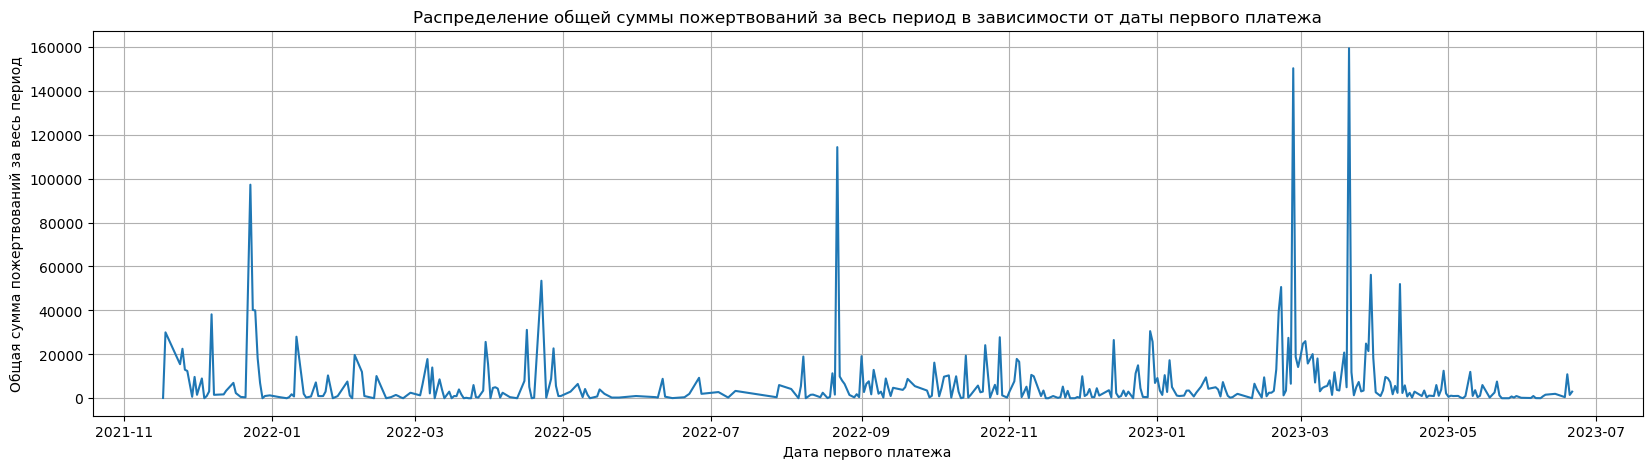

In [125]:
# строим график распределения общей суммы пожертвований в зависимости от даты первого платежа
all.pivot_table(index='first_payment', values='total_amount', aggfunc='sum').plot(grid = True, figsize=(20, 5), legend=None)
plt.title('Распределение общей суммы пожертвований за весь период в зависимости от даты первого платежа')
plt.xlabel('Дата первого платежа')
plt.ylabel('Общая сумма пожертвований за весь период')
plt.show()

Больше всего пожертвований в совокупности (159400 рублей) принесли доноры, впервые совершившие платеж 21.03.2023 года. Так как этот день не был в списке лидеров по количеству доноров, предполагаем, что в этот день пришли доноры, сделавшие крупные платежи.

Дни, в которые пришло много новых доноров:
- 23.12.2021
- 26.02.2023
- 31.12.2022
- 28.03.2023
- 29.03.2023

Дни, в которые пришли новые доноры, которые в совокупности принесли больше всего денег:
- 21.03.2023
- 26.02.2023
- 22.08.2022
- 23.12.2021
- 30.03.2023

Конец февраля и конец марта 2023, а также предновогодние дни оказались очень продуктивными в плане привлечения новых доноров и средств. Мы предполагаем, что в эти даты происходили какие-то события (запуск рекламных кампаний, публикации в СМИ, общественные мероприятия с участием представителей НКО и т.д.), которые могли стимулировать прирост доноров. Однако эффект от таких событий может быть растянутым во времени, поэтому будет полезно рассмотреть распределение по месяцам.

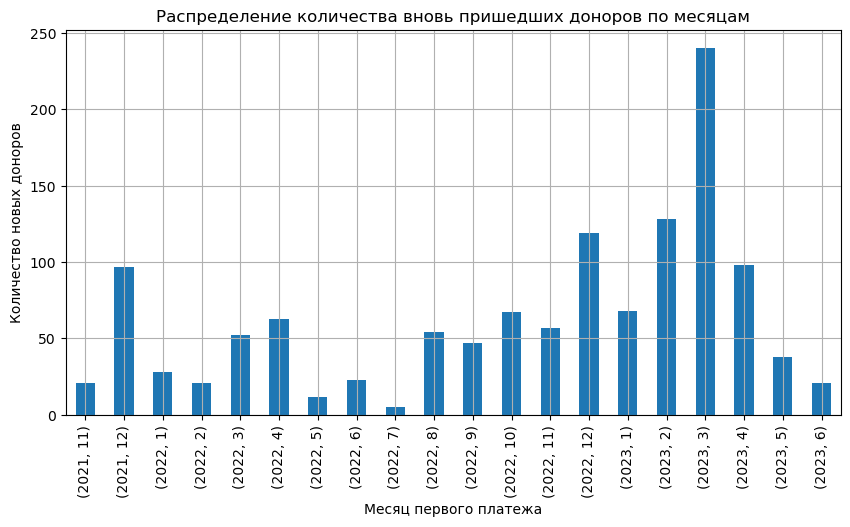

In [126]:
all.query('total_amount > 0').groupby(by=['first_year', 'first_month']).agg({'code': 'count'}).plot.bar(grid=True, figsize=(10,5), legend=None)
plt.title('Распределение количества вновь пришедших доноров по месяцам')
plt.xlabel('Месяц первого платежа')
plt.ylabel('Количество новых доноров')
plt.show()

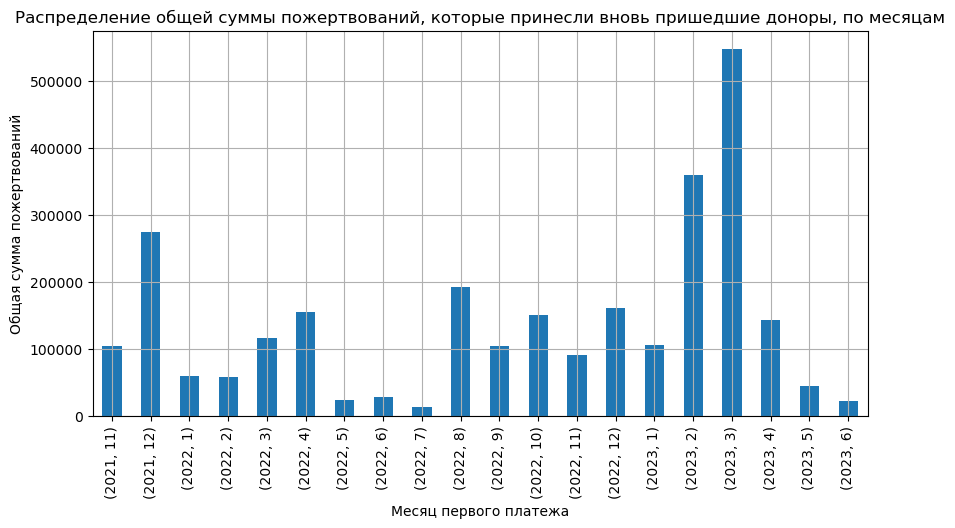

In [127]:
all.groupby(by=['first_year', 'first_month']).agg({'total_amount': 'sum'}).plot.bar(grid=True, figsize=(10,5), legend=None)
plt.title('Распределение общей суммы пожертвований, которые принесли вновь пришедшие доноры, по месяцам')
plt.xlabel('Месяц первого платежа')
plt.ylabel('Общая сумма пожертвований')
plt.show()


В разбивке по месяцам результат достаточно очевиден: чем больше новых доноров пришло в совокупности за месяц, тем больше денег они принесли в итоге. Выделим особенный успех февраля и марта 2023 года, а также заметный спад в период с мая по июль 2022 года.

#### Распределение количества доноров в зависимости от даты последнего платежа

Рассмотрим динамику оттока доноров. Разовые доноры нас в данном случае не интересуют, так как дата оттока у них совпадает с датой привлечения. Рассмотрим, в какие дни уходило больше всего постоянных доноров.

Максимальная дата последнего платежа в таблице - 24.06.2023. Можем сразу предположить, что для большинства постоянных доноров дата последнего платежа выпадет на май. Рассматривать динамику оттока будем без мая.

In [128]:
# для каждой даты считаем количество повторных доноров, для которых платеж в этот деть стал последним, выбираем 5 дат с максимальным количеством таких доноров
all[(all['is_multiple'] == 1) & (all['last_payment'] < dt.date(2023, 5, 1))].pivot_table(index='last_payment', values='code', aggfunc='count').sort_values(by='code', ascending=False).head(10)

code
last_payment      
2023-03-29       5
2023-03-28       5
2023-04-07       4
2023-01-28       4
2023-02-01       4
2022-12-31       4
2023-02-08       4
2023-01-17       4
2023-04-09       3
2022-04-16       3

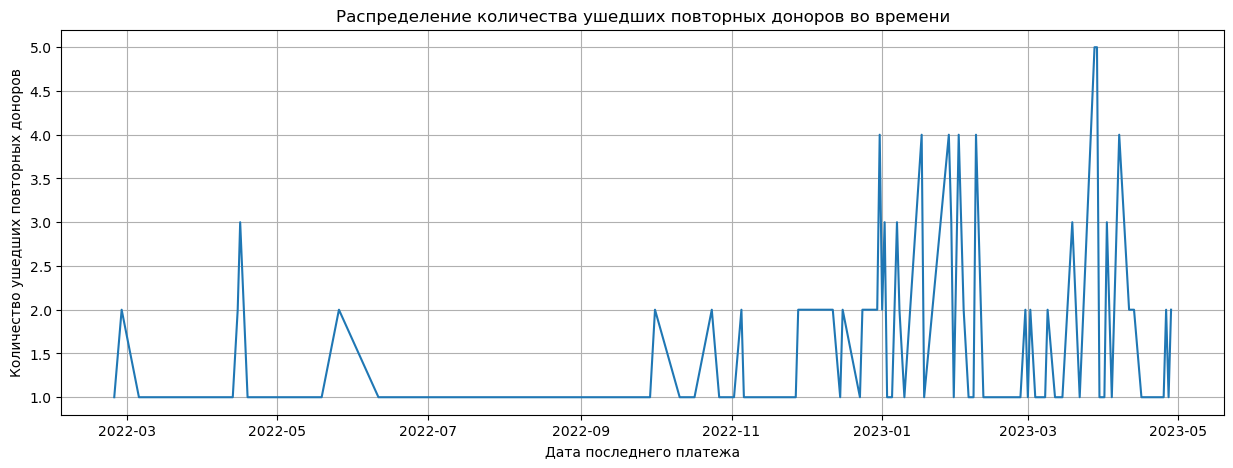

In [129]:
# строим график распределения количества ушедших доноров по датам
all[(all['is_multiple'] == 1) & (all['last_payment'] < dt.date(2023, 5, 1))].pivot_table(index='last_payment', values='code', aggfunc='count').plot(grid = True, figsize=(15, 5), legend=None)
plt.title('Распределение количества ушедших повторных доноров во времени')
plt.xlabel('Дата последнего платежа')
plt.ylabel('Количество ушедших повторных доноров')
plt.show()

Драматического увеличения количества ушедших постоянных доноров не наблюдается. В конце 2022 года - начале 2023 вместе с увеличением количества вновь прибывших доноров наблюдалось и некоторое учащение случаев прекращения платежей повторными донорами (вероятно, часть доноров, подписавшихся на регулярные платежи в эти даты и отмеченные в таблице `donors` как постоянные по какой-то причине не смогли сделать следующие платежи). Как приход, так и уход доноров под конец года могут быть естественными циклическими явлениями. В целом такие флуктуации могут быть вызваны как внешними причинами (личные обстоятельства каждого конкретного донора, общественно-политические события), так и внутренними (изменение условий подписки, переход на другую платежную систему, изменение условий сбора информации о донорах и т.д.)

### Изучение продолжительности подписки повторных доноров

Для прогнозирования финансовых поступлений было бы неплохо понимать, как долго будут поступать платежи от регулярных доноров. Посчитаем разницу между последней и первой датой платежа повторных доноров в днях и построим гистограмму.

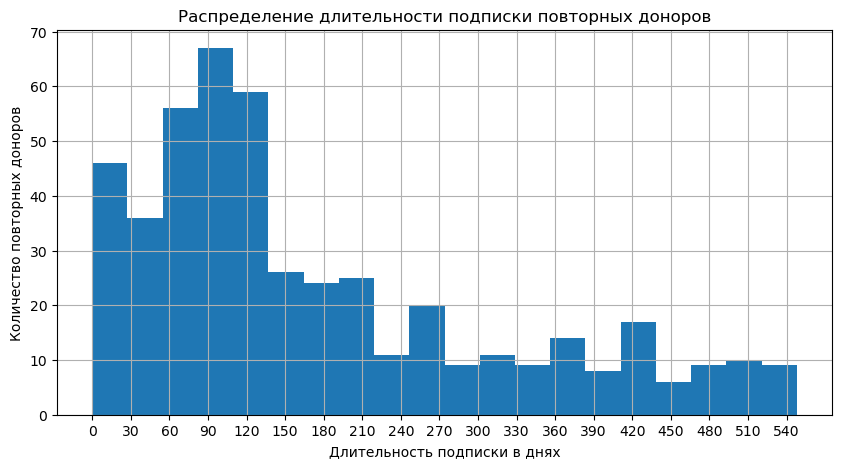

In [130]:
(all.query('is_multiple == 1')['last_payment'] - all.query('is_multiple == 1')['first_payment']).dt.days.hist(bins=20, figsize=(10,5))

plt.title('Распределение длительности подписки повторных доноров')
plt.xticks(np.arange(0, (all.query('is_multiple == 1')['last_payment'] - all.query('is_multiple == 1')['first_payment']).dt.days.max(), 30))
plt.xlabel('Длительность подписки в днях')
plt.ylabel('Количество повторных доноров')
plt.show()

Наиболее часто встречающаяся разница между датами первого и последнего платежа (aka срок подписки) находится в пределах от 2 до 4,5 месяцев. Возможно, введение каких-то форм обратной связи с донорами (или пересмотр имеющихся) могли бы увеличить срок удержания доноров.

## Связь пиков прироста новых доноров с публикациями в СМИ

Ранее мы определяли, в которые наблюдался значительный прирост количества новых доноров. Рассмотрим еще раз эти даты, но в этот раз учтем всех доноров (и тех, кто совершили удачный платеж, и тех, кто попытался, но не смог), а также добавим суммы, которые принесли разовые и повторные доноры.



In [131]:
# выбираем 10 дат с максимальным притоком новых доноров
top10donors = all.groupby('first_payment').agg(donors=('code','count')).reset_index().sort_values(by='donors', ascending=False).head(10)

# выбираем 10 дат, в которые впервые совершили платеж повторные доноры, которые принесли больше всего денег
top10regular = all.query('is_multiple == 1').groupby('first_payment').agg(regular_donations=('total_amount','sum')).reset_index().sort_values(by='regular_donations', ascending=False).head(10)

# выбираем 10 дат, в которые разовые пользователи принесли больше всего денег
top10onetime = all.query('is_multiple == 0').groupby('first_payment').agg(onetime_donations=('total_amount','sum')).reset_index().sort_values(by='onetime_donations', ascending=False).head(10)

In [132]:
# объединяем таблицы
t = top10donors.merge(top10regular, on='first_payment', how='outer')
top = t.merge(top10onetime, on='first_payment', how='outer')

In [133]:
top.sort_values(by='first_payment')

first_payment  donors  regular_donations  onetime_donations
19    2021-11-18     NaN                NaN            30000.0
15    2021-12-07     NaN            38000.0                NaN
0     2021-12-23    65.0            63450.0            33800.0
8     2021-12-24    14.0            36500.0                NaN
14    2021-12-25     NaN            39772.0                NaN
16    2022-01-11     NaN            27520.0                NaN
7     2022-03-06    15.0                NaN                NaN
12    2022-04-22     NaN            52900.0                NaN
10    2022-08-22     NaN           111850.0                NaN
20    2022-10-28     NaN                NaN            27470.0
5     2022-12-29    24.0                NaN                NaN
2     2022-12-30    32.0                NaN                NaN
13    2023-02-21     NaN            46500.0                NaN
1     2023-02-26    35.0            91100.0            59174.0
6     2023-03-02    20.0                NaN            23510.0
21    2023-03-03     NaN                NaN            26000.0
22    2023-03-19     NaN                NaN            20800.0
11    2023-03-21     NaN            86700.0            72700.0
3     2023-03-28    28.0                NaN                NaN
4     2023-03-29    27.0                NaN                NaN
17    2023-03-30     NaN                NaN            55300.0
9     2023-04-04    14.0                NaN                NaN
18    2023-04-11     NaN                NaN            52000.0

Таким образом, мы получили отсортированную по дате таблицу, в которую попали самые прибыльные по трем показателям даты. Отметим, что 23.12.2021 и 26.02.2023 входят в топ-10 по всем трем показателям.

На сайте Больнички есть раздел "СМИ о нас". Изучим даты публикаций, попадающих в рассматриваемый временной период:

- 18.11.2021 - [Фонтанка.ру](https://www.fontanka.ru/2021/11/18/70245389/)
- 29.12.2021 - [Милосердие.ru](https://www.miloserdie.ru/article/ambulatorno-my-lechim-luchshe-chem-v-srednej-bolnicze-kak-ustroena-ulichnaya-mediczina/)
- 30.03.2022 - [спид.центр](https://spid.center/ru/articles/4080)
- 16.05.2022 - [Forbes](https://www.forbes.ru/forbes-woman/465473-pocemu-zensiny-stanovatsa-bezdomnymi-i-kak-oni-zivut-na-ulicah-v-rossii)
- 02.08.2022 - [sobaka.ru](https://www.sobaka.ru/krsk/health/health/153972)
- 28.02.2022 - [ИТМО](https://news.itmo.ru/ru/university_live/social_activity/news/12865/)


Помимо указанных, можем отметить следующие найденные публикации:
- 12.04.2022 - [Конференция Ночлежки - прошла 08.04.2022](https://www.youtube.com/watch?v=yv70IJSIwqk)
- 25.02.2023 - [Фонтанка.ру](https://www.fontanka.ru/2023/02/25/72088550/)
- 26.02.2023 - [Медуза](https://meduza.io/feature/2023/02/26/bezdomnyh-i-migrantov-i-ne-tolko-ih-chasto-ne-lechat-v-obychnyh-bolnitsah-v-peterburge-volontery-sobirayut-3-milliona-rubley-na-kliniku-spetsialno-dlya-takih-lyudey)
- 29.03.2023 [Север.Реалии](https://www.severreal.org/a/u-bezdomnyh-v-peterburge-budet-svoya-klinika/32319413.html)
- 30.03.2023 - [Вечерний Санкт-Петербург](https://vecherka-spb.ru/2023/03/30/prodlit-ulichnuyu-zhizn-kak-v-peterburge-blagotvoritelnaya-bolnitsa-pomogaet-bezdomnim-)

Даты некоторых из указанных публикаций совпадают с датами из таблицы:
- 18.11.2021
  - [Фонтанка.ру](https://www.fontanka.ru/2021/11/18/70245389/)
  - пожертвования на 30000 рублей от разовых доноров
- 11.04.2022
  - [Конференция Ночлежки - прошла 08.04.2022, видео выложено 12.04.2022](https://www.youtube.com/watch?v=yv70IJSIwqk)
  - пожертвования на 52000 рублей от разовых доноров
- 25-26.02.2023
  - [Фонтанка.ру - 25.02.2023](https://www.fontanka.ru/2023/02/25/72088550/)
  - [Медуза - 26.02.2023](https://meduza.io/feature/2023/02/26/bezdomnyh-i-migrantov-i-ne-tolko-ih-chasto-ne-lechat-v-obychnyh-bolnitsah-v-peterburge-volontery-sobirayut-3-milliona-rubley-na-kliniku-spetsialno-dlya-takih-lyudey)
  - 35 новых доноров
  - пожертвования на 59174 рублей от разовых доноров
  - привлеченные в этот день постоянные доноры в совокупности принесли 91100 рублей
- 29.03.2023
  - [Север.Реалии](https://www.severreal.org/a/u-bezdomnyh-v-peterburge-budet-svoya-klinika/32319413.html)
  - 27 новых доноров
- 30.03.2023
  - [Вечерний Санкт-Петербург](https://vecherka-spb.ru/2023/03/30/prodlit-ulichnuyu-zhizn-kak-v-peterburge-blagotvoritelnaya-bolnitsa-pomogaet-bezdomnim-)
  - пожертвования на 55300 рублей от разовых доноров

  Не беремся утверждать, что именно данные публикации стали причиной притока доноров и пожертвований, но не можем не отметить совпадения, а также сделать очевидный вывод, не требующий расчетов: публикации в СМИ, упоминания у крупных блогеров или в крупных ТГ-каналах, участие в оффлайновых мероприятиях и иные способы взаимодействия с общественностью повышают узнаваемость орагнизации и помогают привлекать больше доноров.

## Выводы по итогам изучения объединенной таблицы

1. После проведенной предобработки (удаление явных и неявных дубликатов, добавление столбцов) объединенная по двум источникам таблица содержит данные о 1469 уникальных донорах:
- код донора
- дата первого платежа
  - дата целиком
  - месяц первого платежа
  - год первого платежа
- дата последнего платежа
  - дата целиком
  - месяц последнего платежа
  - год последнего платежа
- общая сумма пожертвований
- метка "разовый/постоянный"

2. Из 1469 доноров 210 доноров не сумели завершить платеж (общая сумма платежей 0). Оставшиеся 1259 доноров в совокупности за весь рассматриваемый период (17.11.2021-24.06.2023) совершили платежи на сумму 2.751.277,00 рублей.

3. Постоянных доноров в таблице меньше, чем разовых (62,5% разовых и 37,5% постоянных), но общая сумма, которую принесли постоянные доноры, превышает общую сумму пожертвований от разовых доноров (40% от разовых и 60% от постоянных).

4. Максимальный разовый платеж составил 55000 рублей, а максимальная сумма, которую принес один постоянный донор, составляет 98000 рублей.

Наиболее часто встречающийся срок подписки постоянных доноров (рассчитанный как разница между датами первого и последнего платежей) находится в пределах от 2 до 4,5 месяцев.

5. Выделены даты, в которые пришло много новых доноров:
- 23.12.2021
- 26.02.2023
- 31.12.2022
- 28.03.2023
- 29.03.2023

6. Выделены даты, в которые пришли новые доноры, которые в совокупности принесли больше всего денег:
- 21.03.2023
- 26.02.2023
- 22.08.2022
- 23.12.2021
- 30.03.2023

7. Установлено, что некоторые даты, в которые пришло много новых доноров и поступило больше всего средств, совпадают с датами упоминаний НКО в различных СМИ.

В последней части работы проанализируем таблицу с данными о рекламных кампаниях и попробуем установить связь с уже изученными данными.



## Таблица `adgrants`.

### Изучение содержания таблицы

In [134]:
# загрузка первых строк таблицы
adgrants.head(10)

Дата               Кампания  № Кампании      Метка  \
0  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
1  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
2  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
3  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
4  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
5  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
6  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
7  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
8  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   
9  15.01.2023  Команда#2 / Бот / СПб    82164908  без метки   

        Условие показа           Пол Уровень платежеспособности       Возраст  \
0  благотворительность  не определен                  Остальные  не определен   
1  благотворительность  не определен                  Остальные     младше 18   
2  благотворительность  не определен                  Остальные         18-24   
3  благотворительность  не определен                  Остальные         25-34   
4  благотворительность  не определен                  Остальные         35-44   
5  благотворительность  не определен                  Остальные     старше 55   
6  благотворительность  не определен                       2-5%     старше 55   
7  благотворительность       мужской                  Остальные  не определен   
8  благотворительность       мужской                  Остальные     младше 18   
9  благотворительность       мужской                  Остальные         18-24   

   Показы Взвешенные показы  Клики CTR (%) wCTR (%) Расход (руб.)  \
0       7              7,00      0    0,00     0,00          0,00   
1       4              4,00      0    0,00     0,00          0,00   
2       2              2,00      0    0,00     0,00          0,00   
3       1              1,00      0    0,00     0,00          0,00   
4       1              1,00      0    0,00     0,00          0,00   
5       2              2,00      0    0,00     0,00          0,00   
6       1              1,00      0    0,00     0,00          0,00   
7       5              5,00      0    0,00     0,00          0,00   
8      58             58,00      1    1,72     1,72          6,18   
9      85             85,00      0    0,00     0,00          0,00   

  Ср. цена клика (руб.) Ср. ставка за клик (руб.) Ср. позиция показов  \
0                     -                         -                   -   
1                     -                         -                   -   
2                     -                         -                   -   
3                     -                         -                   -   
4                     -                         -                   -   
5                     -                         -                   -   
6                     -                         -                   -   
7                     -                         -                   -   
8                  6,18                     77,34                   -   
9                     -                         -                   -   

  Ср. объём трафика Ср. позиция кликов Отказы (%)  \
0            100,00                  -          -   
1            100,00                  -          -   
2            100,00                  -          -   
3            100,00                  -          -   
4            100,00                  -          -   
5            100,00                  -          -   
6            100,00                  -          -   
7            100,00                  -          -   
8            100,00                  -          -   
9            100,00                  -          -   

  Ср. цена тыс. показов (руб.) Глубина (стр.) Конверсия (%) Цена цели (руб.)  \
0                         0,00              -             -                -   
1                         0,00              -             -                -   
2                         0,00     

In [135]:
adgrants[(adgrants['Прибыль (руб.)'] != '0,00') & (adgrants['Конверсии'] != '-')]

Дата  \
45749   14.03.2023   
140520  26.03.2023   
150189  07.04.2023   
150490  08.04.2023   
150516  08.04.2023   
...            ...   
301794  17.07.2023   
304779  18.07.2023   
304949  18.07.2023   
306654  18.07.2023   
306979  19.07.2023   

                                                            Кампания  \
45749                                                            Гео   
140520  Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы   
150189          Пакет_Бездомашний очаг_Реабилитационные центры_ключи   
150490  Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы   
150516  Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы   
...                                                              ...   
301794                                                РК_Ретаргетинг   
304779                                                РК_Ретаргетинг   
304949                                       РК_Обустройство_клиники   
306654                                         РК_Общий сбор_средств   
306979                                       РК_Обустройство_клиники   

        № Кампании      Метка                     Условие показа      Пол  \
45749     84199193  без метки    запись +к бесплатному врачу спб  мужской   
140520    84171252  без метки                  психиатрия помощь  женский   
150189    84641858  без метки   реабилитационный центр +в городе  женский   
150490    84171252  без метки  где найти хорошего психотерапевта  женский   
150516    84171252  без метки                  кабинет психолога  мужской   
...            ...        ...                                ...      ...   
301794    87637100  без метки                  Вернулись на сайт  женский   
304779    87637100  без метки                  Работа (аффинити)  женский   
304949    89727699  без метки      благотворительность -отдавать  мужской   
306654    89800500  без метки                  '---autotargeting  женский   
306979    89727699  без метки                           йога спб  женский   

       Уровень платежеспособности    Возраст  Показы Взвешенные показы  Клики  \
45749                   Остальные      25-34      47             47,00      1   
140520                  Остальные      45-54      73             73,00      1   
150189                  Остальные      25-34      19             19,00      1   
150490                  Остальные      45-54      48             48,00      1   
150516                  Остальные      45-54     126            126,00      1   
...                           ...        ...     ...               ...    ...   
301794                  Остальные      45-54      48             48,00      1   
304779                  Остальные  старше 55     259            259,00      4   
304949                  Остальные      25-34       5              5,00      1   
306654                  Остальные  старше 55    1664           1664,00     25   
306979                  Остальные  старше 55       2              2,00      1   

       CTR (%) wCTR (%) Расход (руб.) Ср. цена клика (руб.)  \
45749     2,13     2,13         38,05                 38,05   
140520    1,37     1,37         29,74                 29,74   
150189    5,26     5,26         35,01                 35,01   
150490    2,08     2,08         23,74                 23,74   
150516    0,79     0,79         26,13                 26,13   
...        ...      ...           ...                   ...   
301794    2,08     2,08         45,69                 45,69   
304779    1,54     1,54         83,11                 20,78   
304949   20,00    20,00        151,60                151,60   
306654    1,50     1,50        916,94                 36,68   
306979   50,00    50,00         98,54                 98,54   

       Ср. ставка за клик (руб.) Ср. позиция показов Ср. объём трафика  \
45749                      39,27                   -            100,00   
140520                     30,13                   -            100,00   
150189 

In [136]:
# просмотр информации о таблице
adgrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308023 entries, 0 to 308022
Data columns (total 46 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Дата                                       308023 non-null  object
 1   Кампания                                   308023 non-null  object
 2   № Кампании                                 308023 non-null  int64 
 3   Метка                                      308023 non-null  object
 4   Условие показа                             308023 non-null  object
 5   Пол                                        308023 non-null  object
 6   Уровень платежеспособности                 308023 non-null  object
 7   Возраст                                    308023 non-null  object
 8   Показы                                     308023 non-null  int64 
 9   Взвешенные показы                          308023 non-null  object
 10  Клики               

Таблица содержит 308023 строки и 46 колонок. В строках содержатся данные по целевой группе пользователей по рекламной кампании на определенную дату.

Проверим таблицу на наличие дубликатов.

In [137]:
adgrants.duplicated().sum()

25

Удалим явные дубликаты.

In [138]:
adgrants = adgrants.drop_duplicates()
print('Явные дубликаты удалены')

Явные дубликаты удалены


Пустых значений в таблице нет, но значение `'-'` во многих столбцах можно трактовать как отсутствующее значение (None). Визуализируем распределение таких значений.

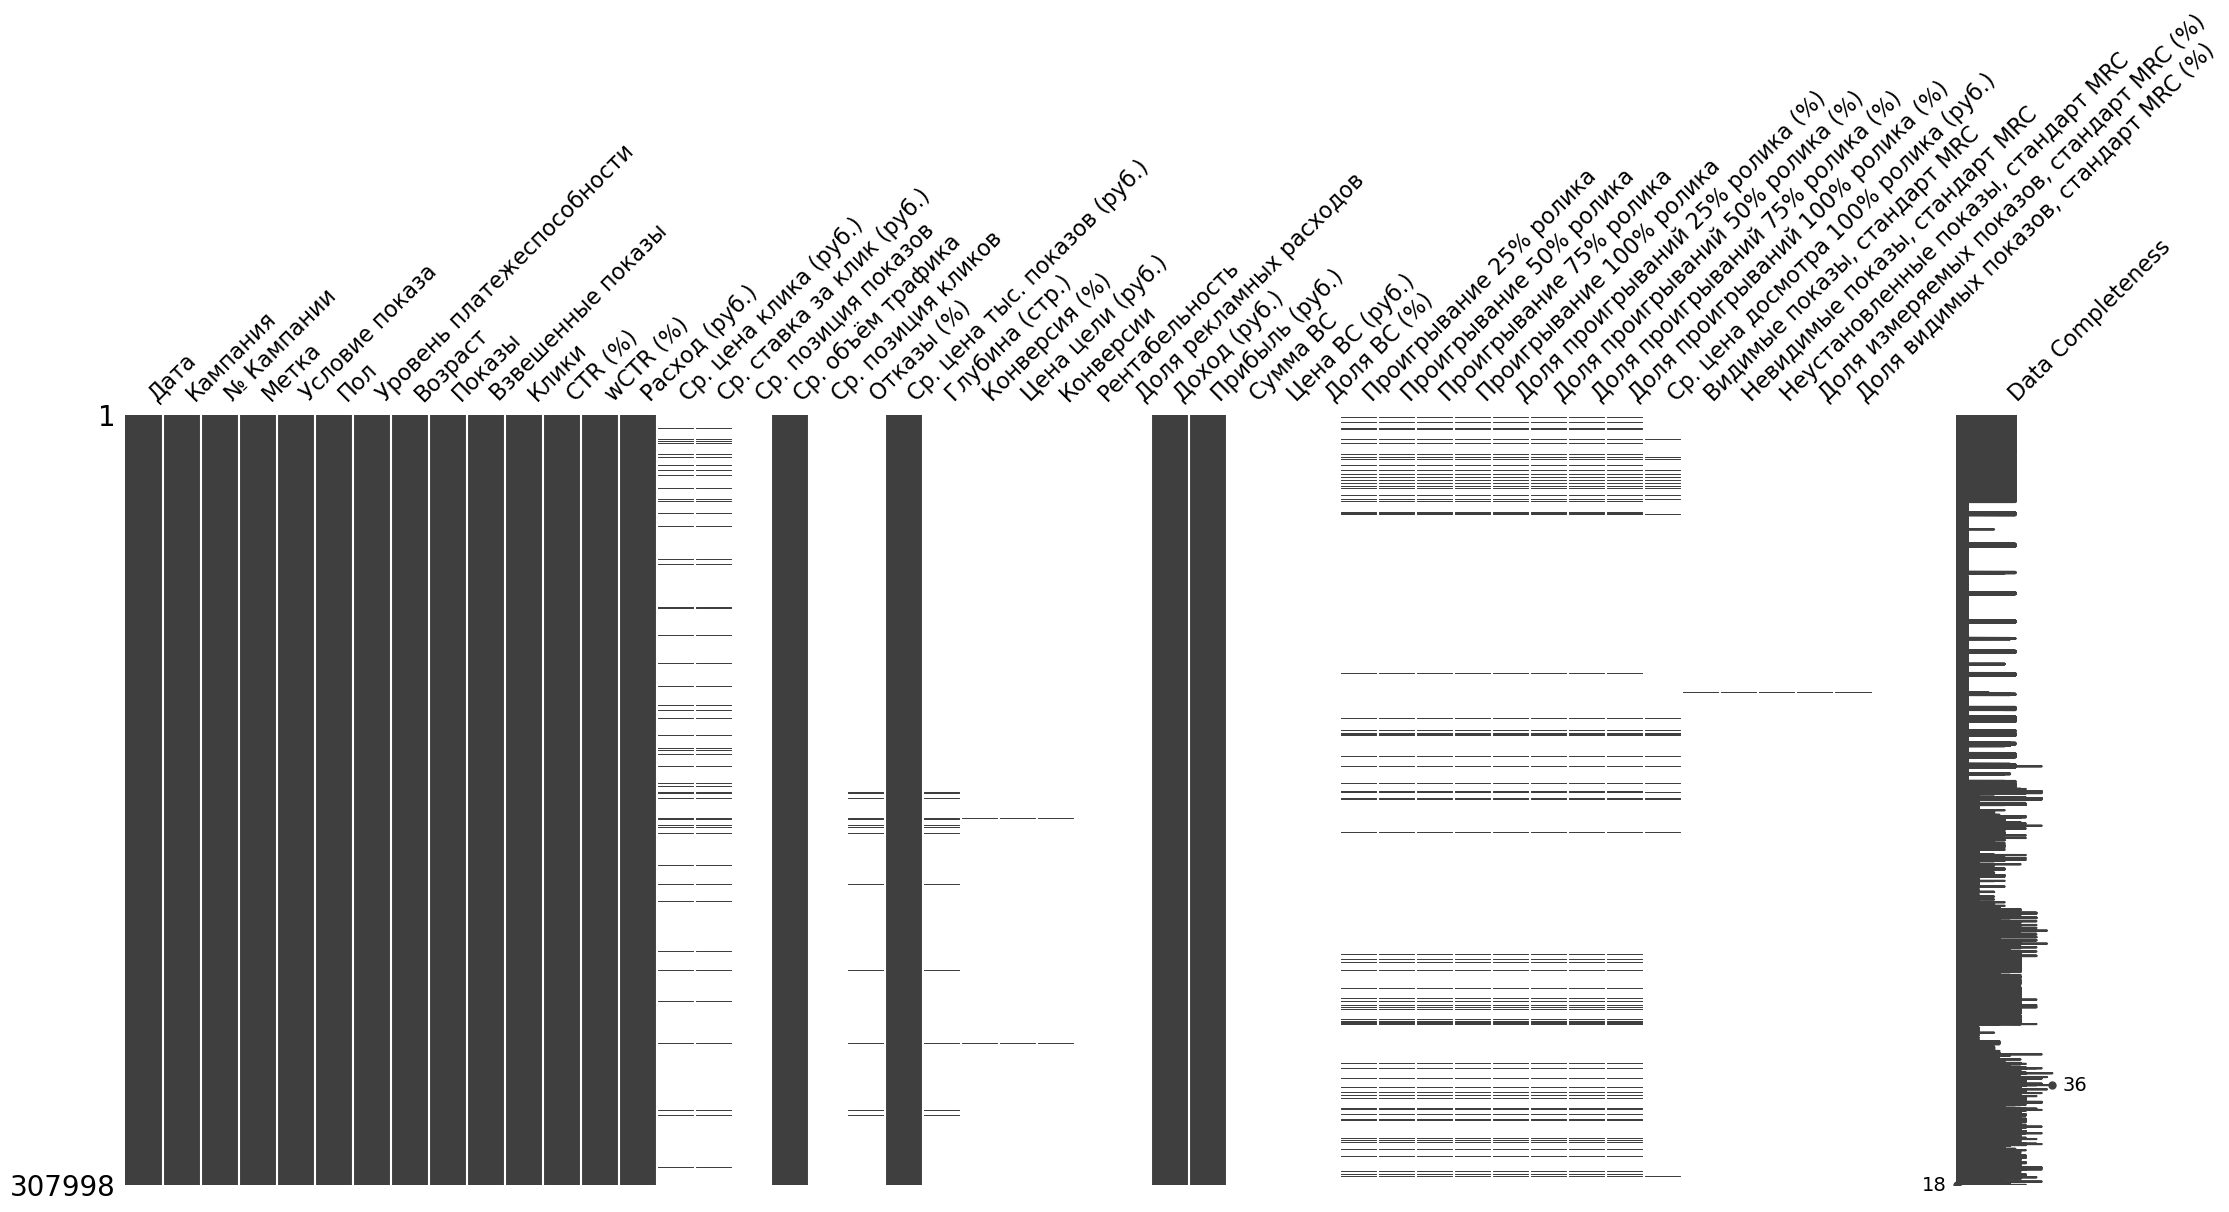

In [139]:
# визуализация распределения пропусков
msno.matrix(adgrants.replace('-', None), labels=True)
None

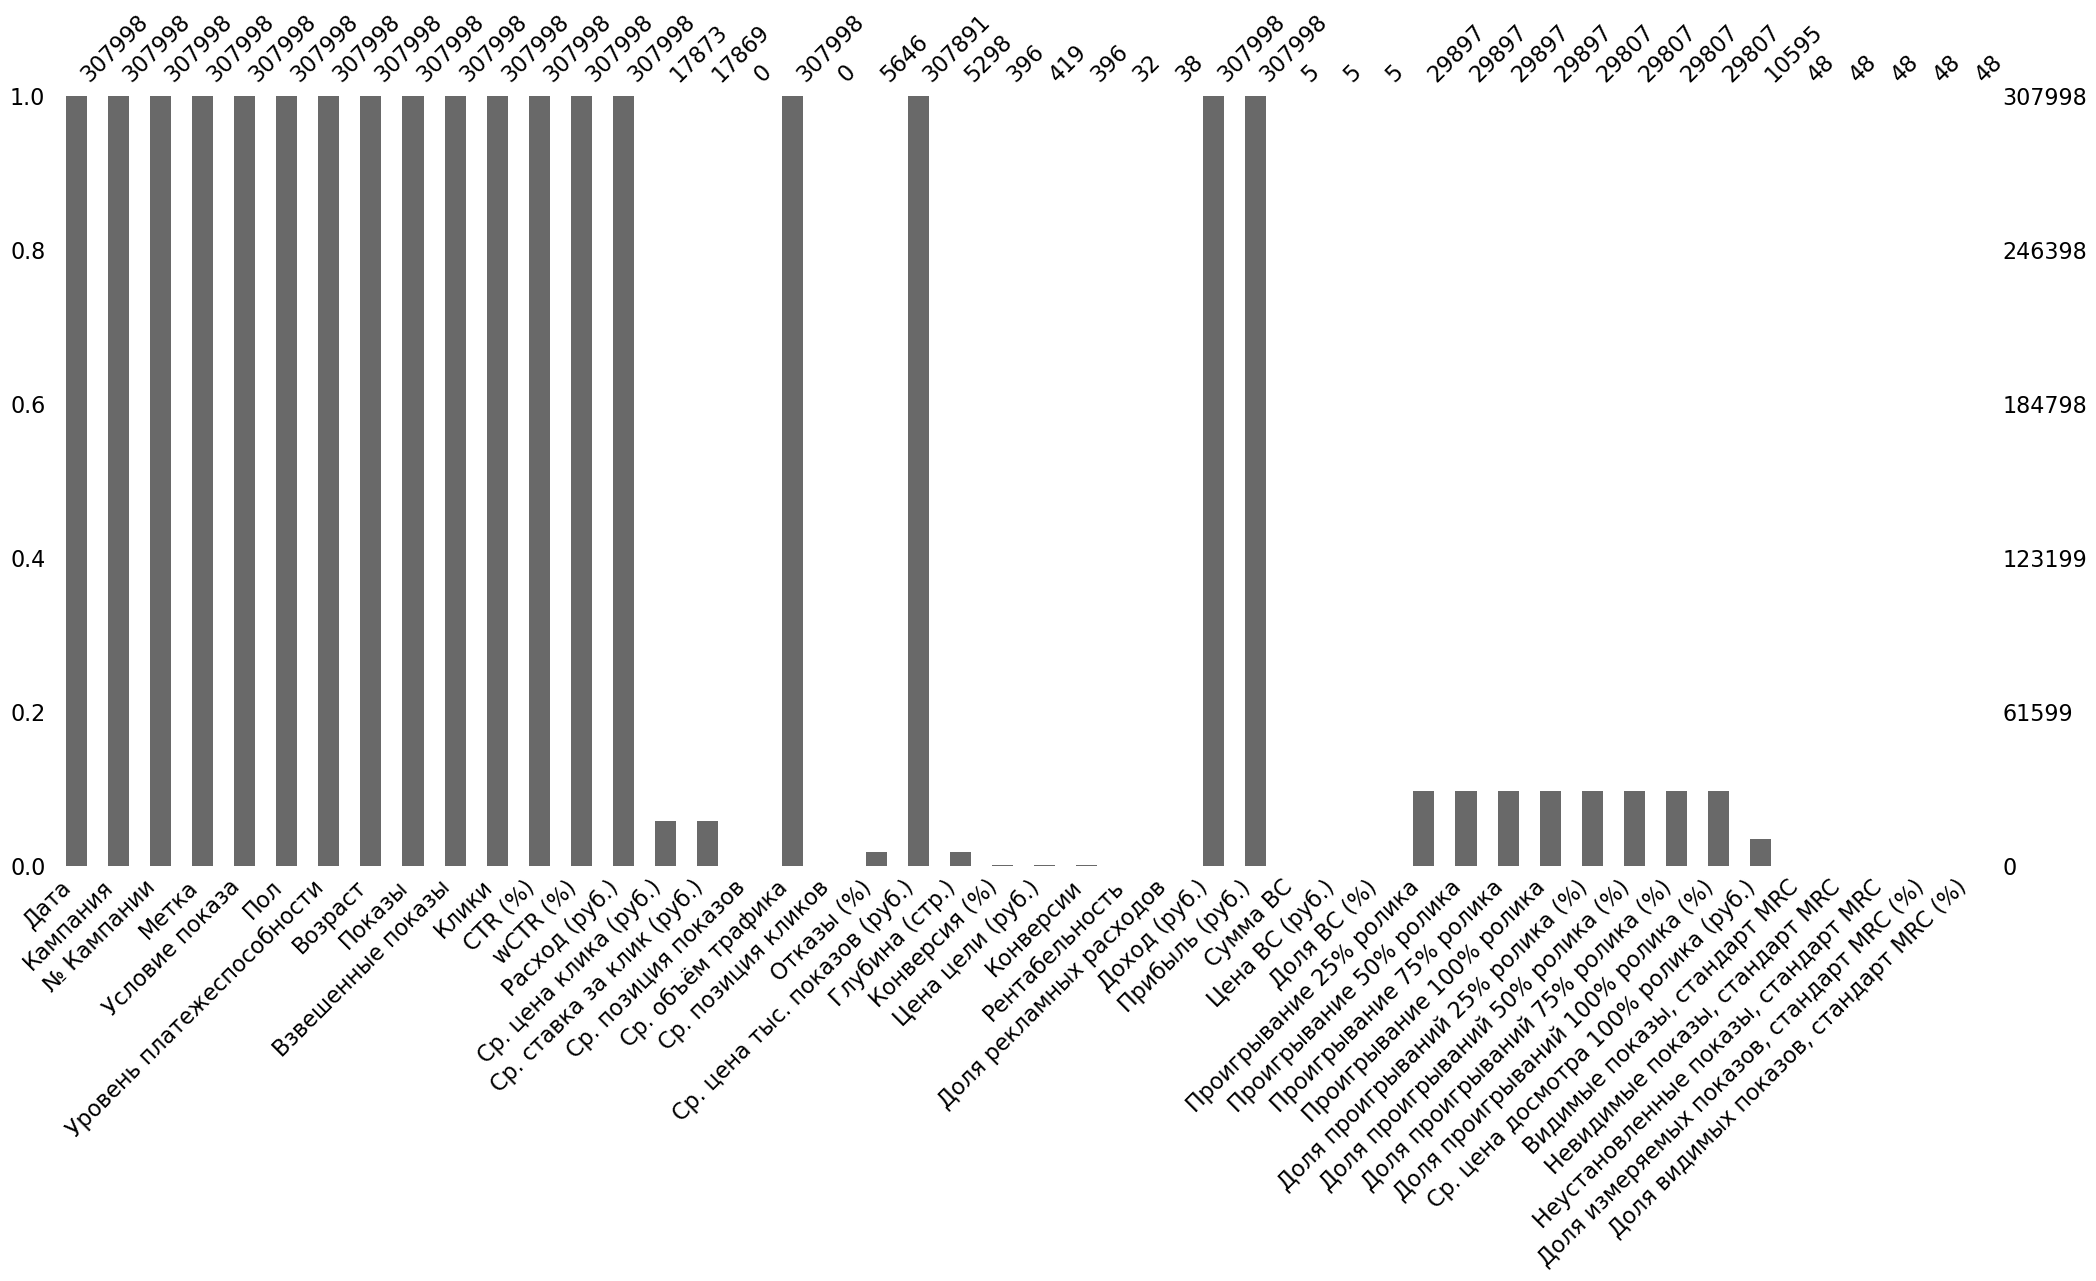

In [140]:
msno.bar(adgrants.replace('-', None))
None

После замены `'-'` на `None` стало очевидно, что во многих столбцах таблицы данных либо нет вовсе, либо их очень мало. Сразу удалим столбцы с 100% пропусков.

In [141]:
adgrants = adgrants.drop(columns=['Ср. позиция показов', 'Ср. позиция кликов'])

#### Выбор целей дальнейшего анализа, удаление ненужных столбцов

Изучив содержание столбцов с помощью [ЯндексСправки](https://yandex.ru/support/) мы приняли решение провести дальнейший анализ по следующим направлениям:
- изучить распределение рекламных кампаний по времени
- изучить воронку конверсий рекламных кампаний (показы -> клики -> конверсии)

Для этого нам понадобятся данные из следующих столбцов:

- Дата
- Кампания
- Показы
- Клики
- Конверсии
- Проигрывание 25% ролика - оставим этот столбец, но преобразуем его для дальнейшей работы


In [142]:
# оставляем только нужные для анализа столбцы

adgrants = adgrants[['Дата', 'Кампания', 'Показы', 'Клики', 'Конверсии', 'Проигрывание 25% ролика']]

In [143]:
adgrants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307998 entries, 0 to 308022
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Дата                     307998 non-null  object
 1   Кампания                 307998 non-null  object
 2   Показы                   307998 non-null  int64 
 3   Клики                    307998 non-null  int64 
 4   Конверсии                307998 non-null  object
 5   Проигрывание 25% ролика  307998 non-null  object
dtypes: int64(2), object(4)
memory usage: 16.4+ MB


Таблица подготовлена, можно приступать к предобработке содержащихся в ней данных.

### Предобработка таблицы adgrants

#### Переименование столбцов
Для удобства дальнейшей работы переименуем столбцы.

In [144]:
columns = {'Дата':'date',
           'Кампания': 'campaign',
           'Показы': 'views',
           'Клики': 'clicks',
           'Конверсии': 'conversions',
           'Проигрывание 25% ролика': 'is_video'}

adgrants = adgrants.rename(columns=columns)
print('Столбцы переименованы')

Столбцы переименованы


#### Преобразование типов данных

У большинства столбцов тип данных - `object`. Это могут быть как строки, так и данные смешанных типов. Составим функцию, которая поможет нам определить, данные каких типов присутствуют в столбце, а значит - поможет выбрать оптимальные методы преобразования типов данных.

In [145]:
def types(column):
    types = []
    for i in adgrants[column]:
        types.append(type(i))
    return set(types)

In [146]:
for i in adgrants.columns:
    print(i)
    print(types(i), '\n')

date
{<class 'str'>} 

campaign
{<class 'str'>} 

views
{<class 'int'>} 

clicks
{<class 'int'>} 

conversions
{<class 'str'>} 

is_video
{<class 'str'>} 



В столбцах `Показы` и `Клики` содержатся целочисленные данные, в остальных столбцах - строковые. Учтем это при преобразовании типов.

In [147]:
# данные в столбце date приводим к типу datetime.date
adgrants['date'] = pd.to_datetime(adgrants['date'], dayfirst=True).dt.date

# прочерки в столбце conversions меняем на 0, приводим к численному типу
c = lambda x: 0 if x == '-' else pd.to_numeric(x).astype('int')
adgrants['conversions'] = adgrants['conversions'].apply(c)

# в столбце is_video прочерк меняем на 0, другие значения - на 1 (если какое-то численное значение было указано, значит, данные в этой строке описывают статистику о просмотре видео)
k = lambda x: 0 if x == '-' else 1
adgrants['is_video'] = adgrants['is_video'].apply(k)

print('Типы данных преобразованы')

Типы данных преобразованы


Изучим преобразованную таблицу.

In [148]:
adgrants.head(10)

date               campaign  views  clicks  conversions  is_video
0  2023-01-15  Команда#2 / Бот / СПб      7       0            0         0
1  2023-01-15  Команда#2 / Бот / СПб      4       0            0         0
2  2023-01-15  Команда#2 / Бот / СПб      2       0            0         0
3  2023-01-15  Команда#2 / Бот / СПб      1       0            0         0
4  2023-01-15  Команда#2 / Бот / СПб      1       0            0         0
5  2023-01-15  Команда#2 / Бот / СПб      2       0            0         0
6  2023-01-15  Команда#2 / Бот / СПб      1       0            0         0
7  2023-01-15  Команда#2 / Бот / СПб      5       0            0         0
8  2023-01-15  Команда#2 / Бот / СПб     58       1            0         1
9  2023-01-15  Команда#2 / Бот / СПб     85       0            0         1

In [149]:
adgrants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307998 entries, 0 to 308022
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         307998 non-null  object
 1   campaign     307998 non-null  object
 2   views        307998 non-null  int64 
 3   clicks       307998 non-null  int64 
 4   conversions  307998 non-null  int64 
 5   is_video     307998 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.4+ MB


То, что выглядит, как полные дубликаты (например, строки 3, 4, 6), полными дубликатами не является, так как каждая строка исходной таблицы содержала данные по целевой группе пользователей. Следовательно, просмотры в строках 3, 4 и 6 - это не один и тот же просмотр, а три просмотра, которые были сделаны разными группами пользователями. Удалять такие дубли не будем.

Таблица подготовлена к дальнейшему анализу.

### Анализ данных из таблицы adgrants

#### Распределение количества рекламных кампаний по времени

Определим временной период рассматриваемых данных, а также подсчитаем количество рекламных кампаний, проходивших в течение этого периода.

In [150]:
print(f"В таблице adgrants содержатся данные за период с {str(adgrants['date'].min())} по {str(adgrants['date'].max())}.")
print(f"За этот период было запущено уникальных рекламных кампаний: {adgrants['campaign'].nunique()}.")

В таблице adgrants содержатся данные за период с 2023-01-15 по 2023-07-19.
За этот период было запущено уникальных рекламных кампаний: 24.


Для изучения распределения количества рекламных кампаний по месяцам добавим в таблицу столбец с номером месяца.

In [151]:
adgrants['month'] = pd.to_datetime(adgrants['date']).dt.month

Посчитаем, сколько рекламных кампаний одновременно проводилось каждый месяц.

In [152]:
adgrants.groupby('month').agg({'campaign':'nunique'})

campaign
month          
1             1
2             1
3            15
4             7
5             7
6            10
7             5

Больше всего рекламных кампаний (15 одновременно) проводилось в марте 2023 года. Таким образом, резкий рост количества новых доноров, наблюдавшийся в марте 2023 года, может объясняться большим количеством проводимых в этот период рекламных кампаний.

Для каждой кампании посчитаем срок ее проведения.

In [153]:
campaign_life = adgrants.groupby('campaign').agg(start=('date', 'min'), end=('date','max')).reset_index()
campaign_life['lifetime'] = (campaign_life['end'] - campaign_life['start']).dt.days + 1
campaign_life.sort_values(by='lifetime', ascending=False)

campaign       start  \
10                Пакет_Бездомашний очаг_Верующие_ключи-интересы  2023-03-14   
12          Пакет_Бездомашний очаг_Реабилитационные центры_ключи  2023-03-14   
11  Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы  2023-03-14   
19                                                РК_Ретаргетинг  2023-05-16   
4                                Больничка_бизнес_ключи-интересы  2023-04-18   
14                                                  РК_Больничка  2023-04-25   
20                                          РК_бездомные женщины  2023-04-26   
8                                          Команда#2 / Бот / СПб  2023-01-15   
18                                         РК_Общий сбор_средств  2023-06-19   
16                                       РК_Обустройство_клиники  2023-06-20   
6                                                            Гео  2023-03-14   
15                                          РК_Мобильная клиника  2023-06-20   
22                              Ремонт больнички - Автотаргетинг  2023-03-14   
5                      Верущие Автотаргетинг (Бездомные женщины)  2023-03-14   
13                                         Питер - Автотаргетинг  2023-03-14   
2                                   Бизнесмены/ ремонт больнички  2023-03-17   
23             Сбор на больницу_ Родственники_ №16 от 15-03-2023  2023-03-17   
9                             Культурно образованные (Больничка)  2023-03-17   
17                           РК_Обустройство_клиники_путешествия  2023-07-05   
1                                     helpingwomen/feminism_keys  2023-03-14   
0                              clinica/activists_volunteers/keys  2023-03-17   
3                      Благотворители/ помощь бездомным женщинам  2023-03-15   
21                  Реабилитационные центры_РСЯ_№5 от 05-03-2023  2023-03-14   
7                 Кампания с фиксированным СРМ №10 от 14-03-2023  2023-03-20   

           end  lifetime  
10  2023-06-20        99  
12  2023-06-19        98  
11  2023-06-05        84  
19  2023-07-19        65  
4   2023-06-20        64  
14  2023-06-20        57  
20  2023-06-03        39  
8   2023-02-21        38  
18  2023-07-19        31  
16  2023-07-19        30  
6   2023-04-12        30  
15  2023-07-19        30  
22  2023-03-28        15  
5   2023-03-28        15  
13  2023-03-28        15  
2   2023-03-28        12  
23  2023-03-27        11  
9   2023-03-27        11  
17  2023-07-14        10  
1   2023-03-23        10  
0   2023-03-26        10  
3   2023-03-23         9  
21  2023-03-21         8  
7   2023-03-20         1

Дольше всех (с марта по июнь) проводились рекламные кампании из пакета "Бездомашний очаг". Самая короткая рекламная кампания (Кампания с фиксированным СРМ №10 от 14-03-2023) закончилась в тот же день, когда и началась.

#### Воронка конверсий рекламных кампаний

Воронка конверсий рекламной кампании выглядит следующим образом: показы рекламного объявления -> клики по объявлению -> совершение целевого действия (целевое действие настраивается заказчиком). В таблице у нас есть столбцы с показами и кликами, а также столбец `Конверсия` (`conversions`), в котором как раз фиксируется количество целевых действий. Что именно это за действия, мы точно не знаем, но предполагаем, что какая-то часть из них - это успешная оплата пожертвования.

Данных в этом столбце немного - очевидно, что далеко не все показы объявлений заканчиваются целевыми действиями (тем более в деле благотворительности). На количество кликов и конверсий может влиять множество факторов: формат объявления (видео, текст, изображение), его внешний вид, его положение на странице, время года, особенности пользователя (возраст, пол, уровень платежеспособности и т.д.) и множество других. Для нашего проекта мы выбрали следующие направления работы:
1. Составим воронки конверсий для каждой рекламной кампании и выберем самые успешные.
2. Проанализируем воронки конверсий рекламных кампаний, начавшихся не позднее последних двух месяцев.
3. Проанализируем воронки конверсий для объявлений с видеороликами и сравним ее с воронкой конверсий для объявлений без видеороликов, публиковавшихся в рамках тех же рекламных кампаний.

##### Воронки конверсий по кампаниям

Сгруппируем таблицу по кампаниям и для каждой посчитаем сумму показов, кликов и конверсий.

In [154]:
all_campaigns = adgrants.groupby('campaign').agg({'views':'sum', 'clicks':'sum','conversions':'sum'}).reset_index()
all_campaigns.sort_values(by='conversions', ascending=False)

campaign    views  \
18                                         РК_Общий сбор_средств   164242   
20                                          РК_бездомные женщины   267718   
14                                                  РК_Больничка   867789   
15                                          РК_Мобильная клиника   259332   
16                                       РК_Обустройство_клиники   149637   
19                                                РК_Ретаргетинг   418710   
4                                Больничка_бизнес_ключи-интересы   623644   
10                Пакет_Бездомашний очаг_Верующие_ключи-интересы   909860   
12          Пакет_Бездомашний очаг_Реабилитационные центры_ключи   505274   
11  Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы   458401   
6                                                            Гео   339894   
17                           РК_Обустройство_клиники_путешествия    33246   
22                              Ремонт больнички - Автотаргетинг   155190   
21                  Реабилитационные центры_РСЯ_№5 от 05-03-2023   134397   
0                              clinica/activists_volunteers/keys    85559   
13                                         Питер - Автотаргетинг   180991   
1                                     helpingwomen/feminism_keys    99566   
9                             Культурно образованные (Больничка)    89041   
8                                          Команда#2 / Бот / СПб  3497029   
7                 Кампания с фиксированным СРМ №10 от 14-03-2023     7348   
5                      Верущие Автотаргетинг (Бездомные женщины)   281337   
3                      Благотворители/ помощь бездомным женщинам   127204   
2                                   Бизнесмены/ ремонт больнички   108824   
23             Сбор на больницу_ Родственники_ №16 от 15-03-2023    89305   

    clicks  conversions  
18    1107           88  
20    1354           63  
14    1557           56  
15    1041           48  
16     771           45  
19    1014           40  
4     1524           38  
10    2315           29  
12    1867           26  
11    1481           20  
6     2742           12  
17     143            1  
22     928            0  
21     397            0  
0      422            0  
13    1072            0  
1      452            0  
9      398            0  
8    17963            0  
7        4            0  
5     1149            0  
3      348            0  
2      692            0  
23     502            0

У половины рекламных кампаний сумма конверсий равна 0. Отберем для дальнейшего анализа только кампании с конверсиями.

In [155]:
good_campaigns = all_campaigns.query('conversions > 0')
good_campaigns.sort_values(by='conversions', ascending=False)

campaign   views  \
18                                         РК_Общий сбор_средств  164242   
20                                          РК_бездомные женщины  267718   
14                                                  РК_Больничка  867789   
15                                          РК_Мобильная клиника  259332   
16                                       РК_Обустройство_клиники  149637   
19                                                РК_Ретаргетинг  418710   
4                                Больничка_бизнес_ключи-интересы  623644   
10                Пакет_Бездомашний очаг_Верующие_ключи-интересы  909860   
12          Пакет_Бездомашний очаг_Реабилитационные центры_ключи  505274   
11  Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы  458401   
6                                                            Гео  339894   
17                           РК_Обустройство_клиники_путешествия   33246   

    clicks  conversions  
18    1107           88  
20    1354           63  
14    1557           56  
15    1041           48  
16     771           45  
19    1014           40  
4     1524           38  
10    2315           29  
12    1867           26  
11    1481           20  
6     2742           12  
17     143            1

В абсолютных цифрах больше всего целевых действий (88) было совершено в рамках рекламной кампании *РК_Общий сбор_средств*. Но для оценки эффективности рекламной кампании таких данных недостаточно. Посчитаем отношение кликов к просмотрам, конверсий к кликам, а также конверсий к просмотрам для каждой рекламной кампании.

In [156]:
good_campaigns['clicks_per_view'] = good_campaigns['clicks'] / good_campaigns['views']
good_campaigns['conversions_per_click'] = good_campaigns['conversions'] / good_campaigns['clicks']
good_campaigns['conversions_per_view'] = good_campaigns['conversions'] / good_campaigns['views']

good_campaigns.sort_values(by='conversions_per_view', ascending=False)

campaign   views  \
18                                         РК_Общий сбор_средств  164242   
16                                       РК_Обустройство_клиники  149637   
20                                          РК_бездомные женщины  267718   
15                                          РК_Мобильная клиника  259332   
19                                                РК_Ретаргетинг  418710   
14                                                  РК_Больничка  867789   
4                                Больничка_бизнес_ключи-интересы  623644   
12          Пакет_Бездомашний очаг_Реабилитационные центры_ключи  505274   
11  Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы  458401   
6                                                            Гео  339894   
10                Пакет_Бездомашний очаг_Верующие_ключи-интересы  909860   
17                           РК_Обустройство_клиники_путешествия   33246   

    clicks  conversions  clicks_per_view  conversions_per_click  \
18    1107           88         0.006740               0.079494   
16     771           45         0.005152               0.058366   
20    1354           63         0.005058               0.046529   
15    1041           48         0.004014               0.046110   
19    1014           40         0.002422               0.039448   
14    1557           56         0.001794               0.035967   
4     1524           38         0.002444               0.024934   
12    1867           26         0.003695               0.013926   
11    1481           20         0.003231               0.013504   
6     2742           12         0.008067               0.004376   
10    2315           29         0.002544               0.012527   
17     143            1         0.004301               0.006993   

    conversions_per_view  
18              0.000536  
16              0.000301  
20              0.000235  
15              0.000185  
19              0.000096  
14              0.000065  
4               0.000061  
12              0.000051  
11              0.000044  
6               0.000035  
10              0.000032  
17              0.000030

In [157]:
fig = px.bar(good_campaigns.sort_values(by='conversions_per_view', ascending=False).head(), x='campaign', y='conversions_per_click', text = 'conversions_per_click', text_auto = '.2%', labels={'campaign': 'Рекламная кампания', 'conversions_per_click': 'Доля целевых действий'}, title='Топ-5 самых успешных рекламных кампаний по доле целевых действий')
fig.show()

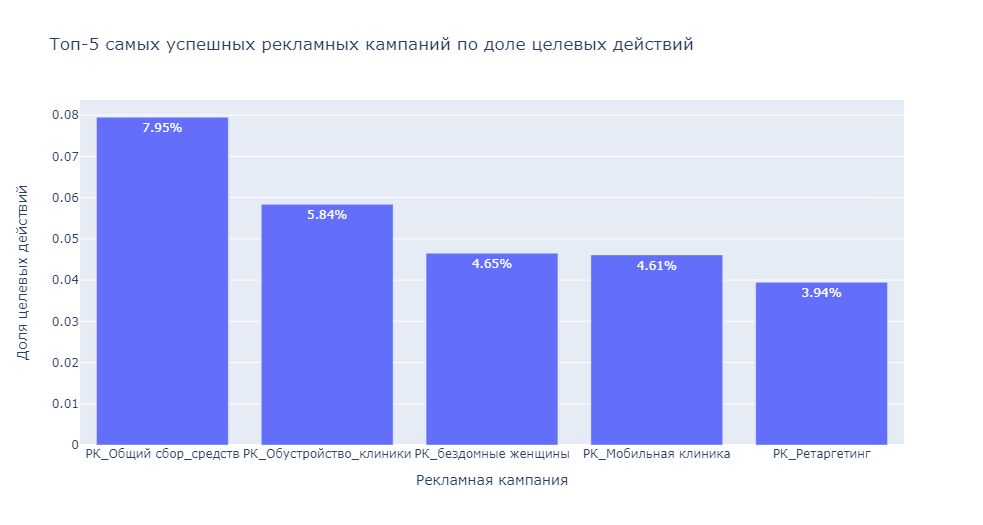

Наиболее высокие значения отношения количества конверсий к просмотрам объявлений (а также конверсий к кликам и кликам к просмотрам) наблюдаются у рекламной кампании *РК_Общий сбор_средств*. Безусловно, в рамках этой рекламной кампании конверсия могла варьироваться в зависимости от целевой группы пользователей или типа рекламного объявления, но в совокупности эта рекламная кампания является самой удачной.

Попробуем отобразить воронку конверсий для этой рекламной кампании графически.

In [158]:
fig = go.Figure(go.Funnel(
    y = ['views', 'clicks', 'conversions'],
    x = [164242, 1107, 88],
    textposition = "inside",
    textinfo = "value+percent initial")
    )

fig.show()

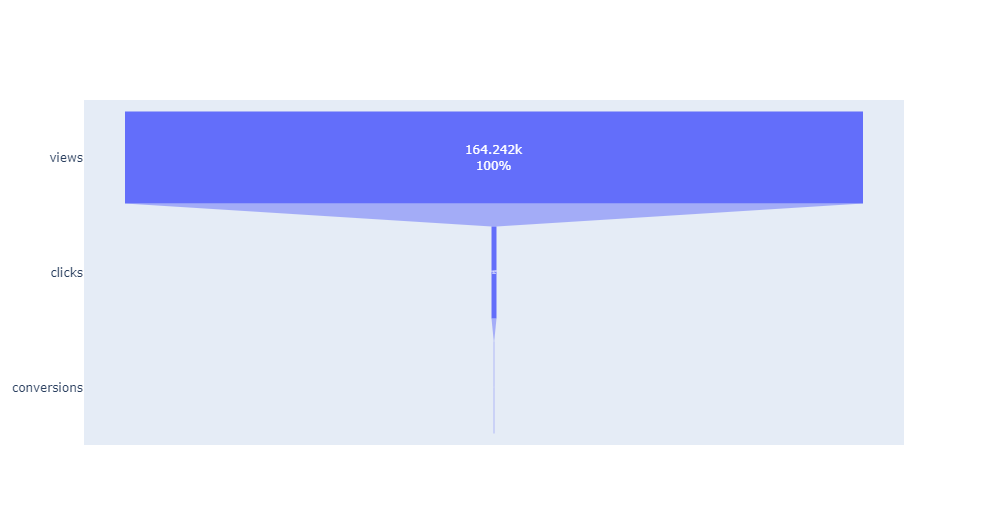

Воронка получается с очень широким горлом - очень малая часть пользователей, увидев объявление, кликает по нему.

Таким образом, проанализировав воронки событий для всех рекламных кампаний, мы можем выделить 5 наиболее успешных:
- *Общий сбор средств* (сроки проведения: 19.06.2023-19.07.2023)
- *Обустройство клиники* (20.06.2023-19.07.2023)
- *Бездомные женщины* (26.04.2023-03.06.2023)
- *Мобильная клиника* (20.06.2023-19.07.2023)
- *Ретаргетинг* (16.05.2023-19.07.2023)

##### Кампании, запущенные в последние два месяца

Выберем рекламные кампании, самый ранний месяц для которых - июнь 2023.

In [159]:
june = campaign_life[campaign_life['start'] > dt.date(2023, 6, 1)]
june

campaign       start         end  lifetime
15                 РК_Мобильная клиника  2023-06-20  2023-07-19        30
16              РК_Обустройство_клиники  2023-06-20  2023-07-19        30
17  РК_Обустройство_клиники_путешествия  2023-07-05  2023-07-14        10
18                РК_Общий сбор_средств  2023-06-19  2023-07-19        31

В июне-июле 2023 года было запущено 4 рекламных кампании. Три из них (*Общий сбор средств*, *Обустройство клиники*, *Мобильная клиника*) мы уже рассмотрели в предыдущем разделе. Эти три рекламных кампании были запущены практически в одно время.

Кампания *Обустройство_клиники _путешествия* самая короткая. Она действовала всего лишь 10 дней. Объявления в рамках этой кампании были просмотрены 33246 раз, целевое действие было зафиксировано всего одно. Предполагаем, что эта рекламная кампания в силу ее неэффективности могла быть завершена досрочно.

##### Кампании с видеороликами и без

В рамках одной и той же кампании могут быть запущены объявления разных видов: и баннеры, и видео. На примере пяти самых успешных рекламных кампаний проверим, насколько формат объявления может влиять на конверсию.

In [160]:
# выбираем наименования пяти наиболее успешных кампаний
top5 = good_campaigns.sort_values(by='conversions_per_view', ascending=False).head()['campaign'].unique()
top5

array(['РК_Общий сбор_средств', 'РК_Обустройство_клиники',
       'РК_бездомные женщины', 'РК_Мобильная клиника', 'РК_Ретаргетинг'],
      dtype=object)

In [161]:
# проверяем, во всех этих кампаниях были и видео, и объявления других типов
video = set(adgrants.query('is_video == 0 and campaign in @top5')['campaign'].unique()).intersection(set(adgrants.query('is_video == 1 and campaign in @top5')['campaign'].unique()))

video

{'РК_Мобильная клиника',
 'РК_Обустройство_клиники',
 'РК_Общий сбор_средств',
 'РК_Ретаргетинг',
 'РК_бездомные женщины'}

Во всех этих рекламных кампаниях использовали как видеоролики, так и объявления другого типа.

Отберем данные по выделенным рекламным кампаниям. Далее будем отдельно анализировать строки с роликами и строки без роликов. Посчитаем воронку конверсий и сравним.

In [162]:
# выбираем нужные рекламные кампании
vc = adgrants.query('campaign in @top5')
print(f"Данных и просмотрах видеороликов: {len(vc.query('is_video == 1'))}, или {round(100*len(vc.query('is_video == 1'))/len(vc), 2)}%")
print(f"Данных и просмотрах без видеороликов: {len(vc.query('is_video == 0'))}, или {round(100*len(vc.query('is_video == 0'))/len(vc), 2)}%")

Данных и просмотрах видеороликов: 13547, или 14.68%
Данных и просмотрах без видеороликов: 78731, или 85.32%


Данных о показах видеороликов в таблице гораздо меньше, чем о показах других видов объявлений.

In [163]:
# считаем показы, клики и конверсии для объявлений с роликами
video_agg = vc.query('is_video == 1').groupby('campaign').agg({'views':'sum', 'clicks':'sum','conversions':'sum'}).reset_index()

# считаем показы, клики и конверсии для объявлений без роликов
no_video_agg = vc.query('is_video == 0').groupby('campaign').agg({'views':'sum', 'clicks':'sum','conversions':'sum'}).reset_index()

# считаем соотношения
video_agg['clicks_per_view'] = video_agg['clicks'] / video_agg['views']
video_agg['conversions_per_click'] = video_agg['conversions'] / video_agg['clicks']
video_agg['conversions_per_view'] = video_agg['conversions'] / video_agg['views']

no_video_agg['clicks_per_view'] = no_video_agg['clicks'] / no_video_agg['views']
no_video_agg['conversions_per_click'] = no_video_agg['conversions'] / no_video_agg['clicks']
no_video_agg['conversions_per_view'] = no_video_agg['conversions'] / no_video_agg['views']

# объединяем таблицы
vc_agg = video_agg.merge(no_video_agg, on='campaign', suffixes=('_v', '_nv'))

Построим несколько графиков на основании полученной таблицы.

In [164]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=vc_agg.sort_values(by='campaign')['campaign'],
    y=vc_agg.sort_values(by='campaign')['conversions_per_view_v'],
    name='Конверсий на просмотр для видео',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=vc_agg.sort_values(by='campaign')['campaign'],
    y=vc_agg.sort_values(by='campaign')['conversions_per_view_nv'],
    name='Конверсий на просмотр без видео',
    marker_color='lightsalmon'
))

fig.update_layout(
    title="Отношение количества конверсий к количеству просмотров объявлений",
    xaxis_title="Рекламная кампания",
    yaxis_title="Доля конверсий от количества просмотров",
    barmode='group')
fig.show()

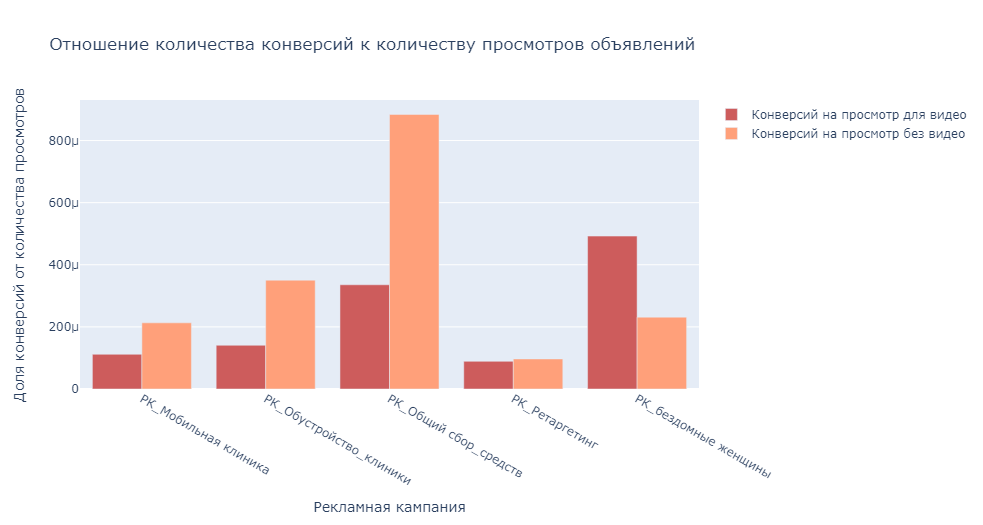

In [165]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=vc_agg.sort_values(by='campaign')['campaign'],
    y=vc_agg.sort_values(by='campaign')['conversions_per_click_v'],
    name='Конверсий на клик для видео',
    marker_color='mediumpurple'
))
fig.add_trace(go.Bar(
    x=vc_agg.sort_values(by='campaign')['campaign'],
    y=vc_agg.sort_values(by='campaign')['conversions_per_click_nv'],
    name='Конверсий на клик без видео',
    marker_color='plum'
))

fig.update_layout(
    title="Отношение количества конверсий к количеству кликов",
    xaxis_title="Рекламная кампания",
    yaxis_title="Доля конверсий от количества кликов",
    barmode='group')
fig.show()

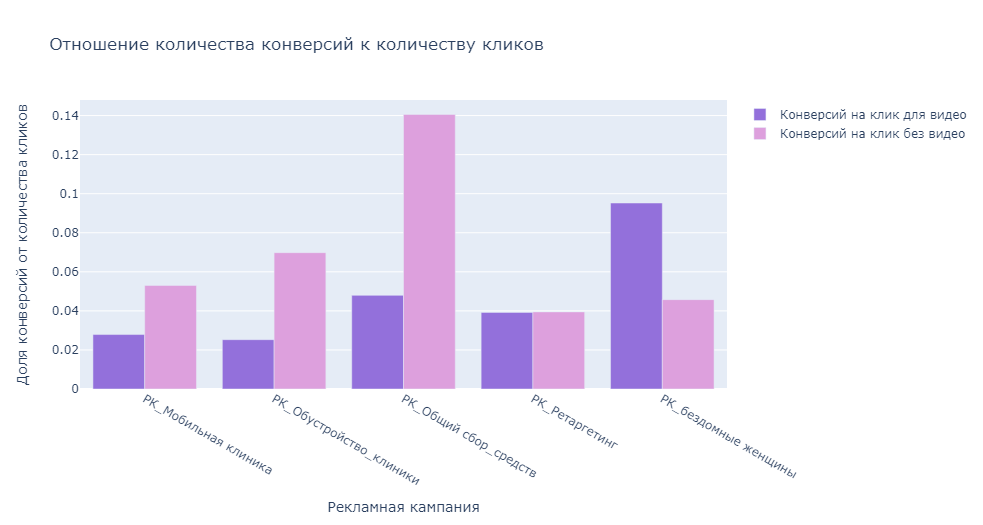

In [166]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=vc_agg.sort_values(by='campaign')['campaign'],
    y=vc_agg.sort_values(by='campaign')['clicks_per_view_v'],
    name='Кликов на просмотр для видео',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=vc_agg.sort_values(by='campaign')['campaign'],
    y=vc_agg.sort_values(by='campaign')['clicks_per_view_nv'],
    name='Кликов на просмотр без видео',
    marker_color='limegreen'
))

fig.update_layout(
    title="Отношение количества кликов к количеству просмотров объявлений",
    xaxis_title="Рекламная кампания",
    yaxis_title="Доля кликов от количества просмотров",
    barmode='group')
fig.show()

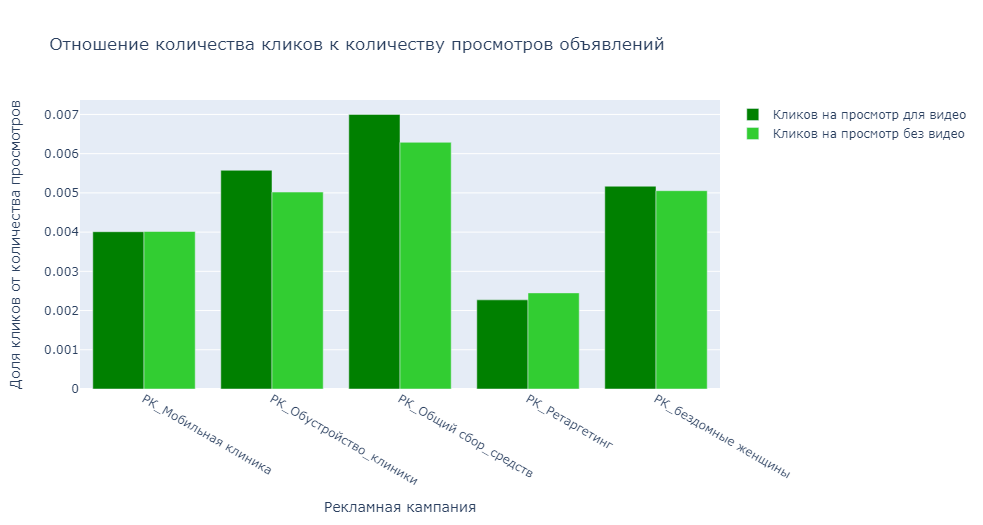

Из пяти самых успешных кампаний только в кампании *Бездомные женщины* отмечается превышение доли конверсий от просмотров и кликов в пользу объявлений с видеороликами. При этом в трех кампаниях из пяти доля кликов от просмотров объявлений с видео превышает долю кликов от просмотров объявлений без видео, а у оставшихся двух они достаточно близки. Можем сделать несколько предположений:
- для рекламной кампании *Бездомные женщины*  был снят очень качественный ролик
- продвижение объявлений с видео для рекламной кампании *Бездомные женщины* было очень хорошо таргетировано и попало в нужную целевую аудиторию
- на видеоролики пользователи кликают охотнее, чем на рекламные объявления других типов

### Поиск взаимосвязей между таблицами `all` и `adgrants`



In [167]:
# из таблицы all отбираем данные за 2023 год
all2023 = all.query('first_year == 2023')

# группируем таблицу all2023 по месяцам
# считаем количество впервые пришедших доноров и количество впервые пришедших повторных доноров
# группируем таблицу adgrants по месяцам
# считаем количество кампаний и сумму конверсий
# объединяем таблицы
final = all2023.groupby('first_month').agg({'code':'count','is_multiple':'sum'}).reset_index().rename(columns={'first_month':'month'}).merge(adgrants.groupby('month').agg({'campaign':'nunique','conversions':'sum'}).reset_index(), on='month')

In [168]:
# выводим графики

fig = go.Figure()
fig.add_trace(go.Bar(
    x=final['month'],
    y=final['code'],
    name='Количество впервые пришедших доноров',
    marker_color='#DDA0DD',
    text=final['code'],
    textposition='outside'
))
fig.add_trace(go.Bar(
    x=final['month'],
    y=final['is_multiple'],
    name='Количество впервые пришедших повторных доноров',
    marker_color='#DA70D6',
    text=final['is_multiple'],
    textposition='outside'
))
fig.add_trace(go.Bar(
    x=final['month'],
    y=final['campaign'],
    name='Количество проводимых рекламных кампаний',
    marker_color='#BA55D3',
    text=final['campaign'],
    textposition='outside'
))
fig.add_trace(go.Bar(
    x=final['month'],
    y=final['conversions'],
    name='Количество конверсий',
    marker_color='#663399',
    text=final['conversions'],
    textposition='outside'
))

fig.update_layout(
    title="Объединенные данные о донорах и рекламных кампаниях в разбивке по месяцам",
    xaxis_title="Месяц",
    yaxis_title="Количество",
    barmode='group',
    height=800)
fig.show()

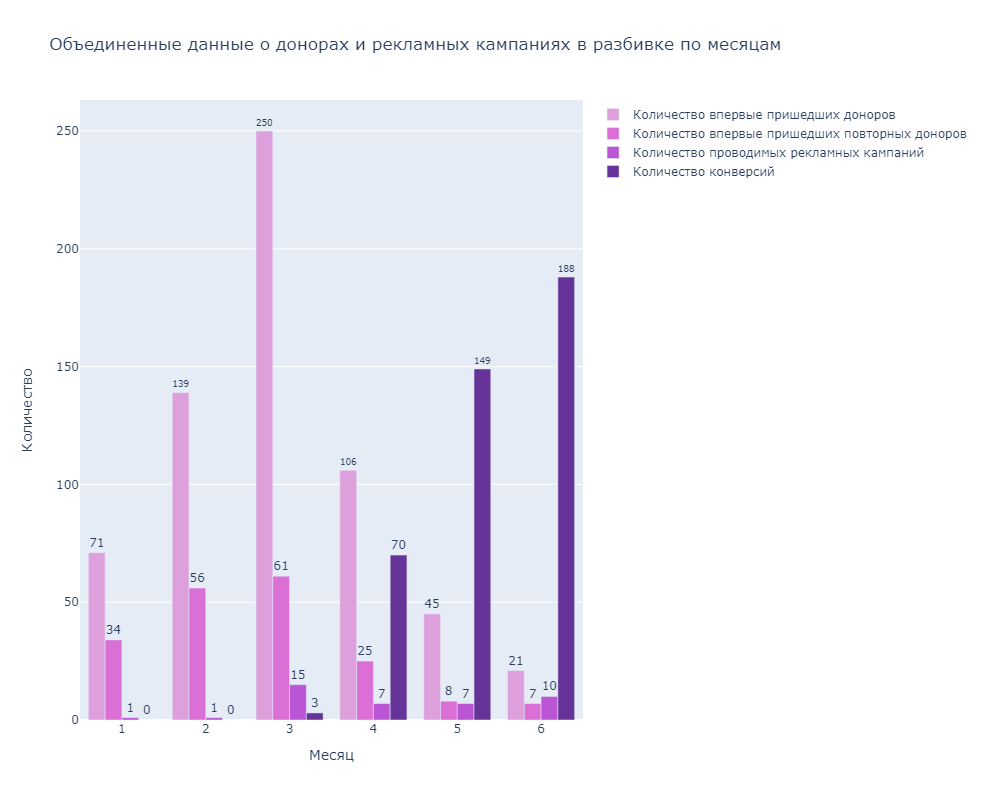

Можем сделать следующие наблюдения:
- в период с апреля по июнь 2023 года общее количество конверсий рекламных кампаний росло, а вот количество новых доноров постепенно снижалось (возможно, рекламные объявления попадались на глаза людям, которые уже раньше делали пожертвования, поэтому они заходили на сайт и делали платеж, повышая тем самым счетчик конверсии, но не фиксировались как новые доноры)
- в марте 2023 года одновременно проходило 15 рекламных кампаний; общее количество конверсий при этом равно всего 3, но новых доноров пришло 250 - возможно, на приток доноров повлияли в том числе какие-то внешние факторы (например, публикации в СМИ или оффлайновые мероприятия)
- если счетчик конверсии фиксирует не только платежи, но и какие-то другие действия (длительный просмотр сайта, добавление сайта в закладки и т.п.), вероятно, в последующие месяцы на фоне увеличения узнаваемости количество новых доноров и пожертвований увеличилось


# Общие итоги

**Результаты анализа данных о донорах:**

- за рассматриваемый период (17.11.2021-24.06.2023) было совершено платежей на сумму 2.751.277,00 рублей
- количество уникальных доноров в таблице: 1469
- количество доноров, сумевших совершить успешные платежи: 1259
- конверсия попыток первого платежа в успешный первый платеж: 86%
- самый непопулярный метод оплаты пожертвования - через sms
- на долю sms приходится 90,9% неудачных попыток оплаты пожертвования
- большая часть доноров (81%) - из России. Из них 31% - из Санкт-Петербурга и Ленинградской области
- соотношение разовых доноров и доноров, совершавших более 1 платежа: 62,5% и 37,5%
- на долю повторных доноров приходится 60% общей суммы поступивших платежей
- наиболее распространенный срок подписки постоянных доноров: от 2 до 4,5 месяцев
- больше всего новых доноров пришло в марте 2023 года (в этом же месяце было опубликовано несколько статей об НКО в крупных СМИ)
- в разбивке по дням максимальный прирост количества новых доноров зафиксирован 23.12.2021

**Результаты анализа данных о рекламных кампаниях:**

- всего за рассматриваемый период (15.01.2023-19.07.2023) проводилось 24 уникальных рекламных кампании
- в марте 2023 года одновременно проводилось 15 рекламных кампаний
- наиболее успешные кампании по величине конверсии просмотров объявлений в целевые действия:
  - *Общий сбор средств* (сроки проведения: 19.06.2023-19.07.2023)
  - *Обустройство клиники* (20.06.2023-19.07.2023)
  - *Бездомные женщины* (26.04.2023-03.06.2023)
  - *Мобильная клиника* (20.06.2023-19.07.2023)
  - *Ретаргетинг* (16.05.2023-19.07.2023)
- конверсия просмотров в клики выше у объявлений, содержащих видеоролики, но конверсия кликов и просмотров в целевые действия объявлений в ролики превышает такую конверсию других типов объявлений только у кампании *Бездомные женщины*
- в период с апреля по июнь 2023 года на фоне роста общего количества конверсий рекламных кампаний наблюдался постепенный спад количества новых доноров